<a href="https://colab.research.google.com/github/Faseela21/DRGrading/blob/main/E_DENSENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import asarray

import json
import cv2
from PIL import Image
from skimage.transform import resize
from tqdm import tqdm

from PIL import ImageFile,Image, ImageFilter ,ImageOps


#machine learning packages
from keras.applications import DenseNet121,DenseNet169
import tensorflow as tf
from keras import layers, Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score, accuracy_score

from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score, accuracy_score

from tensorflow.keras.models import load_model

import keras.backend as K
from keras.models import Model
from keras.layers import Input, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AvgPool2D, GlobalAvgPool2D, MaxPool2D
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Flatten
from keras.layers import ReLU
from keras.layers import Concatenate
from tensorflow.python.keras import regularizers

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D, Dense
from keras.layers import Average

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Aptos 2019/train_1.csv")
test_df = pd.read_csv('/content/drive/MyDrive/Aptos 2019/test.csv')
print(train_df.shape)
print(test_df.shape)

(2930, 2)
(366, 2)


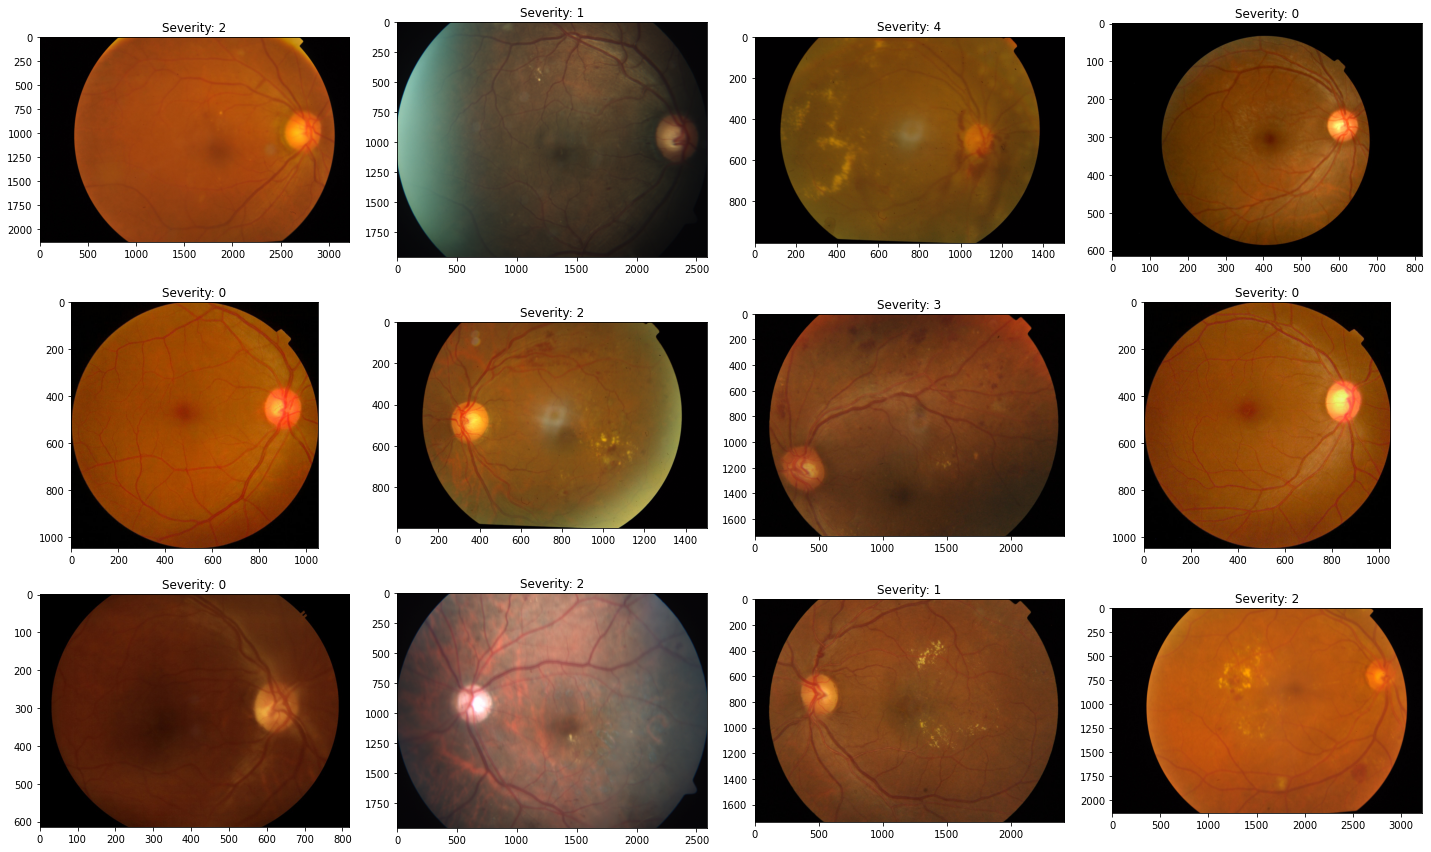

In [ ]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'/content/drive/MyDrive/Aptos 2019/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(f'Severity: {image_id}')
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

# **Image pre processing **

In [ ]:
import os
import sys
from PIL import ImageFile,Image, ImageFilter ,ImageOps
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage import io
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [ ]:
train_path = "/content/drive/MyDrive/Aptos 2019/train_images"
test_path = "/content/drive/MyDrive/Aptos 2019/test_images/test_images/"
train_img = [train_path +x for x in os.listdir(train_path)]
test_img = [test_path +x for x in os.listdir(test_path)]

In [ ]:
def img_operations(path, new_path):
   
    create_directory(new_path)
    dirs = [l for l in os.listdir(path) if l != '.DS_Store']
    total = 0

    for item in dirs:
        img = Image.open(path+item)

        #median filter
        img = img.filter(ImageFilter.MedianFilter(size = 3))
        #histogram equalization
        img = ImageOps.equalize(img, mask = None)
        img = np.array(img)
        
        #resize to standard size
        img = resize(img, (256,256))
        io.imsave(str(new_path + item), img)
        total += 1
        print("Saving: ", item, total)


In [ ]:
if __name__ == '__main__':
   img_operations(path='../content/drive/MyDrive/Aptos 2019/train_images/', new_path='../content/drive/MyDrive/Aptos 2019/pre_processed' )

Saving:  20060411_61808_0200_PP.png 1


Saving:  20060412_51835_0200_PP.png 2


Saving:  20060412_51952_0200_PP.png 3


Saving:  20060411_62058_0200_PP.png 4


Saving:  20060412_51656_0200_PP.png 5


Saving:  20060411_61979_0200_PP.png 6


Saving:  20060411_62162_0200_PP.png 7


Saving:  20060411_62298_0200_PP.png 8


Saving:  20060411_62036_0200_PP.png 9


Saving:  20060412_51932_0200_PP.png 10


Saving:  20060411_62373_0200_PP.png 11


Saving:  20060412_51860_0200_PP.png 12


Saving:  20060412_51746_0200_PP.png 13


Saving:  20060411_62142_0200_PP.png 14


Saving:  20060412_51677_0200_PP.png 15


Saving:  20060411_61869_0200_PP.png 16


Saving:  20060412_51775_0200_PP.png 17


Saving:  20060411_62228_0200_PP.png 18


Saving:  20060412_52668_0200_PP.png 19


Saving:  20060412_52174_0200_PP.png 20


Saving:  20060412_52020_0200_PP.png 21


Saving:  20060412_52758_0200_PP.png 22


Saving:  20060412_52497_0200_PP.png 23


Saving:  20060412_52446_0200_PP.png 24


Saving:  20060412_52606_0200_PP.png 25


Saving:  20060412_52860_0200_PP.png 26


Saving:  20060412_52245_0200_PP.png 27


Saving:  20060412_52194_0200_PP.png 28


Saving:  20060412_52351_0200_PP.png 29


Saving:  20060412_52122_0200_PP.png 30


Saving:  20060412_52910_0200_PP.png 31


Saving:  20060412_52425_0200_PP.png 32


Saving:  20060412_52587_0200_PP.png 33


Saving:  20060412_52271_0200_PP.png 34


Saving:  20060412_52038_0200_PP.png 35


Saving:  20060412_52098_0200_PP.png 36


Saving:  20060412_52371_0200_PP.png 37


Saving:  20060412_52520_0200_PP.png 38


Saving:  20060412_52840_0200_PP.png 39


Saving:  20060412_52777_0200_PP.png 40


Saving:  20060412_52685_0200_PP.png 41


Saving:  20060412_58137_0200_PP.png 42


Saving:  20060412_58638_0200_PP.png 43


Saving:  20060412_52978_0200_PP.png 44


Saving:  20060412_58368_0200_PP.png 45


Saving:  20060412_58548_0200_PP.png 46


Saving:  20060412_57680_0200_PP.png 47


Saving:  20060412_57846_0200_PP.png 48


Saving:  20060412_58054_0200_PP.png 49


Saving:  20060412_58471_0200_PP.png 50


Saving:  20060412_58171_0200_PP.png 51


Saving:  20060412_57952_0200_PP.png 52


Saving:  20060412_58032_0200_PP.png 53


Saving:  20060412_57974_0200_PP.png 54


Saving:  20060412_52997_0200_PP.png 55


Saving:  20060412_58497_0200_PP.png 56


Saving:  20060412_57650_0200_PP.png 57


Saving:  20060412_57874_0200_PP.png 58


Saving:  20060412_52931_0200_PP.png 59


Saving:  20060412_58563_0200_PP.png 60


Saving:  20060412_58314_0200_PP.png 61


Saving:  20060412_58287_0200_PP.png 62


Saving:  20060412_58387_0200_PP.png 63


Saving:  20060412_58965_0200_PP.png 64


Saving:  20060412_59124_0200_PP.png 65


Saving:  20060412_59196_0200_PP.png 66


Saving:  20060412_58802_0200_PP.png 67


Saving:  20060412_59100_0200_PP.png 68


Saving:  20060412_59175_0200_PP.png 69


Saving:  20060412_58723_0200_PP.png 70


Saving:  20060412_58889_0200_PP.png 71


Saving:  20060412_59012_0200_PP.png 72


Saving:  20060412_58747_0200_PP.png 73


Saving:  20060412_58869_0200_PP.png 74


Saving:  20060412_58819_0200_PP.png 75


Saving:  20060412_59037_0200_PP.png 76


Saving:  20060412_58945_0200_PP.png 77


Saving:  20060412_58668_0200_PP.png 78


Saving:  20060412_60913_0200_PP.png 79


Saving:  20060412_60545_0200_PP.png 80


Saving:  20060412_60454_0200_PP.png 81


Saving:  20060412_59242_0200_PP.png 82


Saving:  20060412_59400_0200_PP.png 83


Saving:  20060412_60825_0200_PP.png 84


Saving:  20060412_59355_0200_PP.png 85


Saving:  20060412_60573_0200_PP.png 86


Saving:  20060412_59338_0200_PP.png 87


Saving:  20060412_60475_0200_PP.png 88


Saving:  20060412_59259_0200_PP.png 89


Saving:  20060412_60845_0200_PP.png 90


Saving:  20060412_60773_0200_PP.png 91


Saving:  20060412_59658_0200_PP.png 92


Saving:  20060412_59717_0200_PP.png 93


Saving:  20060412_59423_0200_PP.png 94


Saving:  20060412_60895_0200_PP.png 95


Saving:  20060412_60337_0200_PP.png 96


Saving:  20060412_59735_0200_PP.png 97


Saving:  20060412_60396_0200_PP.png 98


Saving:  20060412_59636_0200_PP.png 99


Saving:  20060412_60751_0200_PP.png 100


Saving:  20060412_61433_0200_PP.png 101


Saving:  20060412_61808_0200_PP.png 102


Saving:  20060412_61251_0200_PP.png 103


Saving:  20060412_61501_0200_PP.png 104


Saving:  20060412_61383_0200_PP.png 105


Saving:  20060412_61681_0200_PP.png 106


Saving:  20060412_61064_0200_PP.png 107


Saving:  20060412_61593_0200_PP.png 108


Saving:  20060412_61169_0200_PP.png 109


Saving:  20060412_62960_0200_PP.png 110


Saving:  20060412_60978_0200_PP.png 111


Saving:  20060412_61450_0200_PP.png 112


Saving:  20060412_61790_0200_PP.png 113


Saving:  20060412_62936_0200_PP.png 114


Saving:  20060412_61316_0200_PP.png 115


Saving:  20060412_61151_0200_PP.png 116


Saving:  20060412_61665_0200_PP.png 117


Saving:  20060412_61615_0200_PP.png 118


Saving:  20060412_61299_0200_PP.png 119


Saving:  20060412_61365_0200_PP.png 120


Saving:  20060412_61525_0200_PP.png 121


Saving:  20060412_61081_0200_PP.png 122


Saving:  20060412_61222_0200_PP.png 123


Saving:  20060412_61000_0200_PP.png 124


Saving:  20060522_45718_0100_PP.png 125


Saving:  20060522_45583_0100_PP.png 126


Saving:  20060412_63009_0200_PP.png 127


Saving:  20060522_45455_0100_PP.png 128


Saving:  20060412_63104_0200_PP.png 129


Saving:  20060522_45248_0100_PP.png 130


Saving:  20060522_45069_0100_PP.png 131


Saving:  20060522_45796_0100_PP.png 132


Saving:  20060522_45402_0100_PP.png 133


Saving:  20060522_45691_0100_PP.png 134


Saving:  20060412_63088_0200_PP.png 135


Saving:  20060522_43758_0100_PP.png 136


Saving:  20060522_45541_0100_PP.png 137


Saving:  20060412_63032_0200_PP.png 138


Saving:  20060522_45212_0100_PP.png 139


Saving:  20060522_45777_0100_PP.png 140


Saving:  20060523_43123_0100_PP.png 141


Saving:  20060522_46400_0100_PP.png 142


Saving:  20060522_46149_0100_PP.png 143


Saving:  20060522_45967_0100_PP.png 144


Saving:  20060523_43174_0100_PP.png 145


Saving:  20060522_46454_0100_PP.png 146


Saving:  20060522_45853_0100_PP.png 147


Saving:  20060522_46379_0100_PP.png 148


Saving:  20060523_43038_0100_PP.png 149


Saving:  20060523_43016_0100_PP.png 150


Saving:  20060522_46104_0100_PP.png 151


Saving:  20060522_45935_0100_PP.png 152


Saving:  20060523_43105_0100_PP.png 153


Saving:  20060522_45873_0100_PP.png 154


Saving:  20060523_42953_0100_PP.png 155


Saving:  20060523_43248_0100_PP.png 156


Saving:  20060523_45449_0100_PP.png 157


Saving:  20060523_45467_0100_PP.png 158


Saving:  20060523_43267_0100_PP.png 159


Saving:  20060523_43354_0100_PP.png 160


Saving:  20060523_45548_0100_PP.png 161


Saving:  20060523_43196_0100_PP.png 162


Saving:  20060523_45316_0100_PP.png 163


Saving:  20060523_45216_0100_PP.png 164


Saving:  20060523_45235_0100_PP.png 165


Saving:  20060523_45300_0100_PP.png 166


Saving:  20060523_45524_0100_PP.png 167


Saving:  20060523_43333_0100_PP.png 168


Saving:  20060523_45389_0100_PP.png 169


Saving:  20060523_45369_0100_PP.png 170


Saving:  20060523_45697_0100_PP.png 171


Saving:  20060523_48425_0100_PP.png 172


Saving:  20060523_45812_0100_PP.png 173


Saving:  20060523_45787_0100_PP.png 174


Saving:  20060523_48477_0100_PP.png 175


Saving:  20060523_48406_0100_PP.png 176


Saving:  20060523_48182_0100_PP.png 177


Saving:  20060523_48102_0100_PP.png 178


Saving:  20060523_48161_0100_PP.png 179


Saving:  20060523_48028_0100_PP.png 180


Saving:  20060523_48136_0100_PP.png 181


Saving:  20060523_48005_0100_PP.png 182


Saving:  20060523_48199_0100_PP.png 183


Saving:  20060523_47987_0100_PP.png 184


Saving:  20060523_45662_0100_PP.png 185


Saving:  20060523_48787_0100_PP.png 186


Saving:  20060523_49120_0100_PP.png 187


Saving:  20060523_48931_0100_PP.png 188


Saving:  20060523_48990_0100_PP.png 189


Saving:  20060523_48643_0100_PP.png 190


Saving:  20060523_48890_0100_PP.png 191


Saving:  20060523_48816_0100_PP.png 192


Saving:  20060523_49100_0100_PP.png 193


Saving:  20060523_48659_0100_PP.png 194


Saving:  20060523_48499_0100_PP.png 195


Saving:  20060523_49176_0100_PP.png 196


Saving:  20060523_48709_0100_PP.png 197


Saving:  20060523_48572_0100_PP.png 198


Saving:  20060523_48728_0100_PP.png 199


Saving:  20060523_48591_0100_PP.png 200


Saving:  20060523_49010_0100_PP.png 201


Saving:  20060523_49809_0100_PP.png 202


Saving:  20060523_49269_0100_PP.png 203


Saving:  20060523_49591_0100_PP.png 204


Saving:  20060523_49573_0100_PP.png 205


Saving:  20060523_49191_0100_PP.png 206


Saving:  20060523_49875_0100_PP.png 207


Saving:  20060523_49859_0100_PP.png 208


Saving:  20060523_49791_0100_PP.png 209


Saving:  20060523_49726_0100_PP.png 210


Saving:  20060523_49745_0100_PP.png 211


Saving:  20060523_49663_0100_PP.png 212


Saving:  20060523_49681_0100_PP.png 213


Saving:  20060523_49515_0100_PP.png 214


Saving:  20060523_49288_0100_PP.png 215


Saving:  20060523_49449_0100_PP.png 216


Saving:  20060523_49942_0100_PP.png 217


Saving:  20060523_50135_0100_PP.png 218


Saving:  20060523_49928_0100_PP.png 219


Saving:  20060523_50019_0100_PP.png 220


Saving:  20060523_50234_0100_PP.png 221


Saving:  20060523_50153_0100_PP.png 222


Saving:  20060523_50003_0100_PP.png 223


Saving:  20060523_50262_0100_PP.png 224


Saving:  20060523_50631_0100_PP.png 225


Saving:  20060523_50469_0100_PP.png 226


Saving:  20060523_50616_0100_PP.png 227


Saving:  20060523_50539_0100_PP.png 228


Saving:  20060523_50392_0100_PP.png 229


Saving:  20060523_50342_0100_PP.png 230


Saving:  20060523_50325_0100_PP.png 231


Saving:  20060523_50408_0100_PP.png 232


Saving:  20060523_50556_0100_PP.png 233


Saving:  20060523_50489_0100_PP.png 234


Saving:  20060523_50707_0100_PP.png 235


Saving:  20060529_56700_0100_PP.png 236


Saving:  20060529_56834_0100_PP.png 237


Saving:  20060529_56255_0100_PP.png 238


Saving:  20060529_56853_0100_PP.png 239


Saving:  20060529_56948_0100_PP.png 240


Saving:  20060523_50806_0100_PP.png 241


Saving:  20060529_56442_0100_PP.png 242


Saving:  20060523_50790_0100_PP.png 243


Saving:  20060529_56039_0100_PP.png 244


Saving:  20060529_56338_0100_PP.png 245


Saving:  20060529_56730_0100_PP.png 246


Saving:  20060529_56420_0100_PP.png 247


Saving:  20060529_56592_0100_PP.png 248


Saving:  20060523_50730_0100_PP.png 249


Saving:  20060529_56563_0100_PP.png 250


Saving:  20060529_56013_0100_PP.png 251


Saving:  20060529_57063_0100_PP.png 252


Saving:  20060529_57156_0100_PP.png 253


Saving:  20060529_57447_0100_PP.png 254


Saving:  20060529_57430_0100_PP.png 255


Saving:  20060529_57261_0100_PP.png 256


Saving:  20060530_51279_0100_PP.png 257


Saving:  20060529_56968_0100_PP.png 258


Saving:  20060529_57351_0100_PP.png 259


Saving:  20060530_36860_0100_PP.png 260


Saving:  20060529_57287_0100_PP.png 261


Saving:  20060529_57030_0100_PP.png 262


Saving:  20060530_51254_0100_PP.png 263


Saving:  20060530_36895_0100_PP.png 264


Saving:  20060529_57372_0100_PP.png 265


Saving:  20060529_57174_0100_PP.png 266


Saving:  20060530_53152_0100_PP.png 267


Saving:  20060530_53522_0100_PP.png 268


Saving:  20060530_53132_0100_PP.png 269


Saving:  20060530_51399_0100_PP.png 270


Saving:  20060530_53233_0100_PP.png 271


Saving:  20060530_53062_0100_PP.png 272


Saving:  20060530_53617_0100_PP.png 273


Saving:  20060530_53421_0100_PP.png 274


Saving:  20060530_53271_0100_PP.png 275


Saving:  20060530_53597_0100_PP.png 276


Saving:  20060530_51377_0100_PP.png 277


Saving:  20060530_53540_0100_PP.png 278


Saving:  20060530_53455_0100_PP.png 279


Saving:  20060530_53042_0100_PP.png 280


Saving:  20060530_53954_0100_PP.png 281


Saving:  20060530_53928_0100_PP.png 282


Saving:  20060530_54030_0100_PP.png 283


Saving:  20060530_53836_0100_PP.png 284


Saving:  20060530_53761_0100_PP.png 285


Saving:  20060530_54312_0100_PP.png 286


Saving:  20060530_54223_0100_PP.png 287


Saving:  20060530_53742_0100_PP.png 288


Saving:  20060530_54011_0100_PP.png 289


Saving:  20060530_54242_0100_PP.png 290


Saving:  20060530_54117_0100_PP.png 291


Saving:  20060530_53816_0100_PP.png 292


Saving:  20060530_54107_0100_PP.png 293


Saving:  20060530_55746_0100_PP.png 294


Saving:  20060530_54653_0100_PP.png 295


Saving:  20060530_54332_0100_PP.png 296


Saving:  20060530_55203_0100_PP.png 297


Saving:  20060530_55816_0100_PP.png 298


Saving:  20060530_54556_0100_PP.png 299


Saving:  20060530_55628_0100_PP.png 300


Saving:  20060530_54529_0100_PP.png 301


Saving:  20060530_55370_0100_PP.png 302


Saving:  20060530_55451_0100_PP.png 303


Saving:  20060530_55724_0100_PP.png 304


Saving:  20060530_55607_0100_PP.png 305


Saving:  20060530_55390_0100_PP.png 306


Saving:  20060530_54632_0100_PP.png 307


Saving:  20060530_55180_0100_PP.png 308


Saving:  20060530_55468_0100_PP.png 309


Saving:  IM000139.jpg 310


Saving:  IM000146.jpg 311


Saving:  IM000079.jpg 312


Saving:  IM000087.jpg 313


Saving:  IM000101.jpg 314


Saving:  IM000086.jpg 315


Saving:  IM000205.jpg 316


Saving:  IM000114.jpg 317


Saving:  IM000138.jpg 318


Saving:  IM000168.jpg 319


Saving:  IM000057.jpg 320


Saving:  IM000094.jpg 321


Saving:  IM000108.jpg 322


Saving:  IM000066.jpg 323


Saving:  IM000107.jpg 324


Saving:  IM000131.jpg 325


Saving:  IM000167.jpg 326


Saving:  IM000115.jpg 327


Saving:  IM000072.jpg 328


Saving:  IM000065.jpg 329


Saving:  IM000132.jpg 330


Saving:  20060530_55837_0100_PP.png 331


Saving:  IM000056.jpg 332


Saving:  IM000145.jpg 333


Saving:  IM000191.jpg 334


Saving:  IM000080.jpg 335


Saving:  IM000013.jpg 336


Saving:  IM000198.jpg 337


Saving:  IM000100.jpg 338


Saving:  IM000160.jpg 339


Saving:  IM000190.jpg 340


Saving:  IM000123.jpg 341


Saving:  IM000161.jpg 342


Saving:  IM000197.jpg 343


Saving:  IM000093.jpg 344


Saving:  IM000122.jpg 345


Saving:  IM000073.jpg 346


Saving:  IM000012.jpg 347


Saving:  IM000263.jpg 348


Saving:  IM000298.jpg 349


Saving:  IM000299.jpg 350


Saving:  IM000405.jpg 351


Saving:  IM000220.jpg 352


Saving:  IM000357.jpg 353


Saving:  IM000305.jpg 354


Saving:  IM000326.jpg 355


Saving:  IM000450.jpg 356


Saving:  IM000327.jpg 357


Saving:  IM000372.jpg 358


Saving:  IM000472.jpg 359


Saving:  IM000412.jpg 360


Saving:  IM000312.jpg 361


Saving:  IM000219.jpg 362


Saving:  IM000426.jpg 363


Saving:  IM000350.jpg 364


Saving:  IM000241.jpg 365


Saving:  IM000242.jpg 366


Saving:  IM000319.jpg 367


Saving:  IM000292.jpg 368


Saving:  IM000206.jpg 369


Saving:  IM000212.jpg 370


Saving:  IM000413.jpg 371


Saving:  IM000249.jpg 372


Saving:  IM000379.jpg 373


Saving:  IM000313.jpg 374


Saving:  IM000406.jpg 375


Saving:  IM000349.jpg 376


Saving:  IM000291.jpg 377


Saving:  IM000371.jpg 378


Saving:  IM000213.jpg 379


Saving:  IM000425.jpg 380


Saving:  IM000264.jpg 381


Saving:  IM000378.jpg 382


Saving:  IM000320.jpg 383


Saving:  IM000356.jpg 384


Saving:  IM000306.jpg 385


Saving:  IM000248.jpg 386


Saving:  IM000449.jpg 387


Saving:  IM000674.jpg 388


Saving:  IM000553.jpg 389


Saving:  IM000594.jpg 390


Saving:  IM000547.jpg 391


Saving:  IM000682.jpg 392


Saving:  IM000689.jpg 393


Saving:  IM000530.jpg 394


Saving:  IM000696.jpg 395


Saving:  IM000690.jpg 396


Saving:  IM000537.jpg 397


Saving:  IM000587.jpg 398


Saving:  IM000667.jpg 399


Saving:  IM000546.jpg 400


Saving:  IM000500.jpg 401


Saving:  IM000554.jpg 402


Saving:  IM000668.jpg 403


Saving:  IM000595.jpg 404


Saving:  IM000602.jpg 405


Saving:  IM000501.jpg 406


Saving:  IM000697.jpg 407


Saving:  IM000601.jpg 408


Saving:  IM000653.jpg 409


Saving:  IM000480.jpg 410


Saving:  IM000561.jpg 411


Saving:  IM000538.jpg 412


Saving:  IM000531.jpg 413


Saving:  IM000479.jpg 414


Saving:  IM000579.jpg 415


Saving:  IM000586.jpg 416


Saving:  IM000580.jpg 417


Saving:  IM000568.jpg 418


Saving:  IM000683.jpg 419


Saving:  IM000654.jpg 420


Saving:  IM000516.jpg 421


Saving:  IM000567.jpg 422


Saving:  IM000560.jpg 423


Saving:  IM000703.jpg 424


Saving:  IM000675.jpg 425


Saving:  IM000473.jpg 426


Saving:  IM000515.jpg 427


Saving:  IM000840.jpg 428


Saving:  IM000726.jpg 429


Saving:  IM000732.jpg 430


Saving:  IM000762.jpg 431


Saving:  IM000813.jpg 432


Saving:  IM000888.jpg 433


Saving:  IM000881.jpg 434


Saving:  IM000768.jpg 435


Saving:  IM000776.jpg 436


Saving:  IM000859.jpg 437


Saving:  IM000937.jpg 438


Saving:  IM000806.jpg 439


Saving:  IM000924.jpg 440


Saving:  IM000733.jpg 441


Saving:  IM000725.jpg 442


Saving:  IM000826.jpg 443


Saving:  IM000896.jpg 444


Saving:  IM000834.jpg 445


Saving:  IM000923.jpg 446


Saving:  IM000712.jpg 447


Saving:  IM000833.jpg 448


Saving:  IM000805.jpg 449


Saving:  IM000711.jpg 450


Saving:  IM000812.jpg 451


Saving:  IM000938.jpg 452


Saving:  IM000895.jpg 453


Saving:  IM000848.jpg 454


Saving:  IM000761.jpg 455


Saving:  IM000984.jpg 456


Saving:  IM000887.jpg 457


Saving:  IM000860.jpg 458


Saving:  IM000769.jpg 459


Saving:  IM000777.jpg 460


Saving:  IM000851.jpg 461


Saving:  IM000917.jpg 462


Saving:  IM000880.jpg 463


Saving:  IM000704.jpg 464


Saving:  IM000827.jpg 465


Saving:  IM000850.jpg 466


Saving:  IM000985.jpg 467


Saving:  IM000916.jpg 468


Saving:  IM001109.jpg 469


Saving:  IM001200.jpg 470


Saving:  IM001008.jpg 471


Saving:  IM001181.jpg 472


Saving:  IM001033.jpg 473


Saving:  IM000998.jpg 474


Saving:  IM001110.jpg 475


Saving:  IM001007.jpg 476


Saving:  IM001095.jpg 477


Saving:  IM001211.jpg 478


Saving:  IM001199.jpg 479


Saving:  IM000991.jpg 480


Saving:  IM001175.jpg 481


Saving:  IM001185.jpg 482


Saving:  IM001034.jpg 483


Saving:  IM000992.jpg 484


Saving:  IM001124.jpg 485


Saving:  IM001210.jpg 486


Saving:  IM001096.jpg 487


Saving:  IM001139.jpg 488


Saving:  IM001153.jpg 489


Saving:  IM001168.jpg 490


Saving:  IM001160.jpg 491


Saving:  IM001145.jpg 492


Saving:  IM001103.jpg 493


Saving:  IM001146.jpg 494


Saving:  IM001167.jpg 495


Saving:  IM001102.jpg 496


Saving:  IM001089.jpg 497


Saving:  IM001152.jpg 498


Saving:  IM001138.jpg 499


Saving:  IM001174.jpg 500


Saving:  IM001123.jpg 501


Saving:  IM001117.jpg 502


Saving:  IM001161.jpg 503


Saving:  IM001026.jpg 504


Saving:  IM001027.jpg 505


Saving:  IM000999.jpg 506


Saving:  IM001088.jpg 507


Saving:  IM001116.jpg 508


Saving:  IM001232.jpg 509


Saving:  IM001357.jpg 510


Saving:  IM001415.jpg 511


Saving:  IM001336.jpg 512


Saving:  IM001217.jpg 513


Saving:  IM001402.jpg 514


Saving:  IM001401.jpg 515


Saving:  IM001439.jpg 516


Saving:  IM001454.jpg 517


Saving:  IM001300.jpg 518


Saving:  IM001224.jpg 519


Saving:  IM001293.jpg 520


Saving:  IM001273.jpg 521


Saving:  IM001245.jpg 522


Saving:  IM001272.jpg 523


Saving:  IM001453.jpg 524


Saving:  IM001307.jpg 525


Saving:  IM001440.jpg 526


Saving:  IM001329.jpg 527


Saving:  IM001372.jpg 528


Saving:  IM001328.jpg 529


Saving:  IM001322.jpg 530


Saving:  IM001358.jpg 531


Saving:  IM001335.jpg 532


Saving:  IM001294.jpg 533


Saving:  IM001246.jpg 534


Saving:  IM001371.jpg 535


Saving:  IM001218.jpg 536


Saving:  IM001301.jpg 537


Saving:  IM001423.jpg 538


Saving:  IM001387.jpg 539


Saving:  IM001422.jpg 540


Saving:  IM001227.jpg 541


Saving:  IM001321.jpg 542


Saving:  IM001416.jpg 543


Saving:  IM001253.jpg 544


Saving:  IM001386.jpg 545


Saving:  IM001252.jpg 546


Saving:  IM001231.jpg 547


Saving:  IM001308.jpg 548


Saving:  IM001666.jpg 549


Saving:  IM001513.jpg 550


Saving:  IM001687.jpg 551


Saving:  IM001540.jpg 552


Saving:  IM001744.jpg 553


Saving:  IM001644.jpg 554


Saving:  IM001680.jpg 555


Saving:  IM001467.jpg 556


Saving:  IM001643.jpg 557


Saving:  IM001581.jpg 558


Saving:  IM001539.jpg 559


Saving:  IM001483.jpg 560


Saving:  IM001460.jpg 561


Saving:  IM001681.jpg 562


Saving:  IM001476.jpg 563


Saving:  IM001468.jpg 564


Saving:  IM001630.jpg 565


Saving:  IM001688.jpg 566


Saving:  IM001617.jpg 567


Saving:  IM001484.jpg 568


Saving:  IM001596.jpg 569


Saving:  IM001514.jpg 570


Saving:  IM001629.jpg 571


Saving:  IM001636.jpg 572


Saving:  IM001738.jpg 573


Saving:  IM001673.jpg 574


Saving:  IM001560.jpg 575


Saving:  IM001582.jpg 576


Saving:  IM001618.jpg 577


Saving:  IM001737.jpg 578


Saving:  IM001477.jpg 579


Saving:  IM001597.jpg 580


Saving:  IM001667.jpg 581


Saving:  IM001490.jpg 582


Saving:  IM001461.jpg 583


Saving:  IM001674.jpg 584


Saving:  IM001701.jpg 585


Saving:  IM001702.jpg 586


Saving:  IM001637.jpg 587


Saving:  IM001492.jpg 588


Saving:  IM001559.jpg 589


Saving:  IM001758.jpg 590


Saving:  IM001926.jpg 591


Saving:  IM002027.jpg 592


Saving:  IM001941.jpg 593


Saving:  IM001804.jpg 594


Saving:  IM001752.jpg 595


Saving:  IM001866.jpg 596


Saving:  IM001832.jpg 597


Saving:  IM001964.jpg 598


Saving:  IM002026.jpg 599


Saving:  IM001751.jpg 600


Saving:  IM001950.jpg 601


Saving:  IM002003.jpg 602


Saving:  IM001911.jpg 603


Saving:  IM001853.jpg 604


Saving:  IM001759.jpg 605


Saving:  IM001965.jpg 606


Saving:  IM001880.jpg 607


Saving:  IM001942.jpg 608


Saving:  IM001765.jpg 609


Saving:  IM001854.jpg 610


Saving:  IM001831.jpg 611


Saving:  IM001912.jpg 612


Saving:  IM001927.jpg 613


Saving:  IM001846.jpg 614


Saving:  IM001881.jpg 615


Saving:  IM001985.jpg 616


Saving:  IM002020.jpg 617


Saving:  IM001805.jpg 618


Saving:  IM001766.jpg 619


Saving:  IM001845.jpg 620


Saving:  IM002019.jpg 621


Saving:  IM001948.jpg 622


Saving:  IM001984.jpg 623


Saving:  IM001797.jpg 624


Saving:  IM001867.jpg 625


Saving:  IM001745.jpg 626


Saving:  IM002033.jpg 627


Saving:  IM002004.jpg 628


Saving:  IM001798.jpg 629


Saving:  IM002322.jpg 630


Saving:  IM002034.jpg 631


Saving:  IM002222.jpg 632


Saving:  IM002208.jpg 633


Saving:  IM002275.jpg 634


Saving:  IM002209.jpg 635


Saving:  IM002285.jpg 636


Saving:  IM002385.jpg 637


Saving:  IM002215.jpg 638


Saving:  IM002335.jpg 639


Saving:  IM002201.jpg 640


Saving:  IM002148.jpg 641


Saving:  IM002134.jpg 642


Saving:  IM002157.jpg 643


Saving:  IM002223.jpg 644


Saving:  IM002071.jpg 645


Saving:  IM002053.jpg 646


Saving:  IM002336.jpg 647


Saving:  IM002356.jpg 648


Saving:  IM002202.jpg 649


Saving:  IM002399.jpg 650


Saving:  IM002284.jpg 651


Saving:  IM002357.jpg 652


Saving:  IM002251.jpg 653


Saving:  IM002135.jpg 654


Saving:  IM002384.jpg 655


Saving:  IM002149.jpg 656


Saving:  IM002252.jpg 657


Saving:  IM002268.jpg 658


Saving:  IM002300.jpg 659


Saving:  IM002216.jpg 660


Saving:  IM002400.jpg 661


Saving:  IM002156.jpg 662


Saving:  IM002052.jpg 663


Saving:  IM002276.jpg 664


Saving:  IM002321.jpg 665


Saving:  IM002070.jpg 666


Saving:  IM002301.jpg 667


Saving:  IM002269.jpg 668


Saving:  IM002509.jpg 669


Saving:  IM002448.jpg 670


Saving:  IM002635.jpg 671


Saving:  IM002622.jpg 672


Saving:  IM002530.jpg 673


Saving:  IM002523.jpg 674


Saving:  IM002508.jpg 675


Saving:  IM002577.jpg 676


Saving:  IM002584.jpg 677


Saving:  IM002473.jpg 678


Saving:  IM002516.jpg 679


Saving:  IM002415.jpg 680


Saving:  IM002486.jpg 681


Saving:  IM002487.jpg 682


Saving:  IM002465.jpg 683


Saving:  IM002456.jpg 684


Saving:  IM002614.jpg 685


Saving:  IM002482.jpg 686


Saving:  IM002449.jpg 687


Saving:  IM002442.jpg 688


Saving:  IM002642.jpg 689


Saving:  IM002500.jpg 690


Saving:  IM002455.jpg 691


Saving:  IM002466.jpg 692


Saving:  IM002543.jpg 693


Saving:  IM002585.jpg 694


Saving:  IM002441.jpg 695


Saving:  IM002414.jpg 696


Saving:  IM002515.jpg 697


Saving:  IM002481.jpg 698


Saving:  IM002472.jpg 699


Saving:  IM002529.jpg 700


Saving:  IM002493.jpg 701


Saving:  IM002494.jpg 702


Saving:  IM002501.jpg 703


Saving:  IM002522.jpg 704


Saving:  IM002578.jpg 705


Saving:  IM002544.jpg 706


Saving:  IM002621.jpg 707


Saving:  IM002636.jpg 708


Saving:  IM002615.jpg 709


Saving:  IM002726.jpg 710


Saving:  IM002719.jpg 711


Saving:  IM002895.jpg 712


Saving:  IM002845.jpg 713


Saving:  IM002765.jpg 714


Saving:  IM002766.jpg 715


Saving:  IM002894.jpg 716


Saving:  IM002901.jpg 717


Saving:  IM002782.jpg 718


Saving:  IM002781.jpg 719


Saving:  IM002650.jpg 720


Saving:  IM002852.jpg 721


Saving:  IM002666.jpg 722


Saving:  IM002828.jpg 723


Saving:  IM002846.jpg 724


Saving:  IM002665.jpg 725


Saving:  IM002733.jpg 726


Saving:  IM002909.jpg 727


Saving:  IM002649.jpg 728


Saving:  IM002732.jpg 729


Saving:  IM002902.jpg 730


Saving:  IM002861.jpg 731


Saving:  IM002659.jpg 732


Saving:  IM002658.jpg 733


Saving:  IM002908.jpg 734


Saving:  IM002704.jpg 735


Saving:  IM002860.jpg 736


Saving:  IM002695.jpg 737


Saving:  IM002853.jpg 738


Saving:  IM002821.jpg 739


Saving:  IM002697.jpg 740


Saving:  IM002725.jpg 741


Saving:  IM002803.jpg 742


Saving:  IM002822.jpg 743


Saving:  IM002718.jpg 744


Saving:  IM002802.jpg 745


Saving:  IM002643.jpg 746


Saving:  IM002703.jpg 747


Saving:  IM002829.jpg 748


Saving:  IM003221.jpg 749


Saving:  IM003214.jpg 750


Saving:  IM002952.jpg 751


Saving:  IM003160.jpg 752


Saving:  IM003161.jpg 753


Saving:  IM002982.jpg 754


Saving:  IM003035.jpg 755


Saving:  IM002953.jpg 756


Saving:  IM002997.jpg 757


Saving:  IM002946.jpg 758


Saving:  IM003175.jpg 759


Saving:  IM003147.jpg 760


Saving:  IM003020.jpg 761


Saving:  IM002990.jpg 762


Saving:  IM003125.jpg 763


Saving:  IM002998.jpg 764


Saving:  IM002975.jpg 765


Saving:  IM002938.jpg 766


Saving:  IM003207.jpg 767


Saving:  IM003146.jpg 768


Saving:  IM003058.jpg 769


Saving:  IM003057.jpg 770


Saving:  IM002921.jpg 771


Saving:  IM003011.jpg 772


Saving:  IM003208.jpg 773


Saving:  IM002983.jpg 774


Saving:  IM003110.jpg 775


Saving:  IM002939.jpg 776


Saving:  IM002991.jpg 777


Saving:  IM003071.jpg 778


Saving:  IM002973.jpg 779


Saving:  IM003108.jpg 780


Saving:  IM003012.jpg 781


Saving:  IM003070.jpg 782


Saving:  IM003215.jpg 783


Saving:  IM003222.jpg 784


Saving:  IM003176.jpg 785


Saving:  IM002945.jpg 786


Saving:  IM002922.jpg 787


Saving:  IM003034.jpg 788


Saving:  IM003019.jpg 789


Saving:  IM003124.jpg 790


Saving:  IM003359.jpg 791


Saving:  IM003454.jpg 792


Saving:  IM003243.jpg 793


Saving:  IM003390.jpg 794


Saving:  IM003468.jpg 795


Saving:  IM003475.jpg 796


Saving:  IM003467.jpg 797


Saving:  IM003519.jpg 798


Saving:  IM003520.jpg 799


Saving:  IM003286.jpg 800


Saving:  IM003413.jpg 801


Saving:  IM003338.jpg 802


Saving:  IM003331.jpg 803


Saving:  IM003265.jpg 804


Saving:  IM003424.jpg 805


Saving:  IM003324.jpg 806


Saving:  IM003337.jpg 807


Saving:  IM003330.jpg 808


Saving:  IM003431.jpg 809


Saving:  IM003381.jpg 810


Saving:  IM003230.jpg 811


Saving:  IM003412.jpg 812


Saving:  IM003481.jpg 813


Saving:  IM003564.jpg 814


Saving:  IM003430.jpg 815


Saving:  IM003287.jpg 816


Saving:  IM003405.jpg 817


Saving:  IM003244.jpg 818


Saving:  IM003360.jpg 819


Saving:  IM003423.jpg 820


Saving:  IM003474.jpg 821


Saving:  IM003391.jpg 822


Saving:  IM003229.jpg 823


Saving:  IM003382.jpg 824


Saving:  IM003482.jpg 825


Saving:  IM003323.jpg 826


Saving:  IM003563.jpg 827


Saving:  IM003406.jpg 828


Saving:  IM003453.jpg 829


Saving:  IM003264.jpg 830


Saving:  IM003746.jpg 831


Saving:  IM003640.jpg 832


Saving:  IM003632.jpg 833


Saving:  IM003856.jpg 834


Saving:  IM003580.jpg 835


Saving:  IM003719.jpg 836


Saving:  IM003772.jpg 837


Saving:  IM003759.jpg 838


Saving:  IM003840.jpg 839


Saving:  IM003787.jpg 840


Saving:  IM003773.jpg 841


Saving:  IM003602.jpg 842


Saving:  IM003596.jpg 843


Saving:  IM003603.jpg 844


Saving:  IM003641.jpg 845


Saving:  IM003626.jpg 846


Saving:  IM003794.jpg 847


Saving:  IM003726.jpg 848


Saving:  IM003595.jpg 849


Saving:  IM003571.jpg 850


Saving:  IM003747.jpg 851


Saving:  IM003765.jpg 852


Saving:  IM003766.jpg 853


Saving:  IM003827.jpg 854


Saving:  IM003577.jpg 855


Saving:  IM003633.jpg 856


Saving:  IM003688.jpg 857


Saving:  IM003788.jpg 858


Saving:  IM003725.jpg 859


Saving:  IM003795.jpg 860


Saving:  IM003812.jpg 861


Saving:  IM003687.jpg 862


Saving:  IM003625.jpg 863


Saving:  IM003570.jpg 864


Saving:  IM003841.jpg 865


Saving:  IM003718.jpg 866


Saving:  IM003694.jpg 867


Saving:  IM003811.jpg 868


Saving:  IM003758.jpg 869


Saving:  IM003695.jpg 870


Saving:  IM003826.jpg 871


Saving:  IM003894.jpg 872


Saving:  IM003857.jpg 873


Saving:  IM003990.jpg 874


Saving:  IM004133.jpg 875


Saving:  IM003925.jpg 876


Saving:  IM004093.jpg 877


Saving:  IM004161.jpg 878


Saving:  IM003968.jpg 879


Saving:  IM004162.jpg 880


Saving:  IM004169.jpg 881


Saving:  IM003893.jpg 882


Saving:  IM004132.jpg 883


Saving:  IM003989.jpg 884


Saving:  IM003949.jpg 885


Saving:  IM003950.jpg 886


Saving:  IM003879.jpg 887


Saving:  IM003910.jpg 888


Saving:  IM004154.jpg 889


Saving:  IM003982.jpg 890


Saving:  IM004027.jpg 891


Saving:  IM004028.jpg 892


Saving:  IM003969.jpg 893


Saving:  IM004006.jpg 894


Saving:  IM004085.jpg 895


Saving:  IM004035.jpg 896


Saving:  IM004013.jpg 897


Saving:  IM004012.jpg 898


Saving:  IM003924.jpg 899


Saving:  IM004176.jpg 900


Saving:  IM003909.jpg 901


Saving:  IM004052.jpg 902


Saving:  IM003983.jpg 903


Saving:  IM003878.jpg 904


Saving:  IM004036.jpg 905


Saving:  IM004092.jpg 906


Saving:  IM004086.jpg 907


Saving:  IM004168.jpg 908


Saving:  IM004053.jpg 909


Saving:  IM004005.jpg 910


Saving:  IM004155.jpg 911


Saving:  IM004291.jpg 912


Saving:  IM004312.jpg 913


Saving:  IM004290.jpg 914


Saving:  IM004192.jpg 915


Saving:  IM004391.jpg 916


Saving:  IM004240.jpg 917


Saving:  IM004208.jpg 918


Saving:  IM004191.jpg 919


Saving:  IM004347.jpg 920


Saving:  IM004297.jpg 921


Saving:  IM004407.jpg 922


Saving:  IM004241.jpg 923


Saving:  IM004177.jpg 924


Saving:  IM004227.jpg 925


Saving:  IM004298.jpg 926


Saving:  IM004261.jpg 927


Saving:  IM004262.jpg 928


Saving:  IM004252.jpg 929


Saving:  IM004269.jpg 930


Saving:  IM004305.jpg 931


Saving:  IM004399.jpg 932


Saving:  IM004277.jpg 933


Saving:  IM004207.jpg 934


Saving:  IM004398.jpg 935


Saving:  IM004183.jpg 936


Saving:  IM004306.jpg 937


Saving:  IM004424.jpg 938


Saving:  IM004423.jpg 939


Saving:  IM004392.jpg 940


Saving:  IM004270.jpg 941


Saving:  IM004184.jpg 942


Saving:  IM004276.jpg 943


Saving:  IM004251.jpg 944


Saving:  IM004342.jpg 945


Saving:  IM004226.jpg 946


Saving:  IM004406.jpg 947


Saving:  IM004313.jpg 948


Saving:  IM004343.jpg 949


Saving:  IM004346.jpg 950


Saving:  IM004747.jpg 951


Saving:  IM004439.jpg 952


Saving:  IM004639.jpg 953


Saving:  IM004686.jpg 954


Saving:  IM004606.jpg 955


Saving:  IM004440.jpg 956


Saving:  IM004493.jpg 957


Saving:  IM004470.jpg 958


Saving:  IM004737.jpg 959


Saving:  IM004528.jpg 960


Saving:  IM004462.jpg 961


Saving:  IM004554.jpg 962


Saving:  IM004748.jpg 963


Saving:  IM004538.jpg 964


Saving:  IM004764.jpg 965


Saving:  IM004508.jpg 966


Saving:  IM004645.jpg 967


Saving:  IM004638.jpg 968


Saving:  IM004569.jpg 969


Saving:  IM004765.jpg 970


Saving:  IM004507.jpg 971


Saving:  IM004471.jpg 972


Saving:  IM004685.jpg 973


Saving:  IM004600.jpg 974


Saving:  IM004654.jpg 975


Saving:  IM004646.jpg 976


Saving:  IM004537.jpg 977


Saving:  IM004669.jpg 978


Saving:  IM004461.jpg 979


Saving:  IM004553.jpg 980


Saving:  IM004599.jpg 981


Saving:  IM004529.jpg 982


Saving:  IM004668.jpg 983


Saving:  IM004570.jpg 984


Saving:  IM004607.jpg 985


Saving:  IM004494.jpg 986


Saving:  IM004621.jpg 987


Saving:  IM004653.jpg 988


Saving:  IM004620.jpg 989


Saving:  IM004739.jpg 990


Saving:  IM004797.jpg 991


Saving:  IM004831.jpg 992


Saving:  IM004805.jpg 993


Saving:  IM004798.jpg 994


Saving:  IM004783.jpg 995


Saving:  IM004812.jpg 996


Saving:  IM004782.jpg 997


Saving:  IM004811.jpg 998


Saving:  IM004806.jpg 999


Saving:  IM004832.jpg 1000
Saving:  d41b33fcb94f.png 1001


Saving:  d39752cb6e57.png 1002
Saving:  d2cd47ed2c1d.png 1003


Saving:  d2dc86021c67.png 1004


Saving:  d364423ec6f9.png 1005


Saving:  d2fb715b0c41.png 1006


Saving:  d30d079e6f9a.png 1007


Saving:  d2ffe9287dc7.png 1008


Saving:  d3dfd0a2dee6.png 1009
Saving:  d3e56584a481.png 1010


Saving:  d2d523e9f669.png 1011


Saving:  d3e884109b45.png 1012


Saving:  d516f77d4516.png 1013


Saving:  d473f6fafba0.png 1014


Saving:  d567a1a22d33.png 1015


Saving:  d5a39339ff3d.png 1016


Saving:  d48178e4a49b.png 1017


Saving:  d51c2153d151.png 1018


Saving:  d51e5d7484ea.png 1019


Saving:  d4bc001f7224.png 1020


Saving:  d51b3fe0fa1b.png 1021


Saving:  d57d1be1bbd1.png 1022


Saving:  d4583e9525dc.png 1023


Saving:  d56d32a1d62d.png 1024


Saving:  d4be0403e6ab.png 1025


Saving:  d4f32b9c07df.png 1026


Saving:  d6f6bdfd8011.png 1027


Saving:  d6e26fe51dce.png 1028


Saving:  d5c63a8d9e94.png 1029


Saving:  d66ccb75ada1.png 1030


Saving:  d5b4705ac2ee.png 1031


Saving:  d6b109c82067.png 1032


Saving:  d6f36ec5564a.png 1033


Saving:  d6283ded6aea.png 1034


Saving:  d6803e467592.png 1035


Saving:  d659d7fd5ccf.png 1036


Saving:  d69698f838db.png 1037


Saving:  d6130f2ec903.png 1038


Saving:  d6df4fe492ec.png 1039


Saving:  d6228d951958.png 1040


Saving:  d66b6f333dc7.png 1041


Saving:  d5ad3362424c.png 1042


Saving:  d6dbb0820ea5.png 1043


Saving:  d667af5742f6.png 1044


Saving:  d67374d3fa2a.png 1045


Saving:  d7ab5c040294.png 1046


Saving:  d74ccc796517.png 1047


Saving:  d7bc00091cfc.png 1048


Saving:  d7ac4a0c9760.png 1049
Saving:  d7a01fca9838.png 1050


Saving:  d7078e8b0349.png 1051


Saving:  d807c53c1399.png 1052


Saving:  d803598dabda.png 1053


Saving:  d774692d9919.png 1054


Saving:  d83c3efade75.png 1055


Saving:  d81b6ed83bc2.png 1056


Saving:  d801c0a66738.png 1057


Saving:  d83d0695e215.png 1058


Saving:  d7e5fe5245e0.png 1059


Saving:  d78b7401096f.png 1060


Saving:  d838d5b9f571.png 1061


Saving:  d7bc62d60e8c.png 1062


Saving:  d81338217fc5.png 1063


Saving:  d866c26d76f0.png 1064


Saving:  d871895742b1.png 1065


Saving:  d8cdb7d7283a.png 1066


Saving:  d8404680bba6.png 1067


Saving:  d844a7252f4e.png 1068


Saving:  d865997a6280.png 1069


Saving:  d85ea1220a03.png 1070


Saving:  d881c04f01fe.png 1071


Saving:  d868acdccb5b.png 1072


Saving:  d85d052900b4.png 1073


Saving:  d85588ff2ebd.png 1074


Saving:  d85a842d20bd.png 1075


Saving:  d88c4843aec3.png 1076


Saving:  d88806d9ece9.png 1077


Saving:  d8da9de62743.png 1078


Saving:  d95959798b57.png 1079


Saving:  d9311f7497cb.png 1080


Saving:  d9ad2a0ec026.png 1081


Saving:  d911dd40c63b.png 1082


Saving:  d99b0f7dd9b9.png 1083


Saving:  d99dd99be001.png 1084


Saving:  d93b61dc8f64.png 1085


Saving:  d97911a32918.png 1086


Saving:  d91635f380b4.png 1087


Saving:  d9a475dfe59a.png 1088


Saving:  d990a3f0cbdb.png 1089


Saving:  d968a983d4d2.png 1090


Saving:  d91273efb92a.png 1091


Saving:  d952dbfb0fe4.png 1092


Saving:  d994203deb64.png 1093


Saving:  d94e10f42861.png 1094


Saving:  da9262d9f5d9.png 1095


Saving:  d9ba044671e1.png 1096


Saving:  d9c9b9786da3.png 1097
Saving:  d9bbdc33db83.png 1098


Saving:  da0a1043abf7.png 1099


Saving:  da949aa67a4f.png 1100


Saving:  d9e58e4d8689.png 1101


Saving:  da6389d129aa.png 1102
Saving:  da0a83f074f3.png 1103


Saving:  da2bdf4236ac.png 1104


Saving:  da44f80b422b.png 1105


Saving:  da8900ac7f29.png 1106


Saving:  da1fb35f5df9.png 1107


Saving:  d9d2631f043c.png 1108


Saving:  da3a2275c850.png 1109


Saving:  da6bbb76d562.png 1110
Saving:  dbb2c63f6f08.png 1111


Saving:  dbd062558b81.png 1112


Saving:  da9fe02dead3.png 1113


Saving:  db690e2d02f8.png 1114


Saving:  db49cdf1ea64.png 1115


Saving:  db4ed1e07aa3.png 1116


Saving:  da9574d35b82.png 1117
Saving:  daad7b617f21.png 1118


Saving:  daeaa5d8cf70.png 1119


Saving:  db52626d450c.png 1120


Saving:  dad71ba27a9b.png 1121


Saving:  db3cd58aa315.png 1122


Saving:  daff5427c9b2.png 1123


Saving:  db6207e62c7b.png 1124


Saving:  dc0eea0b68a7.png 1125


Saving:  dccdf750c962.png 1126


Saving:  dcc6c0ad5cad.png 1127


Saving:  dc3c0d8ee20b.png 1128


Saving:  dcf109df1a2b.png 1129


Saving:  dc6fa1b38b83.png 1130


Saving:  dbee04ae6426.png 1131


Saving:  dce73d90c00c.png 1132


Saving:  dbfd238b3468.png 1133


Saving:  dd19428c3d29.png 1134


Saving:  dd3176bacfe2.png 1135


Saving:  dd110d2b8c21.png 1136


Saving:  dc0f6e5b489b.png 1137


Saving:  dd02d60bef14.png 1138


Saving:  dd285d9e97fe.png 1139


Saving:  dde43aa22ae6.png 1140


Saving:  de16416220de.png 1141


Saving:  ddb222ff7c1d.png 1142


Saving:  de57c9e9fa93.png 1143


Saving:  de50dfa745f8.png 1144


Saving:  de730033c683.png 1145


Saving:  de6210f88536.png 1146


Saving:  de18071c36e6.png 1147
Saving:  dee1031a76ae.png 1148


Saving:  de778495a1cd.png 1149
Saving:  dea7538bb91a.png 1150


Saving:  de38adaae009.png 1151


Saving:  dec5595e6154.png 1152


Saving:  de4cdabbce6d.png 1153


Saving:  de2eb5c8aa83.png 1154


Saving:  dd3dad6ca78f.png 1155


Saving:  dd90c321d7bc.png 1156


Saving:  de55ed25e0e8.png 1157


Saving:  df5ce3ea7820.png 1158


Saving:  dee687c6e88a.png 1159


Saving:  df841a0440d8.png 1160


Saving:  df3adfd6ba36.png 1161


Saving:  df6d13d04da1.png 1162


Saving:  e01b7bac822b.png 1163


Saving:  df4aec4a0eaf.png 1164
Saving:  dfea19863428.png 1165


Saving:  df84e7113003.png 1166


Saving:  e019b3e0f33d.png 1167


Saving:  df0886f1e76b.png 1168


Saving:  df8365d6ac33.png 1169


Saving:  df9cb3729eb1.png 1170


Saving:  e03a74e7d74f.png 1171


Saving:  e037643244b7.png 1172


Saving:  df4913ca3712.png 1173


Saving:  e0313be77035.png 1174


Saving:  dfc7ec7db0e0.png 1175


Saving:  dee31065f8fe.png 1176


Saving:  e03e70bc8bba.png 1177


Saving:  e13412678eff.png 1178


Saving:  e0b5a982a018.png 1179


Saving:  e135d7ba9a0e.png 1180


Saving:  e04f3c6619a3.png 1181


Saving:  e06d3d4733f0.png 1182


Saving:  e0863b353093.png 1183


Saving:  e12d41e7b221.png 1184


Saving:  e06cccc08c59.png 1185


Saving:  e067b06fd655.png 1186


Saving:  e12df54e0d1e.png 1187


Saving:  e0d229db881a.png 1188


Saving:  e10190a9d52f.png 1189


Saving:  e087bd4b88f2.png 1190


Saving:  e12b67835e03.png 1191


Saving:  e07045d7c5f7.png 1192
Saving:  e12f9f19d1be.png 1193


Saving:  e1418d28d668.png 1194


Saving:  e1ab92228e60.png 1195


Saving:  e160a3b19911.png 1196


Saving:  e1900014dabf.png 1197


Saving:  e16fc934069f.png 1198


Saving:  e1e490773462.png 1199


Saving:  e1dc02a3dc2a.png 1200
Saving:  e2265c383348.png 1201


Saving:  e17507a4a1f5.png 1202


Saving:  e16af45285e5.png 1203


Saving:  e1fb532f55df.png 1204


Saving:  e1c02f6c3362.png 1205


Saving:  e2161692a0b4.png 1206


Saving:  e19936582c61.png 1207


Saving:  e150935f66a6.png 1208


Saving:  e1b8acb1cea1.png 1209


Saving:  e2a47a74e6e1.png 1210


Saving:  e2c3b037413b.png 1211


Saving:  e2856afe62c5.png 1212
Saving:  e25ccfe38e44.png 1213


Saving:  e32a359be36d.png 1214


Saving:  e29e54ff921e.png 1215
Saving:  e31c42a8652b.png 1216


Saving:  e265c870f9b3.png 1217


Saving:  e26bcae6c67b.png 1218


Saving:  e2a233493b90.png 1219


Saving:  e2c39ed0c941.png 1220


Saving:  e246cd89e1cc.png 1221


Saving:  e2ec22b3d07e.png 1222
Saving:  e251bdf05b85.png 1223


Saving:  e23add229074.png 1224
Saving:  e30a890600e1.png 1225


Saving:  e26d8718ca58.png 1226


Saving:  e322acd46152.png 1227


Saving:  e229aca862c7.png 1228


Saving:  e387311a840e.png 1229


Saving:  e34fa07bd64d.png 1230


Saving:  e3ab63dc9a60.png 1231


Saving:  e3e490babc0c.png 1232


Saving:  e3ec668f6fad.png 1233
Saving:  e33766353db2.png 1234


Saving:  e39b627cf648.png 1235


Saving:  e38f3a65b02b.png 1236


Saving:  e4151feb8443.png 1237


Saving:  e3cd96cb094c.png 1238


Saving:  e3b47ed5b511.png 1239


Saving:  e32dc722eca5.png 1240


Saving:  e3a7671f787b.png 1241


Saving:  e4b0df29b96f.png 1242


Saving:  e4730ddde408.png 1243


Saving:  e42d9a94a66d.png 1244


Saving:  e47770a2e5d1.png 1245


Saving:  e4d3d437b0a8.png 1246


Saving:  e4a44f9158dc.png 1247


Saving:  e4210e7fe587.png 1248


Saving:  e4ae1ee6aada.png 1249


Saving:  e47452069ea1.png 1250


Saving:  e4c799738a19.png 1251


Saving:  e499434242cc.png 1252


Saving:  20051020_44284_0100_PP.png 1253


Saving:  20051020_44261_0100_PP.png 1254


Saving:  20051020_44349_0100_PP.png 1255


Saving:  20051020_43906_0100_PP.png 1256


Saving:  20051020_43882_0100_PP.png 1257


Saving:  20051020_44400_0100_PP.png 1258


Saving:  20051020_44598_0100_PP.png 1259


Saving:  20051020_44431_0100_PP.png 1260


Saving:  20051020_43808_0100_PP.png 1261


Saving:  20051020_43832_0100_PP.png 1262


Saving:  20051020_44338_0100_PP.png 1263


Saving:  20051020_45110_0100_PP.png 1264


Saving:  20051020_44901_0100_PP.png 1265


Saving:  20051020_45050_0100_PP.png 1266


Saving:  20051020_44923_0100_PP.png 1267


Saving:  20051020_44636_0100_PP.png 1268


Saving:  20051020_45068_0100_PP.png 1269


Saving:  20051020_44782_0100_PP.png 1270


Saving:  20051020_53062_0100_PP.png 1271


Saving:  20051020_44762_0100_PP.png 1272


Saving:  20051020_44982_0100_PP.png 1273


Saving:  20051020_44714_0100_PP.png 1274


Saving:  20051020_44692_0100_PP.png 1275


Saving:  20051020_45137_0100_PP.png 1276


Saving:  20051020_45004_0100_PP.png 1277


Saving:  20051020_57566_0100_PP.png 1278


Saving:  20051020_55346_0100_PP.png 1279


Saving:  20051020_57157_0100_PP.png 1280


Saving:  20051020_57622_0100_PP.png 1281


Saving:  20051020_57844_0100_PP.png 1282


Saving:  20051020_56592_0100_PP.png 1283


Saving:  20051020_57761_0100_PP.png 1284


Saving:  20051020_56791_0100_PP.png 1285


Saving:  20051020_54209_0100_PP.png 1286


Saving:  20051020_55701_0100_PP.png 1287


Saving:  20051020_53178_0100_PP.png 1288


Saving:  20051020_61757_0100_PP.png 1289


Saving:  20051020_57967_0100_PP.png 1290


Saving:  20051020_58276_0100_PP.png 1291


Saving:  20051020_62014_0100_PP.png 1292


Saving:  20051020_58065_0100_PP.png 1293


Saving:  20051020_61998_0100_PP.png 1294


Saving:  20051020_61804_0100_PP.png 1295


Saving:  20051020_58214_0100_PP.png 1296


Saving:  20051020_62337_0100_PP.png 1297


Saving:  20051020_62385_0100_PP.png 1298


Saving:  20051020_62510_0100_PP.png 1299


Saving:  20051020_62802_0100_PP.png 1300


Saving:  20051020_62709_0100_PP.png 1301


Saving:  20051020_62615_0100_PP.png 1302


Saving:  20051020_62461_0100_PP.png 1303


Saving:  20051020_62577_0100_PP.png 1304


Saving:  20051020_62878_0100_PP.png 1305


Saving:  20051020_63045_0100_PP.png 1306


Saving:  20051020_63269_0100_PP.png 1307


Saving:  20051020_63711_0100_PP.png 1308


Saving:  20051020_63337_0100_PP.png 1309


Saving:  20051020_64518_0100_PP.png 1310


Saving:  20051020_64249_0100_PP.png 1311


Saving:  20051020_64007_0100_PP.png 1312


Saving:  20051020_63829_0100_PP.png 1313


Saving:  20051020_64388_0100_PP.png 1314


Saving:  20051020_63936_0100_PP.png 1315


Saving:  20051021_36097_0100_PP.png 1316


Saving:  20051021_36380_0100_PP.png 1317


Saving:  20051020_64945_0100_PP.png 1318


Saving:  20051021_39222_0100_PP.png 1319


Saving:  20051020_65230_0100_PP.png 1320


Saving:  20051020_64570_0100_PP.png 1321


Saving:  20051021_36476_0100_PP.png 1322


Saving:  20051020_64703_0100_PP.png 1323


Saving:  20051020_64775_0100_PP.png 1324


Saving:  20051020_65166_0100_PP.png 1325


Saving:  20051020_64653_0100_PP.png 1326


Saving:  20051020_64993_0100_PP.png 1327


Saving:  20051021_39314_0100_PP.png 1328


Saving:  20051020_64836_0100_PP.png 1329


Saving:  20051021_39482_0100_PP.png 1330


Saving:  20051021_36208_0100_PP.png 1331


Saving:  20051021_40180_0100_PP.png 1332


Saving:  20051021_40018_0100_PP.png 1333


Saving:  20051021_39914_0100_PP.png 1334


Saving:  20051021_40377_0100_PP.png 1335


Saving:  20051021_40074_0100_PP.png 1336


Saving:  20051021_40450_0100_PP.png 1337


Saving:  20051021_51418_0100_PP.png 1338


Saving:  20051021_51748_0100_PP.png 1339


Saving:  20051021_39719_0100_PP.png 1340


Saving:  20051021_39845_0100_PP.png 1341


Saving:  20051021_40248_0100_PP.png 1342


Saving:  20051021_51625_0100_PP.png 1343


Saving:  20051021_39661_0100_PP.png 1344


Saving:  20051021_51561_0100_PP.png 1345


Saving:  20051021_51476_0100_PP.png 1346


Saving:  20051021_39552_0100_PP.png 1347


Saving:  20051021_58316_0100_PP.png 1348


Saving:  20051021_57862_0100_PP.png 1349


Saving:  20051021_58802_0100_PP.png 1350


Saving:  20051021_58178_0100_PP.png 1351


Saving:  20051021_57975_0100_PP.png 1352


Saving:  20051021_58388_0100_PP.png 1353


Saving:  20051021_58683_0100_PP.png 1354


Saving:  20051021_58035_0100_PP.png 1355


Saving:  20051021_58522_0100_PP.png 1356


Saving:  20051021_52075_0100_PP.png 1357


Saving:  20051021_51994_0100_PP.png 1358


Saving:  20051021_57798_0100_PP.png 1359


Saving:  20051021_51804_0100_PP.png 1360


Saving:  20051021_51936_0100_PP.png 1361


Saving:  20051021_52127_0100_PP.png 1362


Saving:  20051110_34071_0400_PP.png 1363


Saving:  20051110_37992_0400_PP.png 1364


Saving:  20051110_34013_0400_PP.png 1365


Saving:  20051110_35279_0400_PP.png 1366


Saving:  20051109_59864_0400_PP.png 1367


Saving:  20051110_33960_0400_PP.png 1368


Saving:  20051021_59504_0100_PP.png 1369


Saving:  20051110_38156_0400_PP.png 1370


Saving:  20051109_57451_0400_PP.png 1371


Saving:  20051109_59751_0400_PP.png 1372


Saving:  20051110_35239_0400_PP.png 1373


Saving:  20051109_57843_0400_PP.png 1374


Saving:  20051021_59243_0100_PP.png 1375


Saving:  20051109_60031_0400_PP.png 1376


Saving:  20051109_59969_0400_PP.png 1377


Saving:  20051021_59459_0100_PP.png 1378


Saving:  20051110_38111_0400_PP.png 1379


Saving:  20051110_35332_0400_PP.png 1380


Saving:  20051109_60136_0400_PP.png 1381


Saving:  20051110_35926_0400_PP.png 1382


Saving:  20051021_59136_0100_PP.png 1383


Saving:  20051110_38280_0400_PP.png 1384


Saving:  20051110_38194_0400_PP.png 1385


Saving:  20051110_38239_0400_PP.png 1386


Saving:  20051110_38507_0400_PP.png 1387


Saving:  20051116_54429_0400_PP.png 1388


Saving:  20051110_38313_0400_PP.png 1389


Saving:  20051116_44816_0400_PP.png 1390


Saving:  20051110_38472_0400_PP.png 1391


Saving:  20051116_44718_0400_PP.png 1392


Saving:  20051116_44804_0400_PP.png 1393


Saving:  20051116_43388_0400_PP.png 1394


Saving:  20051116_43785_0400_PP.png 1395


Saving:  20051116_54454_0400_PP.png 1396


Saving:  20051116_44750_0400_PP.png 1397


Saving:  20051116_54663_0400_PP.png 1398


Saving:  20051116_54587_0400_PP.png 1399


Saving:  20051116_54484_0400_PP.png 1400


Saving:  20051116_44615_0400_PP.png 1401


Saving:  20051116_44648_0400_PP.png 1402


Saving:  20051116_43585_0400_PP.png 1403


Saving:  20051116_54642_0400_PP.png 1404


Saving:  20051116_43801_0400_PP.png 1405


Saving:  20051116_43721_0400_PP.png 1406


Saving:  20051116_43954_0400_PP.png 1407


Saving:  20051110_38352_0400_PP.png 1408


Saving:  20051116_43710_0400_PP.png 1409


Saving:  20051116_43995_0400_PP.png 1410


Saving:  20051116_54832_0400_PP.png 1411


Saving:  20051117_37185_0400_PP.png 1412


Saving:  20051116_54839_0400_PP.png 1413


Saving:  20051116_58828_0400_PP.png 1414


Saving:  20051117_37051_0400_PP.png 1415


Saving:  20051116_58872_0400_PP.png 1416


Saving:  20051117_37100_0400_PP.png 1417


Saving:  20051116_55649_0400_PP.png 1418


Saving:  20051116_55656_0400_PP.png 1419


Saving:  20051116_59168_0400_PP.png 1420


Saving:  20051116_59150_0400_PP.png 1421


Saving:  20051117_37078_0400_PP.png 1422


Saving:  20051117_37155_0400_PP.png 1423


Saving:  20051117_37042_0400_PP.png 1424


Saving:  20051117_37130_0400_PP.png 1425


Saving:  20051116_58864_0400_PP.png 1426


Saving:  20051116_54825_0400_PP.png 1427


Saving:  20051116_54692_0400_PP.png 1428


Saving:  20051116_58804_0400_PP.png 1429


Saving:  20051116_58816_0400_PP.png 1430


Saving:  20051116_58835_0400_PP.png 1431


Saving:  20051130_55048_0400_PP.png 1432


Saving:  20051130_55004_0400_PP.png 1433


Saving:  20051130_54802_0400_PP.png 1434


Saving:  20051130_54257_0400_PP.png 1435


Saving:  20051130_54956_0400_PP.png 1436


Saving:  20051130_54595_0400_PP.png 1437


Saving:  20051130_53663_0400_PP.png 1438


Saving:  20051130_54943_0400_PP.png 1439


Saving:  20051130_54121_0400_PP.png 1440


Saving:  20051130_53586_0400_PP.png 1441


Saving:  20051130_54077_0400_PP.png 1442


Saving:  20051130_55037_0400_PP.png 1443


Saving:  20051117_37213_0400_PP.png 1444


Saving:  20051130_55012_0400_PP.png 1445


Saving:  20051130_54301_0400_PP.png 1446


Saving:  20051130_55086_0400_PP.png 1447


Saving:  20051130_54498_0400_PP.png 1448


Saving:  20051130_55074_0400_PP.png 1449


Saving:  20051130_53991_0400_PP.png 1450


Saving:  20051130_54030_0400_PP.png 1451


Saving:  20051130_54476_0400_PP.png 1452


Saving:  20051130_54323_0400_PP.png 1453


Saving:  20051130_53623_0400_PP.png 1454


Saving:  20051130_54846_0400_PP.png 1455


Saving:  20051130_54333_0400_PP.png 1456


Saving:  20051117_37321_0400_PP.png 1457


Saving:  20051130_54616_0400_PP.png 1458


Saving:  20051130_55107_0400_PP.png 1459


Saving:  20051130_58824_0400_PP.png 1460


Saving:  20051130_58962_0400_PP.png 1461


Saving:  20051130_55160_0400_PP.png 1462


Saving:  20051130_55393_0400_PP.png 1463


Saving:  20051130_55124_0400_PP.png 1464


Saving:  20051130_55381_0400_PP.png 1465


Saving:  20051130_58888_0400_PP.png 1466


Saving:  20051130_55269_0400_PP.png 1467


Saving:  20051130_55323_0400_PP.png 1468


Saving:  20051130_59029_0400_PP.png 1469


Saving:  20051130_58716_0400_PP.png 1470


Saving:  20051130_59284_0400_PP.png 1471


Saving:  20051130_58921_0400_PP.png 1472


Saving:  20051130_59374_0400_PP.png 1473


Saving:  20051130_59186_0400_PP.png 1474


Saving:  20051130_58998_0400_PP.png 1475


Saving:  20051130_55311_0400_PP.png 1476


Saving:  20051130_58874_0400_PP.png 1477


Saving:  20051130_59930_0400_PP.png 1478


Saving:  20051130_59850_0400_PP.png 1479


Saving:  20051130_59775_0400_PP.png 1480


Saving:  20051130_60234_0400_PP.png 1481


Saving:  20051130_60186_0400_PP.png 1482


Saving:  20051130_59993_0400_PP.png 1483


Saving:  20051130_59964_0400_PP.png 1484


Saving:  20051130_59916_0400_PP.png 1485


Saving:  20051130_59802_0400_PP.png 1486


Saving:  20051130_60066_0400_PP.png 1487


Saving:  20051130_59793_0400_PP.png 1488


Saving:  20051130_59464_0400_PP.png 1489


Saving:  20051130_59869_0400_PP.png 1490


Saving:  20051130_59404_0400_PP.png 1491


Saving:  20051130_60040_0400_PP.png 1492


Saving:  20051130_59749_0400_PP.png 1493


Saving:  20051130_59457_0400_PP.png 1494


Saving:  20051130_60691_0400_PP.png 1495


Saving:  20051130_60794_0400_PP.png 1496


Saving:  20051130_60740_0400_PP.png 1497


Saving:  20051130_60562_0400_PP.png 1498


Saving:  20051130_60448_0400_PP.png 1499


Saving:  20051201_37337_0400_PP.png 1500


Saving:  20051130_60760_0400_PP.png 1501


Saving:  20051130_60532_0400_PP.png 1502


Saving:  20051130_60822_0400_PP.png 1503


Saving:  20051201_37312_0400_PP.png 1504


Saving:  20051130_60715_0400_PP.png 1505


Saving:  20051130_60490_0400_PP.png 1506


Saving:  20051201_37382_0400_PP.png 1507


Saving:  20051130_60601_0400_PP.png 1508


Saving:  20051130_60630_0400_PP.png 1509


Saving:  20051201_38211_0400_PP.png 1510


Saving:  20051201_37462_0400_PP.png 1511


Saving:  20051201_38137_0400_PP.png 1512


Saving:  20051201_37390_0400_PP.png 1513


Saving:  20051201_38103_0400_PP.png 1514


Saving:  20051201_38155_0400_PP.png 1515


Saving:  20051201_38081_0400_PP.png 1516


Saving:  20051201_38041_0400_PP.png 1517


Saving:  20051201_37409_0400_PP.png 1518


Saving:  20051201_38262_0400_PP.png 1519


Saving:  20051201_38164_0400_PP.png 1520


Saving:  20051201_37534_0400_PP.png 1521


Saving:  20051201_38246_0400_PP.png 1522


Saving:  20051201_38199_0400_PP.png 1523


Saving:  20051201_37557_0400_PP.png 1524


Saving:  20051202_51518_0400_PP.png 1525


Saving:  20051202_37162_0400_PP.png 1526


Saving:  20051201_38475_0400_PP.png 1527


Saving:  20051202_48232_0400_PP.png 1528


Saving:  20051202_39708_0400_PP.png 1529


Saving:  20051201_38466_0400_PP.png 1530


Saving:  20051202_48393_0400_PP.png 1531


Saving:  20051202_39630_0400_PP.png 1532


Saving:  20051201_38291_0400_PP.png 1533


Saving:  20051202_36970_0400_PP.png 1534


Saving:  20051201_38349_0400_PP.png 1535


Saving:  20051201_38537_0400_PP.png 1536


Saving:  20051201_38280_0400_PP.png 1537


Saving:  20051201_38321_0400_PP.png 1538


Saving:  20051202_48421_0400_PP.png 1539


Saving:  20051202_37199_0400_PP.png 1540


Saving:  20051202_41260_0400_PP.png 1541


Saving:  20051202_55607_0400_PP.png 1542


Saving:  20051202_54208_0400_PP.png 1543


Saving:  20051202_51599_0400_PP.png 1544


Saving:  20051202_55742_0400_PP.png 1545


Saving:  20051202_54197_0400_PP.png 1546


Saving:  20051202_55735_0400_PP.png 1547


Saving:  20051202_54547_0400_PP.png 1548


Saving:  20051202_51616_0400_PP.png 1549


Saving:  20051202_54744_0400_PP.png 1550


Saving:  20051202_55562_0400_PP.png 1551


Saving:  20051202_55650_0400_PP.png 1552


Saving:  20051202_55816_0400_PP.png 1553


Saving:  20051202_55669_0400_PP.png 1554


Saving:  20051202_55484_0400_PP.png 1555


Saving:  20051202_55797_0400_PP.png 1556


Saving:  20051202_55582_0400_PP.png 1557


Saving:  20051202_51574_0400_PP.png 1558


Saving:  20051202_54555_0400_PP.png 1559


Saving:  20051202_54611_0400_PP.png 1560


Saving:  20051202_55846_0400_PP.png 1561


Saving:  20051202_55834_0400_PP.png 1562


Saving:  20051202_55626_0400_PP.png 1563


Saving:  20051202_55498_0400_PP.png 1564


Saving:  20051205_35417_0400_PP.png 1565


Saving:  20051205_57704_0400_PP.png 1566


Saving:  20051205_57757_0400_PP.png 1567


Saving:  20051205_33006_0400_PP.png 1568


Saving:  20051202_55944_0400_PP.png 1569


Saving:  20051205_35162_0400_PP.png 1570


Saving:  20051205_35408_0400_PP.png 1571


Saving:  20051202_55921_0400_PP.png 1572


Saving:  20051205_33012_0400_PP.png 1573


Saving:  20051202_56000_0400_PP.png 1574


Saving:  20051205_35276_0400_PP.png 1575


Saving:  20051205_57780_0400_PP.png 1576


Saving:  20051205_31949_0400_PP.png 1577


Saving:  20051205_31994_0400_PP.png 1578


Saving:  20051202_56012_0400_PP.png 1579


Saving:  20051202_56050_0400_PP.png 1580


Saving:  20051205_35305_0400_PP.png 1581


Saving:  20051205_57651_0400_PP.png 1582


Saving:  20051205_57799_0400_PP.png 1583


Saving:  20051202_56028_0400_PP.png 1584


Saving:  20051205_35142_0400_PP.png 1585


Saving:  20051205_57988_0400_PP.png 1586


Saving:  20051205_58354_0400_PP.png 1587


Saving:  20051205_58037_0400_PP.png 1588


Saving:  20051205_58150_0400_PP.png 1589


Saving:  20051205_57879_0400_PP.png 1590


Saving:  20051205_58080_0400_PP.png 1591


Saving:  20051205_58109_0400_PP.png 1592


Saving:  20051205_58091_0400_PP.png 1593


Saving:  20051205_58177_0400_PP.png 1594


Saving:  20051205_57942_0400_PP.png 1595


Saving:  20051205_58060_0400_PP.png 1596


Saving:  20051205_58373_0400_PP.png 1597


Saving:  20051205_57838_0400_PP.png 1598


Saving:  20051205_57809_0400_PP.png 1599


Saving:  20051205_58125_0400_PP.png 1600


Saving:  20051205_59367_0400_PP.png 1601


Saving:  20051205_59379_0400_PP.png 1602


Saving:  20051205_59617_0400_PP.png 1603


Saving:  20051205_58577_0400_PP.png 1604


Saving:  20051205_58431_0400_PP.png 1605


Saving:  20051205_59240_0400_PP.png 1606


Saving:  20051205_59538_0400_PP.png 1607


Saving:  20051205_59337_0400_PP.png 1608


Saving:  20051205_59510_0400_PP.png 1609


Saving:  20051205_58502_0400_PP.png 1610


Saving:  20051205_59300_0400_PP.png 1611


Saving:  20051205_58613_0400_PP.png 1612


Saving:  20051205_59351_0400_PP.png 1613


Saving:  20051205_59702_0400_PP.png 1614


Saving:  20051205_58458_0400_PP.png 1615


Saving:  20051205_59651_0400_PP.png 1616


Saving:  20051205_58409_0400_PP.png 1617


Saving:  20051205_59923_0400_PP.png 1618


Saving:  20051207_62252_0400_PP.png 1619


Saving:  20051207_62320_0400_PP.png 1620


Saving:  20051205_59858_0400_PP.png 1621


Saving:  20051205_59715_0400_PP.png 1622


Saving:  20051207_56227_0400_PP.png 1623


Saving:  20051205_59901_0400_PP.png 1624


Saving:  20051205_60093_0400_PP.png 1625


Saving:  20051207_62275_0400_PP.png 1626


Saving:  20051207_56219_0400_PP.png 1627


Saving:  20051205_59738_0400_PP.png 1628


Saving:  20051207_54614_0400_PP.png 1629


Saving:  20051205_59833_0400_PP.png 1630


Saving:  20051205_60119_0400_PP.png 1631


Saving:  20051208_39297_0400_PP.png 1632


Saving:  20051205_59754_0400_PP.png 1633


Saving:  20051207_55266_0400_PP.png 1634


Saving:  20051208_42314_0400_PP.png 1635


Saving:  20051208_39532_0400_PP.png 1636


Saving:  20051212_36548_0400_PP.png 1637


Saving:  20051208_39462_0400_PP.png 1638


Saving:  20051208_42546_0400_PP.png 1639


Saving:  20051208_41318_0400_PP.png 1640


Saving:  20051212_38000_0400_PP.png 1641


Saving:  20051208_41373_0400_PP.png 1642


Saving:  20051208_39438_0400_PP.png 1643


Saving:  20051212_37442_0400_PP.png 1644


Saving:  20051208_39546_0400_PP.png 1645


Saving:  20051208_39524_0400_PP.png 1646


Saving:  20051212_36525_0400_PP.png 1647


Saving:  20051212_36640_0400_PP.png 1648


Saving:  20051208_42322_0400_PP.png 1649


Saving:  20051213_62251_0100_PP.png 1650


Saving:  20051213_62188_0100_PP.png 1651


Saving:  20051212_38076_0400_PP.png 1652


Saving:  20051213_62046_0100_PP.png 1653


Saving:  20051213_61892_0100_PP.png 1654


Saving:  20051213_61951_0100_PP.png 1655


Saving:  20051213_62437_0100_PP.png 1656


Saving:  20051213_61802_0100_PP.png 1657


Saving:  20051213_62314_0100_PP.png 1658


Saving:  20051212_38106_0400_PP.png 1659


Saving:  20051212_41169_0400_PP.png 1660


Saving:  20051212_38043_0400_PP.png 1661


Saving:  20051213_62383_0100_PP.png 1662


Saving:  20051213_61406_0100_PP.png 1663


Saving:  20051212_41144_0400_PP.png 1664


Saving:  20051213_62518_0100_PP.png 1665


Saving:  20051214_40361_0100_PP.png 1666


Saving:  20051213_62648_0100_PP.png 1667


Saving:  20051214_40767_0100_PP.png 1668


Saving:  20051213_62572_0100_PP.png 1669


Saving:  20051214_41358_0100_PP.png 1670


Saving:  20051214_40529_0100_PP.png 1671


Saving:  20051214_40456_0100_PP.png 1672


Saving:  20051214_41289_0100_PP.png 1673


Saving:  20051214_40849_0100_PP.png 1674


Saving:  20051214_40912_0100_PP.png 1675


Saving:  20051214_41055_0100_PP.png 1676


Saving:  20051213_62705_0100_PP.png 1677


Saving:  20051214_40719_0100_PP.png 1678


Saving:  20051214_40994_0100_PP.png 1679


Saving:  20051214_40596_0100_PP.png 1680


Saving:  20051214_50933_0100_PP.png 1681


Saving:  20051214_41490_0100_PP.png 1682


Saving:  20051214_42363_0100_PP.png 1683


Saving:  20051214_51039_0100_PP.png 1684


Saving:  20051214_41429_0100_PP.png 1685


Saving:  20051214_42323_0100_PP.png 1686


Saving:  20051214_42133_0100_PP.png 1687


Saving:  20051214_51071_0100_PP.png 1688


Saving:  20051214_50895_0100_PP.png 1689


Saving:  20051214_42197_0100_PP.png 1690


Saving:  20051214_41949_0100_PP.png 1691


Saving:  20051214_41582_0100_PP.png 1692


Saving:  20051214_51733_0100_PP.png 1693


Saving:  20051214_51211_0100_PP.png 1694


Saving:  20051214_51469_0100_PP.png 1695


Saving:  20051214_51178_0100_PP.png 1696


Saving:  20051214_51811_0100_PP.png 1697


Saving:  20051214_51308_0100_PP.png 1698


Saving:  20051214_51342_0100_PP.png 1699


Saving:  20051214_51442_0100_PP.png 1700


Saving:  20051214_51701_0100_PP.png 1701


Saving:  20051214_51609_0100_PP.png 1702


Saving:  20051214_51569_0100_PP.png 1703


Saving:  20051214_56438_0100_PP.png 1704


Saving:  20051214_51953_0100_PP.png 1705


Saving:  20051214_51840_0100_PP.png 1706


Saving:  20051214_52695_0100_PP.png 1707


Saving:  20051214_52242_0100_PP.png 1708


Saving:  20051214_56269_0100_PP.png 1709


Saving:  20051214_56392_0100_PP.png 1710


Saving:  20051214_56534_0100_PP.png 1711


Saving:  20051214_56242_0100_PP.png 1712


Saving:  20051214_51921_0100_PP.png 1713


Saving:  20051214_56565_0100_PP.png 1714


Saving:  20051214_52204_0100_PP.png 1715


Saving:  20051214_52707_0100_PP.png 1716


Saving:  20051214_56971_0100_PP.png 1717


Saving:  20051214_57761_0100_PP.png 1718


Saving:  20051216_43913_0200_PP.png 1719


Saving:  20051216_44092_0200_PP.png 1720


Saving:  20051216_44066_0200_PP.png 1721


Saving:  20051214_57230_0100_PP.png 1722


Saving:  20051214_57154_0100_PP.png 1723


Saving:  20051214_57260_0100_PP.png 1724


Saving:  20051214_56778_0100_PP.png 1725


Saving:  20051214_57404_0100_PP.png 1726


Saving:  20051214_56821_0100_PP.png 1727


Saving:  20051216_43814_0200_PP.png 1728


Saving:  20051214_57377_0100_PP.png 1729


Saving:  20051214_57817_0100_PP.png 1730


Saving:  20051214_56688_0100_PP.png 1731


Saving:  20051214_57125_0100_PP.png 1732


Saving:  20051214_56944_0100_PP.png 1733


Saving:  20051214_56636_0100_PP.png 1734


Saving:  20051216_45499_0200_PP.png 1735


Saving:  20051216_44635_0200_PP.png 1736


Saving:  20051216_45619_0200_PP.png 1737


Saving:  20051216_45076_0200_PP.png 1738


Saving:  20051216_45245_0200_PP.png 1739


Saving:  20051216_44398_0200_PP.png 1740


Saving:  20051216_45100_0200_PP.png 1741


Saving:  20051216_45351_0200_PP.png 1742


Saving:  20051216_45226_0200_PP.png 1743


Saving:  20051216_44221_0200_PP.png 1744


Saving:  20051216_45478_0200_PP.png 1745


Saving:  20051216_45595_0200_PP.png 1746


Saving:  20051216_45781_0200_PP.png 1747


Saving:  20051216_44939_0200_PP.png 1748


Saving:  20051216_44252_0200_PP.png 1749


Saving:  20051216_44832_0200_PP.png 1750


Saving:  20051216_44811_0200_PP.png 1751


Saving:  20051216_44961_0200_PP.png 1752


Saving:  20051216_45757_0200_PP.png 1753


Saving:  20051216_44420_0200_PP.png 1754


Saving:  20051216_45375_0200_PP.png 1755


Saving:  20051216_44660_0200_PP.png 1756


Saving:  20060407_39155_0200_PP.png 1757


Saving:  20051216_46847_0200_PP.png 1758


Saving:  20051216_45873_0200_PP.png 1759


Saving:  20060407_39306_0200_PP.png 1760


Saving:  20051216_46624_0200_PP.png 1761


Saving:  20060407_38711_0200_PP.png 1762


Saving:  20051216_46156_0200_PP.png 1763


Saving:  20060407_39184_0200_PP.png 1764


Saving:  20051216_47703_0200_PP.png 1765


Saving:  20051216_47668_0200_PP.png 1766


Saving:  20051216_47420_0200_PP.png 1767


Saving:  20051216_46827_0200_PP.png 1768


Saving:  20051216_47514_0200_PP.png 1769


Saving:  20051216_45899_0200_PP.png 1770


Saving:  20051216_47024_0200_PP.png 1771


Saving:  20051216_46018_0200_PP.png 1772


Saving:  20051216_46183_0200_PP.png 1773


Saving:  20051216_45992_0200_PP.png 1774


Saving:  20051216_47000_0200_PP.png 1775


Saving:  20051216_46660_0200_PP.png 1776


Saving:  20051216_47536_0200_PP.png 1777


Saving:  20060407_38970_0200_PP.png 1778


Saving:  20051216_47383_0200_PP.png 1779


Saving:  20060407_39667_0200_PP.png 1780


Saving:  20060407_39687_0200_PP.png 1781


Saving:  20060407_39546_0200_PP.png 1782


Saving:  20060407_39761_0200_PP.png 1783


Saving:  20060407_39402_0200_PP.png 1784


Saving:  20060407_41330_0200_PP.png 1785


Saving:  20060407_41809_0200_PP.png 1786


Saving:  20060407_41312_0200_PP.png 1787


Saving:  20060407_40624_0200_PP.png 1788


Saving:  20060407_40937_0200_PP.png 1789


Saving:  20060407_39567_0200_PP.png 1790


Saving:  20060407_40740_0200_PP.png 1791


Saving:  20060407_39780_0200_PP.png 1792


Saving:  20060407_40761_0200_PP.png 1793


Saving:  20060407_40957_0200_PP.png 1794


Saving:  20060407_41177_0200_PP.png 1795


Saving:  20060407_41831_0200_PP.png 1796


Saving:  20060407_41937_0200_PP.png 1797


Saving:  20060407_39435_0200_PP.png 1798


Saving:  20060407_41149_0200_PP.png 1799


Saving:  20060407_39328_0200_PP.png 1800


Saving:  20060407_41980_0200_PP.png 1801


Saving:  20060407_40582_0200_PP.png 1802


Saving:  20060407_42308_0200_PP.png 1803


Saving:  20060407_44192_0200_PP.png 1804


Saving:  20060407_42290_0200_PP.png 1805


Saving:  20060407_43594_0200_PP.png 1806


Saving:  20060407_43460_0200_PP.png 1807


Saving:  20060407_44400_0200_PP.png 1808


Saving:  20060407_44510_0200_PP.png 1809


Saving:  20060407_43618_0200_PP.png 1810


Saving:  20060407_44285_0200_PP.png 1811


Saving:  20060407_43746_0200_PP.png 1812


Saving:  20060407_44529_0200_PP.png 1813


Saving:  20060407_44173_0200_PP.png 1814


Saving:  20060407_42099_0200_PP.png 1815


Saving:  20060407_43726_0200_PP.png 1816


Saving:  20060407_44304_0200_PP.png 1817


Saving:  20060407_44042_0200_PP.png 1818


Saving:  20060407_43223_0200_PP.png 1819


Saving:  20060407_44061_0200_PP.png 1820


Saving:  20060407_43436_0200_PP.png 1821


Saving:  20060407_43834_0200_PP.png 1822


Saving:  20060407_44422_0200_PP.png 1823


Saving:  20060407_43258_0200_PP.png 1824


Saving:  20060407_42133_0200_PP.png 1825


Saving:  20060407_43856_0200_PP.png 1826


Saving:  20060407_45718_0200_PP.png 1827


Saving:  20060407_45494_0200_PP.png 1828


Saving:  20060407_44866_0200_PP.png 1829


Saving:  20060407_44617_0200_PP.png 1830


Saving:  20060407_45592_0200_PP.png 1831


Saving:  20060407_45932_0200_PP.png 1832


Saving:  20060407_44636_0200_PP.png 1833


Saving:  20060407_45611_0200_PP.png 1834


Saving:  20060407_46050_0200_PP.png 1835


Saving:  20060407_45230_0200_PP.png 1836


Saving:  20060407_44743_0200_PP.png 1837


Saving:  20060407_45362_0200_PP.png 1838


Saving:  20060407_45379_0200_PP.png 1839


Saving:  20060407_45834_0200_PP.png 1840


Saving:  20060407_44889_0200_PP.png 1841


Saving:  20060407_46070_0200_PP.png 1842


Saving:  20060407_44766_0200_PP.png 1843


Saving:  20060407_45852_0200_PP.png 1844


Saving:  20060407_45949_0200_PP.png 1845


Saving:  20060407_45737_0200_PP.png 1846


Saving:  20060407_45107_0200_PP.png 1847


Saving:  20060407_45087_0200_PP.png 1848


Saving:  20060407_45477_0200_PP.png 1849


Saving:  20060407_45247_0200_PP.png 1850


Saving:  20060410_39976_0200_PP.png 1851


Saving:  20060410_40254_0200_PP.png 1852


Saving:  20060410_39879_0200_PP.png 1853


Saving:  20060410_39047_0200_PP.png 1854


Saving:  20060410_39695_0200_PP.png 1855


Saving:  20060410_39726_0200_PP.png 1856


Saving:  20060410_39355_0200_PP.png 1857


Saving:  20060407_46235_0200_PP.png 1858


Saving:  20060410_39229_0200_PP.png 1859


Saving:  20060410_40146_0200_PP.png 1860


Saving:  20060410_39500_0200_PP.png 1861


Saving:  20060407_46422_0200_PP.png 1862


Saving:  20060410_40165_0200_PP.png 1863


Saving:  20060410_39476_0200_PP.png 1864


Saving:  20060407_46257_0200_PP.png 1865


Saving:  20060410_39586_0200_PP.png 1866


Saving:  20060410_39994_0200_PP.png 1867


Saving:  20060410_39859_0200_PP.png 1868


Saving:  20060410_39334_0200_PP.png 1869


Saving:  20060410_39075_0200_PP.png 1870


Saving:  20060407_46394_0200_PP.png 1871


Saving:  20060410_39606_0200_PP.png 1872


Saving:  20060410_39203_0200_PP.png 1873


Saving:  20060410_40381_0200_PP.png 1874


Saving:  20060410_41880_0200_PP.png 1875


Saving:  20060410_41356_0200_PP.png 1876


Saving:  20060410_43675_0200_PP.png 1877


Saving:  20060410_40846_0200_PP.png 1878


Saving:  20060410_43698_0200_PP.png 1879


Saving:  20060410_41209_0200_PP.png 1880


Saving:  20060410_41077_0200_PP.png 1881


Saving:  20060410_40605_0200_PP.png 1882


Saving:  20060410_40830_0200_PP.png 1883


Saving:  20060410_40633_0200_PP.png 1884


Saving:  20060410_40953_0200_PP.png 1885


Saving:  20060410_41191_0200_PP.png 1886


Saving:  20060410_41603_0200_PP.png 1887


Saving:  20060410_40499_0200_PP.png 1888


Saving:  20060410_41901_0200_PP.png 1889


Saving:  20060410_40274_0200_PP.png 1890


Saving:  20060410_40979_0200_PP.png 1891


Saving:  20060410_41098_0200_PP.png 1892


Saving:  20060410_41747_0200_PP.png 1893


Saving:  20060410_40403_0200_PP.png 1894


Saving:  20060410_41330_0200_PP.png 1895


Saving:  20060410_41626_0200_PP.png 1896


Saving:  20060410_41767_0200_PP.png 1897


Saving:  20060410_40481_0200_PP.png 1898


Saving:  20060410_44504_0200_PP.png 1899


Saving:  20060410_43959_0200_PP.png 1900


Saving:  20060410_47016_0200_PP.png 1901


Saving:  20060410_44802_0200_PP.png 1902


Saving:  20060410_44623_0200_PP.png 1903


Saving:  20060410_44224_0200_PP.png 1904


Saving:  20060410_44124_0200_PP.png 1905


Saving:  20060410_45167_0200_PP.png 1906


Saving:  20060410_46874_0200_PP.png 1907


Saving:  20060410_44934_0200_PP.png 1908


Saving:  20060410_46893_0200_PP.png 1909


Saving:  20060410_44770_0200_PP.png 1910


Saving:  20060410_44345_0200_PP.png 1911


Saving:  20060410_44106_0200_PP.png 1912


Saving:  20060410_43979_0200_PP.png 1913


Saving:  20060410_44464_0200_PP.png 1914


Saving:  20060410_43868_0200_PP.png 1915


Saving:  20060410_45188_0200_PP.png 1916


Saving:  20060410_44601_0200_PP.png 1917


Saving:  20060410_44364_0200_PP.png 1918


Saving:  20060410_47042_0200_PP.png 1919


Saving:  20060410_43847_0200_PP.png 1920


Saving:  20060410_44248_0200_PP.png 1921


Saving:  20060410_44953_0200_PP.png 1922


Saving:  20060411_58221_0200_PP.png 1923


Saving:  20060411_58155_0200_PP.png 1924


Saving:  20060411_58328_0200_PP.png 1925


Saving:  20060411_58051_0200_PP.png 1926


Saving:  20060411_57962_0200_PP.png 1927


Saving:  20060411_58469_0200_PP.png 1928


Saving:  20060411_58071_0200_PP.png 1929


Saving:  20060411_51958_0200_PP.png 1930


Saving:  20060411_58494_0200_PP.png 1931


Saving:  20060411_57986_0200_PP.png 1932


Saving:  20060410_47351_0200_PP.png 1933


Saving:  20060411_58550_0200_PP.png 1934


Saving:  20060411_58238_0200_PP.png 1935


Saving:  20060411_57879_0200_PP.png 1936


Saving:  20060411_58134_0200_PP.png 1937


Saving:  20060411_58413_0200_PP.png 1938


Saving:  20060411_58303_0200_PP.png 1939


Saving:  20060411_57853_0200_PP.png 1940


Saving:  20060410_47166_0200_PP.png 1941


Saving:  20060410_47186_0200_PP.png 1942


Saving:  20060411_58392_0200_PP.png 1943


Saving:  20060411_51985_0200_PP.png 1944


Saving:  20060410_47331_0200_PP.png 1945


Saving:  20060411_58829_0200_PP.png 1946


Saving:  20060411_58993_0200_PP.png 1947


Saving:  20060411_58891_0200_PP.png 1948


Saving:  20060411_58571_0200_PP.png 1949


Saving:  20060411_59587_0200_PP.png 1950


Saving:  20060411_58913_0200_PP.png 1951


Saving:  20060411_59638_0200_PP.png 1952


Saving:  20060411_59549_0200_PP.png 1953


Saving:  20060411_59087_0200_PP.png 1954


Saving:  20060411_59859_0200_PP.png 1955


Saving:  20060411_58808_0200_PP.png 1956


Saving:  20060411_59657_0200_PP.png 1957


Saving:  20060411_59176_0200_PP.png 1958


Saving:  20060411_59747_0200_PP.png 1959


Saving:  20060411_58971_0200_PP.png 1960


Saving:  20060411_59919_0200_PP.png 1961


Saving:  20060411_58736_0200_PP.png 1962


Saving:  20060411_59812_0200_PP.png 1963


Saving:  20060411_58718_0200_PP.png 1964


Saving:  20060411_59062_0200_PP.png 1965


Saving:  20060411_58644_0200_PP.png 1966


Saving:  20060411_58624_0200_PP.png 1967


Saving:  20060411_59728_0200_PP.png 1968


Saving:  20060411_59190_0200_PP.png 1969


Saving:  20060411_61060_0200_PP.png 1970


Saving:  20060411_60028_0200_PP.png 1971


Saving:  20060411_60511_0200_PP.png 1972


Saving:  20060411_61564_0200_PP.png 1973


Saving:  20060411_60347_0200_PP.png 1974


Saving:  20060411_61548_0200_PP.png 1975


Saving:  20060411_61624_0200_PP.png 1976


Saving:  20060411_60263_0200_PP.png 1977


Saving:  20060411_61029_0200_PP.png 1978


Saving:  20060411_60368_0200_PP.png 1979


Saving:  20060411_60009_0200_PP.png 1980


Saving:  20060411_61687_0200_PP.png 1981


Saving:  20060411_60283_0200_PP.png 1982


Saving:  20060411_61641_0200_PP.png 1983


Saving:  20060411_61478_0200_PP.png 1984


Saving:  20060411_61494_0200_PP.png 1985


Saving:  20060411_61196_0200_PP.png 1986


Saving:  20060411_60446_0200_PP.png 1987


Saving:  20060411_61402_0200_PP.png 1988


Saving:  20060411_60426_0200_PP.png 1989


Saving:  20060411_61214_0200_PP.png 1990


Saving:  20060411_61419_0200_PP.png 1991


Saving:  20060411_60533_0200_PP.png 1992


Saving:  20060411_59941_0200_PP.png 1993


Saving:  20060411_61702_0200_PP.png 1994


Saving:  20060411_62319_0200_PP.png 1995


Saving:  20060411_62250_0200_PP.png 1996


Saving:  20060411_62390_0200_PP.png 1997


Saving:  20060411_61901_0200_PP.png 1998


Saving:  20060411_61781_0200_PP.png 1999


Saving:  20060411_61952_0200_PP.png 2000


Saving:  8f2996b8d855.png 2001


Saving:  8fd7ad26e691.png 2002


Saving:  8f10e41a2f02.png 2003


Saving:  8f14bca04b47.png 2004


Saving:  8f1e7433a95d.png 2005


Saving:  905cc86bf100.png 2006
Saving:  90a9a41eec6d.png 2007


Saving:  90bde2ff8953.png 2008


Saving:  906d02fb822d.png 2009


Saving:  904b03ad5594.png 2010


Saving:  907aaff827e5.png 2011


Saving:  90b8bf342032.png 2012


Saving:  901a3552fe26.png 2013


Saving:  90c982cc2d96.png 2014


Saving:  9039cbfcbb2f.png 2015


Saving:  902dc5a91a3f.png 2016


Saving:  9122b31414d3.png 2017


Saving:  9095d43fb132.png 2018


Saving:  90960ddf4d14.png 2019


Saving:  9041eb43456e.png 2020


Saving:  90a786abe58e.png 2021


Saving:  9033f1493da1.png 2022


Saving:  910bfd38e2f5.png 2023


Saving:  91a88d3b0358.png 2024


Saving:  917f76f360b6.png 2025


Saving:  91cbe1c775ef.png 2026


Saving:  916915f01e17.png 2027


Saving:  91e8af9ceee9.png 2028


Saving:  91b6ebaa3678.png 2029


Saving:  912fbe06407e.png 2030


Saving:  913490237ad4.png 2031


Saving:  913b1890ed1e.png 2032


Saving:  91e2c2890c9f.png 2033


Saving:  91cf56d3d1af.png 2034


Saving:  916ec976ff30.png 2035


Saving:  91e82fe4e434.png 2036
Saving:  91b7a4179ecf.png 2037


Saving:  92d9e9f08709.png 2038


Saving:  92d8a7c8e718.png 2039


Saving:  922586d86cd8.png 2040


Saving:  92587e494d51.png 2041


Saving:  929cd3867815.png 2042


Saving:  92b0d27fc0ec.png 2043


Saving:  91f3c4c1e72b.png 2044


Saving:  9274e75dc4d5.png 2045


Saving:  92889b863ae6.png 2046


Saving:  9232dc06cfdc.png 2047


Saving:  921433215353.png 2048


Saving:  9287e57326d0.png 2049


Saving:  946545473380.png 2050
Saving:  936299166bea.png 2051


Saving:  93421787f520.png 2052


Saving:  93802d1e3c41.png 2053


Saving:  93be637084a2.png 2054


Saving:  92e3d608fd3c.png 2055


Saving:  93a1b984de84.png 2056


Saving:  934104859e68.png 2057


Saving:  93d6d20a5ee3.png 2058


Saving:  94076a9fb9b5.png 2059


Saving:  944a233fbf8e.png 2060


Saving:  949710bead24.png 2061


Saving:  941d874c8afb.png 2062


Saving:  92fcf50b3562.png 2063


Saving:  94145d1f42cf.png 2064


Saving:  932181b93b2f.png 2065


Saving:  930fee99213a.png 2066


Saving:  92f313287a29.png 2067


Saving:  937bc1b924b1.png 2068


Saving:  94372043d55b.png 2069


Saving:  942f544c4e15.png 2070


Saving:  94111ed3d276.png 2071
Saving:  959bb2d01091.png 2072


Saving:  956765d5f46d.png 2073


Saving:  94dcb491143f.png 2074


Saving:  94a67ec0714f.png 2075


Saving:  959dc602febc.png 2076


Saving:  95a4cc805c7b.png 2077


Saving:  962c0fc85e13.png 2078


Saving:  9568eb7e9c08.png 2079


Saving:  95e732e043a1.png 2080


Saving:  94ef1d14597f.png 2081


Saving:  958c1fa044ba.png 2082


Saving:  94b1d8ad35ec.png 2083


Saving:  9519a590985d.png 2084


Saving:  94b9ccc73bb9.png 2085


Saving:  94f9ecf4b8d2.png 2086


Saving:  966c07831334.png 2087


Saving:  96a9706b8534.png 2088


Saving:  96b5474ae604.png 2089


Saving:  962cf85e4f6d.png 2090


Saving:  96ce10a1dbd7.png 2091


Saving:  96c3e3db68bc.png 2092
Saving:  96793edb1003.png 2093


Saving:  9688c6ef5dc5.png 2094


Saving:  969f92a390db.png 2095


Saving:  96d48b073f18.png 2096


Saving:  96c699221180.png 2097


Saving:  97bf61736b86.png 2098


Saving:  9782c0489eca.png 2099


Saving:  974c7d7b9c64.png 2100


Saving:  97d02a9b94f7.png 2101


Saving:  975252e325e3.png 2102


Saving:  98104c8c67eb.png 2103
Saving:  971bb98ab935.png 2104


Saving:  97f290d31813.png 2105


Saving:  977e1ca77653.png 2106
Saving:  96ea316ed0ab.png 2107


Saving:  97a235367f9d.png 2108


Saving:  976082127e2a.png 2109


Saving:  97c6cb55866d.png 2110
Saving:  9785805af1b8.png 2111


Saving:  97a5ad7548b7.png 2112


Saving:  97da093947e8.png 2113
Saving:  97fdee242fea.png 2114


Saving:  973b0facfa9b.png 2115


Saving:  98d41bce73a8.png 2116


Saving:  9870ce41cac4.png 2117


Saving:  983c98354e9c.png 2118


Saving:  98277aeb96a7.png 2119


Saving:  98441214557f.png 2120


Saving:  9878db94d9f3.png 2121


Saving:  98f48850ebce.png 2122


Saving:  98f7136d2e7a.png 2123


Saving:  9904939ab83d.png 2124


Saving:  98e8adcf085c.png 2125


Saving:  98fbe56dcc2c.png 2126


Saving:  9858cc2ae073.png 2127


Saving:  9859e2a6cc24.png 2128


Saving:  98e44127872f.png 2129


Saving:  9837048b85dc.png 2130


Saving:  99c6a123ed6a.png 2131


Saving:  992599744a23.png 2132


Saving:  99e8bf998285.png 2133


Saving:  991a0b7a8c87.png 2134


Saving:  999115d9386b.png 2135


Saving:  9910c827e2fe.png 2136


Saving:  996f57c86ba5.png 2137


Saving:  9985375d709f.png 2138


Saving:  999ad827ed35.png 2139


Saving:  99240ee00485.png 2140


Saving:  99c626e58464.png 2141


Saving:  992b9a07b25f.png 2142


Saving:  99132193eaa0.png 2143


Saving:  996f9bba4ef0.png 2144


Saving:  99ecdb41d5e7.png 2145


Saving:  9a496b1e20f9.png 2146


Saving:  9a1029536d78.png 2147


Saving:  9a7bd084395e.png 2148


Saving:  9a4f370d341b.png 2149


Saving:  9a56cfb980ec.png 2150


Saving:  9a78c6a7b1c2.png 2151


Saving:  9a3c03a5ad0f.png 2152


Saving:  9a94e0316ee3.png 2153
Saving:  9a159d4674cd.png 2154


Saving:  9a28d4e8aef0.png 2155


Saving:  9a3109657ac1.png 2156


Saving:  9a326446c431.png 2157


Saving:  9b418ce42c13.png 2158


Saving:  9b32e8ef0ca0.png 2159


Saving:  9b093fe95d6b.png 2160


Saving:  9b70f84400af.png 2161


Saving:  9b0eb9f41da4.png 2162


Saving:  9ac2e3e9fca5.png 2163


Saving:  9b7b6e4db1d5.png 2164


Saving:  9b57e43b44e7.png 2165


Saving:  9ab18a4a957f.png 2166


Saving:  9a9b21215c55.png 2167


Saving:  9ac41b9a809e.png 2168


Saving:  9b95d6203406.png 2169
Saving:  9b4fc15df3c8.png 2170


Saving:  9ae54843c69a.png 2171


Saving:  9ad92f1c1542.png 2172


Saving:  9c6512166557.png 2173


Saving:  9c514d2d5b3f.png 2174


Saving:  9c72ed6befa0.png 2175


Saving:  9bd008aab548.png 2176


Saving:  9be0683649ff.png 2177


Saving:  9c52b87d01f1.png 2178


Saving:  9c14ce27cbfc.png 2179


Saving:  9c5dd3612f0c.png 2180


Saving:  9c893e16c055.png 2181


Saving:  9bf060db8376.png 2182


Saving:  9ba469af2980.png 2183


Saving:  9be71d6d7e59.png 2184


Saving:  9bafbbd152d2.png 2185


Saving:  9c088d2d1559.png 2186


Saving:  9bbb6c455913.png 2187


Saving:  9d74428188bb.png 2188


Saving:  9d1feed37610.png 2189


Saving:  9cc6b1f9bcbd.png 2190


Saving:  9ce46d400cd6.png 2191


Saving:  9cf7c1349673.png 2192


Saving:  9de9421f17e3.png 2193


Saving:  9cedf5c7016b.png 2194


Saving:  9d75de31f1b8.png 2195


Saving:  9d62478042b6.png 2196


Saving:  9dab2e6ba44b.png 2197


Saving:  9df31421cdd2.png 2198


Saving:  9e2058917304.png 2199


Saving:  9da74370835a.png 2200


Saving:  9d9bfefa809c.png 2201


Saving:  9d98a0b585f2.png 2202


Saving:  9e3510963315.png 2203


Saving:  9eaf735cf01f.png 2204


Saving:  9e5737f771c3.png 2205


Saving:  9e2ba2b979f1.png 2206


Saving:  9f285b3e57ed.png 2207


Saving:  9e7a63b2fc6a.png 2208


Saving:  9e99ae6ee7af.png 2209


Saving:  9eaac43744f5.png 2210


Saving:  9f4132bd6ed6.png 2211


Saving:  9e5ec293267c.png 2212


Saving:  9ed6c2b25767.png 2213


Saving:  9ed666e982cd.png 2214


Saving:  9f37c98b8187.png 2215
Saving:  9f1b14dfa14c.png 2216


Saving:  9e2a8135f471.png 2217


Saving:  9f1efb799b7b.png 2218


Saving:  9fa02dfb5553.png 2219


Saving:  9f436886e056.png 2220


Saving:  a015ce4f51ad.png 2221
Saving: 

 a02dfd67a925.png 2222
Saving:  9f935fb38440.png 2223


Saving:  a01024054596.png 2224


Saving:  a06a63d866b2.png 2225


Saving:  9f8112c710be.png 2226


Saving:  a0445785e2f7.png 2227


Saving:  a04fb36db784.png 2228


Saving:  a06b353e7bed.png 2229


Saving:  9fefe2b44795.png 2230


Saving:  9fab29e69a6b.png 2231


Saving:  a00b4cb250a7.png 2232


Saving:  9f5a8665cf2e.png 2233


Saving:  9faad91b6578.png 2234


Saving:  a01c590c444f.png 2235


Saving:  a0267206d51e.png 2236


Saving:  a11c62cb3f86.png 2237


Saving:  a0b7ad98df57.png 2238
Saving:  a07d571bf7ba.png 2239


Saving:  a0cd7bffdaa0.png 2240


Saving:  a06e41bd2634.png 2241


Saving:  a06e5ac695ce.png 2242


Saving:  a07efb1ecfc0.png 2243


Saving:  a08a0133754a.png 2244


Saving:  a0fd94e2ad76.png 2245


Saving:  a0d04a19cf40.png 2246


Saving:  a0adbe677508.png 2247


Saving:  a125377fb985.png 2248


Saving:  a07d9a5045cb.png 2249


Saving:  a0a0cd8af5a6.png 2250
Saving:  a0e635689259.png 2251


Saving:  a11bf2edd470.png 2252


Saving:  a1872f9c0cba.png 2253


Saving:  a1822dd8d05d.png 2254


Saving:  a150ff5dfe07.png 2255


Saving:  a19507501b40.png 2256


Saving:  a12ca80bb8c7.png 2257


Saving:  a15470303941.png 2258


Saving:  a182b5b191de.png 2259


Saving:  a15590a7d774.png 2260


Saving:  a14fcf84bfe1.png 2261


Saving:  a15652b22ab8.png 2262


Saving:  a14bbd9a583e.png 2263


Saving:  a188c60b93fb.png 2264
Saving:  a1e236fbc863.png 2265


Saving:  a19ecd0a706e.png 2266


Saving:  a28bfb772f50.png 2267


Saving:  a247961a5cd9.png 2268


Saving:  a2163f0c2af5.png 2269
Saving:  a1b28bcbce00.png 2270


Saving:  a1edf0e66592.png 2271


Saving:  a2d349f567a6.png 2272


Saving:  a2ad3da4c7d6.png 2273
Saving:  a26f50218b84.png 2274


Saving:  a2b97d98f130.png 2275


Saving:  a2696f444ecb.png 2276


Saving:  a2b995b81692.png 2277


Saving:  a1b12fdce6c3.png 2278


Saving:  a1eb88562239.png 2279


Saving:  a21b37719f9b.png 2280


Saving:  a1faeb4d5f10.png 2281


Saving:  a2811f512c1c.png 2282


Saving:  a3b2e93d058b.png 2283


Saving:  a30a143a53a3.png 2284


Saving:  a32b5ce3d48a.png 2285


Saving:  a32886cb31ab.png 2286
Saving:  a3802934bad7.png 2287


Saving:  a384e688e228.png 2288


Saving:  a3957df90a78.png 2289


Saving:  a2ddabee14e9.png 2290


Saving:  a2dff8dbc9f8.png 2291


Saving:  a3475dc3ac80.png 2292


Saving:  a386ec9aabde.png 2293


Saving:  a3bd2e034614.png 2294


Saving:  a34fc5376669.png 2295


Saving:  a3d2a0c4cd17.png 2296


Saving:  a3ad6c2db6f1.png 2297


Saving:  a3132c8828e4.png 2298


Saving:  a3706ce27869.png 2299


Saving:  a4012932e18d.png 2300
Saving:  a419fcb2dfb5.png 2301


Saving:  a3fcf42ff56d.png 2302
Saving:  a45c30da0c72.png 2303


Saving:  a47432cd41e7.png 2304


Saving:  a443c4fd489c.png 2305


Saving:  a45d77edf8d9.png 2306


Saving:  a44345b27804.png 2307


Saving:  a484bdf85b4c.png 2308


Saving:  a4359815f152.png 2309


Saving:  a476fd984005.png 2310


Saving:  a47878630dc2.png 2311


Saving:  a56230242a95.png 2312


Saving:  a56729de89e9.png 2313


Saving:  a6356a3c5d11.png 2314


Saving:  a49b0b4484ea.png 2315


Saving:  a53d6d2472a6.png 2316


Saving:  a4d41c495666.png 2317


Saving:  a64273801bde.png 2318


Saving:  a4d4b69f7404.png 2319


Saving:  a5bb85afc6e8.png 2320


Saving:  a4ee03ecff60.png 2321


Saving:  a528be013a04.png 2322


Saving:  a62ea0043aa7.png 2323


Saving:  a5a2a7003d60.png 2324


Saving:  a62e995f167c.png 2325


Saving:  a627eb8c08c5.png 2326


Saving:  a4b8de38eac1.png 2327


Saving:  a505981d1cab.png 2328


Saving:  a5c9a8c726b2.png 2329


Saving:  a61723fc38c2.png 2330


Saving:  a76132e79688.png 2331
Saving:  a6c9e96a10d7.png 2332


Saving:  a673193cd5a9.png 2333


Saving:  a73d012c4c38.png 2334


Saving:  a6b6d27c1b32.png 2335


Saving:  a66c3165876f.png 2336


Saving:  a763661f98a5.png 2337


Saving:  a6731dd737af.png 2338


Saving:  a73c3d516c59.png 2339


Saving:  a6d45de20e4d.png 2340


Saving:  a70d0f12a641.png 2341


Saving:  a646c084928c.png 2342


Saving:  a654b25124c3.png 2343


Saving:  a688f20f8895.png 2344


Saving:  a75bab2463d4.png 2345


Saving:  a664d2055886.png 2346


Saving:  a721efb1e049.png 2347


Saving:  a7b0d0c51731.png 2348


Saving:  a7673ac44509.png 2349


Saving:  a790a3b36390.png 2350


Saving:  a76b69e443ce.png 2351


Saving:  a7ec056502e7.png 2352


Saving:  a7b7dc8788b9.png 2353


Saving:  a804cef3e51f.png 2354


Saving:  a81b06f50612.png 2355


Saving:  a7c10ca6c117.png 2356
Saving:  a821b6ecef33.png 2357


Saving:  a80dab8eddf4.png 2358


Saving:  a77dbec966d4.png 2359


Saving:  a7b03e58a6e1.png 2360
Saving:  a77eb914b383.png 2361


Saving:  a8652b2de23f.png 2362


Saving:  a8aed92940fb.png 2363


Saving:  a879c3569552.png 2364


Saving:  a88365134c3c.png 2365
Saving:  a82a12ad3fb1.png 2366


Saving:  a85cda5f725d.png 2367
Saving:  a8b3c0961d42.png 2368


Saving:  a8854768549f.png 2369


Saving:  a88f68b0b114.png 2370


Saving:  a8a6588c8eb7.png 2371


Saving:  a8b637abd96b.png 2372


Saving:  a8263d248523.png 2373


Saving:  a87f53bc984a.png 2374


Saving:  a8582e346df0.png 2375


Saving:  a86c6283fd78.png 2376


Saving:  a86128b601a7.png 2377
Saving:  a9bc2f892cb3.png 2378


Saving:  a8e88d4891c4.png 2379


Saving:  a8c54e2a4b79.png 2380


Saving:  a8eb35b3bcd2.png 2381


Saving:  a9a28c37c8c4.png 2382


Saving:  a987aa7aac37.png 2383


Saving:  a8c9fcdbc0be.png 2384


Saving:  a94da3d3b5c0.png 2385


Saving:  a8e08e7fe016.png 2386


Saving:  a9a3225cf4b5.png 2387


Saving:  a95d9d61ddd4.png 2388


Saving:  a93f1ea3ff4a.png 2389


Saving:  a9c7b83caf81.png 2390


Saving:  a8dea22ef903.png 2391


Saving:  a9b3177f01c0.png 2392


Saving:  a963ac561580.png 2393


Saving:  a96ff96bbae5.png 2394


Saving:  a95858e052d6.png 2395


Saving:  a8c950a99107.png 2396


Saving:  aa0afc41ed19.png 2397


Saving:  aa9b8f05f4bf.png 2398


Saving:  aa60813e1a8d.png 2399


Saving:  aa4407aab872.png 2400


Saving:  aa6242f9e08c.png 2401


Saving:  aa8a1e814811.png 2402


Saving:  aa31bc6b8f4d.png 2403


Saving:  a9dc80cba9a4.png 2404


Saving:  aa94cc4bfd84.png 2405


Saving:  a9e984b57556.png 2406


Saving:  aa5ce75edcf5.png 2407


Saving:  aa10a4b2e709.png 2408


Saving:  aa841de1ee82.png 2409
Saving:  a9e3d186cd1b.png 2410


Saving:  a9d0c900b6a9.png 2411


Saving:  aa6673241154.png 2412


Saving:  aabd867043cf.png 2413


Saving:  ab03d50bba2f.png 2414


Saving:  ab32db41c409.png 2415


Saving:  ab88081e5654.png 2416


Saving:  aae8f9f3ef8c.png 2417


Saving:  ab78a66dee6a.png 2418


Saving:  aafe980edd0c.png 2419


Saving:  aaaadb174012.png 2420


Saving:  aba3063c5413.png 2421


Saving:  ab7991df166b.png 2422
Saving:  ab3c505b624f.png 2423


Saving:  ab1c20a94f3f.png 2424


Saving:  aafb0c944f14.png 2425


Saving:  aa9cfe639ef1.png 2426


Saving:  ab50123abadb.png 2427


Saving:  aad0c0ee9268.png 2428


Saving:  ab724603ee93.png 2429


Saving:  ab653b8554c0.png 2430


Saving:  ab686895533e.png 2431
Saving:  ac0a48ccbf70.png 2432


Saving:  abf0f56c6f12.png 2433


Saving:  ac2c814949f9.png 2434


Saving:  ababe19ed448.png 2435


Saving:  ac81fc200162.png 2436


Saving:  abbb8791785e.png 2437


Saving:  aca88f566228.png 2438


Saving:  ac17cc18a994.png 2439


Saving:  abf09c44d5f4.png 2440


Saving:  abe940882578.png 2441


Saving:  ac720570dd0f.png 2442


Saving:  ac1667fac512.png 2443


Saving:  ac5b5dddf91b.png 2444


Saving:  abdb365cacbc.png 2445


Saving:  ad1f7445b1a8.png 2446


Saving:  ad1aa75d5630.png 2447


Saving:  ad312ca98202.png 2448


Saving:  ad6b07d5c338.png 2449


Saving:  ad20080452de.png 2450
Saving:  ad029ba7fa8b.png 2451


Saving:  acf976efd7ce.png 2452


Saving:  adb56cecafaf.png 2453


Saving:  ace2281f00c4.png 2454


Saving:  ad3fc5076852.png 2455


Saving:  acc9f29538c4.png 2456


Saving:  ad93d88c87ea.png 2457


Saving:  ad12cde115ab.png 2458
Saving:  add1d681d712.png 2459


Saving:  ad944bd56bb6.png 2460


Saving:  ace287a5c991.png 2461


Saving:  addf66a50f42.png 2462
Saving:  ad2f0b9d059c.png 2463


Saving:  ad570b850a4f.png 2464


Saving:  aea59ebec445.png 2465


Saving:  ae58ccb5905e.png 2466


Saving:  aeccef0bdc26.png 2467


Saving:  ae8472f8d310.png 2468
Saving:  aec51513cf45.png 2469


Saving:  ae57c8630249.png 2470
Saving:  ae20112e7a1e.png 2471


Saving:  aeab0a63bcaf.png 2472


Saving:  ae61e19fb766.png 2473


Saving:  aebe87a423c8.png 2474


Saving:  ae94ce412de9.png 2475


Saving:  ae2e888905ba.png 2476


Saving:  ae2c3f6312ef.png 2477


Saving:  ae5d31979f19.png 2478


Saving:  aeb6f4fd2eed.png 2479


Saving:  ae1344610ebe.png 2480


Saving:  ae975c43bd8b.png 2481


Saving:  ae49cc60f251.png 2482


Saving:  ae8424cdb029.png 2483
Saving:  af5a0bc4e1fa.png 2484


Saving:  af87d48ffe01.png 2485


Saving:  af3b0115aad1.png 2486


Saving:  aed4e743c230.png 2487


Saving:  aeed1f251ceb.png 2488


Saving:  af6166d57f13.png 2489


Saving:  af6a1508cd95.png 2490


Saving:  af133a85ea0c.png 2491
Saving:  aef9016557ca.png 2492


Saving:  af828dab3ffc.png 2493


Saving:  af831c158744.png 2494


Saving:  af7a36454670.png 2495


Saving:  af345c68e836.png 2496


Saving:  af8aa32beee4.png 2497


Saving:  b05922e7abd3.png 2498


Saving:  b0c9a492e068.png 2499


Saving:  b033ab4fb723.png 2500


Saving:  b07bc463b718.png 2501


Saving:  b0d6417bad3e.png 2502


Saving:  b0d35981708b.png 2503


Saving:  b0cc9f8d06e4.png 2504


Saving:  b086c7cd3868.png 2505


Saving:  b0619ca93a5f.png 2506


Saving:  b06dabab4f09.png 2507


Saving:  b0b3b16fc305.png 2508


Saving:  b09101adb478.png 2509


Saving:  afc345cc9145.png 2510
Saving:  b085caa513a8.png 2511


Saving:  b019a49787c1.png 2512


Saving:  afc744fad65e.png 2513
Saving:  b0eeae01b8ab.png 2514


Saving:  b0acd3593310.png 2515


Saving:  b10fca20c885.png 2516


Saving:  b1c6f0997e27.png 2517


Saving:  b200c23b299b.png 2518


Saving:  b22354b5f94b.png 2519
Saving:  b21abe5d9722.png 2520


Saving:  b191ba0a2b12.png 2521


Saving:  b16dd4483ca5.png 2522


Saving:  b0f8613305a3.png 2523


Saving:  b17f0b81dab3.png 2524


Saving:  b11dcdcbc8c8.png 2525


Saving:  b1197f2cc9b3.png 2526


Saving:  b1f4122fd36a.png 2527


Saving:  b13d72ceea26.png 2528


Saving:  b187b3c93afb.png 2529


Saving:  b1b3e7d0a5f3.png 2530


Saving:  b22cc1bf0b8a.png 2531


Saving:  b0f0fa677d5f.png 2532


Saving:  b310bd564329.png 2533


Saving:  b351ae99413a.png 2534


Saving:  b3819a805dca.png 2535


Saving:  b294927b14b0.png 2536


Saving:  b2b7ccd34cbd.png 2537


Saving:  b2b79b37d314.png 2538


Saving:  b2aaa81cc8f0.png 2539


Saving:  b376def52ccc.png 2540


Saving:  b2ffa3e18559.png 2541


Saving:  b35cad8fe2d7.png 2542


Saving:  b2748ac28fc1.png 2543


Saving:  b37aae3c8fe1.png 2544


Saving:  b3c0c3330278.png 2545


Saving:  b43440c6ebe4.png 2546


Saving:  b46b09a45f39.png 2547


Saving:  b460ca9fa26f.png 2548


Saving:  b402b18d99a5.png 2549


Saving:  b498b84d383f.png 2550


Saving:  b468ebf5cb11.png 2551


Saving:  b3f31c371e59.png 2552


Saving:  b3d135bd3bb5.png 2553


Saving:  b3d12069e1c5.png 2554


Saving:  b3a994760537.png 2555


Saving:  b402daa0864c.png 2556


Saving:  b4f41b5bf0ef.png 2557


Saving:  b553e7909535.png 2558


Saving:  b55d2ddb3e75.png 2559


Saving:  b574d229ec4c.png 2560


Saving:  b50b30aa6e6c.png 2561


Saving:  b4b04d81acbb.png 2562


Saving:  b49b2fac2514.png 2563


Saving:  b5204c0decc7.png 2564


Saving:  b549af91bd30.png 2565


Saving:  b532dedd928c.png 2566


Saving:  b56340f472d2.png 2567


Saving:  b4e15102cd7a.png 2568


Saving:  b576c5269ad1.png 2569


Saving:  b640e3bdff75.png 2570


Saving:  b5a3ca5c0a80.png 2571


Saving:  b665041e1633.png 2572


Saving:  b598bc9753c2.png 2573


Saving:  b65ff67743b2.png 2574


Saving:  b5bf7b84fc66.png 2575


Saving:  b5c80d0ed0ff.png 2576


Saving:  b69c224edd6e.png 2577
Saving:  b67ae80f7eba.png 2578


Saving:  b5b913358b32.png 2579


Saving:  b5834ee64541.png 2580


Saving:  b64e1eef3d63.png 2581


Saving:  b5e6ae31493c.png 2582


Saving:  b60dbf9f0744.png 2583


Saving:  b66f23ffa730.png 2584


Saving:  b6304c545f95.png 2585


Saving:  b71428739d4e.png 2586


Saving:  b6d9974443ce.png 2587
Saving:  b73d0bcd3d33.png 2588


Saving:  b74de20d73de.png 2589


Saving:  b6fd109b1bc9.png 2590


Saving:  b72a86d61959.png 2591


Saving:  b72f59b85f7c.png 2592


Saving:  b6bf847fbcb2.png 2593


Saving:  b7278b4f2448.png 2594


Saving:  b6bfe9db60e5.png 2595


Saving:  b746a6681ba9.png 2596


Saving:  b70e7c26f51e.png 2597


Saving:  b6a0e348a01e.png 2598


Saving:  b759cbef90c5.png 2599


Saving:  b70cb31b9abb.png 2600


Saving:  b835b6e31a59.png 2601


Saving:  b83a6eca125f.png 2602


Saving:  b77b8a1f09f1.png 2603


Saving:  b7bd4a6627b6.png 2604


Saving:  b7a1bb106051.png 2605


Saving:  b8297a2291f5.png 2606


Saving:  b77b88926843.png 2607


Saving:  b7983cb3f270.png 2608


Saving:  b762c29cf2f3.png 2609


Saving:  b82d5f1f1145.png 2610


Saving:  b7ce561a7328.png 2611
Saving:  b7aca95b97b9.png 2612


Saving:  b7f0bc7d399e.png 2613


Saving:  b7e0f95353f2.png 2614


Saving:  b86fb2d5be1a.png 2615


Saving:  b842b43cb7fb.png 2616


Saving:  b82dfa63a75f.png 2617


Saving:  b8e20c076b03.png 2618


Saving:  b8e9a8f4617d.png 2619


Saving:  b91ef82e723a.png 2620


Saving:  b927a9238434.png 2621


Saving:  b90bc89ce8d8.png 2622


Saving:  b8ebedd382de.png 2623


Saving:  b87f9c59748b.png 2624


Saving:  b92eacd1392a.png 2625


Saving:  b8fb9f55cd6d.png 2626


Saving:  b89938407ee6.png 2627


Saving:  b9127e38d9b9.png 2628


Saving:  b8dab47a260e.png 2629


Saving:  b94c58d063bf.png 2630


Saving:  b8f1b30877db.png 2631


Saving:  b8ac328009e0.png 2632


Saving:  b9fe7da14a32.png 2633
Saving:  b963a11638f2.png 2634


Saving:  b95d4dd8e5e2.png 2635


Saving:  b96b518596b3.png 2636


Saving:  b9b6ee2b9453.png 2637


Saving:  b99c825b93c5.png 2638


Saving:  b99794a0beed.png 2639


Saving:  b9bc81fcb075.png 2640


Saving:  b9b99dad668d.png 2641


Saving:  b98f77098b9d.png 2642


Saving:  b99afe7137fb.png 2643
Saving:  b9d0b83d70c3.png 2644


Saving:  b9c7c5182075.png 2645


Saving:  b960142a8de7.png 2646


Saving:  b9519abce0c1.png 2647


Saving:  ba4e62c11cc0.png 2648


Saving:  baaca2f7e1f0.png 2649


Saving:  ba25f947f4ec.png 2650


Saving:  bacfb1029f6b.png 2651


Saving:  ba2624883599.png 2652


Saving:  ba735b286d62.png 2653


Saving:  bacfa2b8e706.png 2654


Saving:  bb2f89488ecd.png 2655


Saving:  badb5ff8d3c7.png 2656
Saving:  bb08949dd70a.png 2657


Saving:  bb11db08584a.png 2658


Saving:  ba0107fb1bfd.png 2659


Saving:  ba08cee68c71.png 2660


Saving:  bac1744955c2.png 2661


Saving:  bab776139279.png 2662


Saving:  ba4d2c4b3039.png 2663


Saving:  ba2ea9182090.png 2664


Saving:  bb45257258cc.png 2665


Saving:  bba38f2294a3.png 2666


Saving:  bb5083fae98f.png 2667


Saving:  bb752b179751.png 2668


Saving:  bb9a3d835a94.png 2669


Saving:  bb7e0a2544cd.png 2670


Saving:  bc34ed91c9bc.png 2671
Saving:  bc8c6a778cde.png 2672


Saving:  bc7bf19b84e3.png 2673


Saving:  bc34f52c37c7.png 2674


Saving:  bc23f74e14dd.png 2675


Saving:  bc92a61a1f9c.png 2676


Saving:  bb733062f494.png 2677


Saving:  bb783d8e496f.png 2678


Saving:  bb85097857fa.png 2679


Saving:  bc73ce76ec43.png 2680


Saving:  bcb0498ed2c1.png 2681


Saving:  bca2bdc15fc5.png 2682


Saving:  bcc762618e7d.png 2683


Saving:  bd269a1f0e4d.png 2684


Saving:  bd5013540a13.png 2685


Saving:  bcdc8db5423b.png 2686


Saving:  bda8c973b09d.png 2687


Saving:  bcd503c726ba.png 2688


Saving:  bd9904495ccd.png 2689


Saving:  bd34a0639575.png 2690


Saving:  bd375ba756b1.png 2691


Saving:  bda91b76095b.png 2692


Saving:  bd500a73beae.png 2693


Saving:  bd06028eb7dd.png 2694


Saving:  bda7ff3b1562.png 2695


Saving:  bde1063a5dd7.png 2696


Saving:  be7f791a7877.png 2697


Saving:  beb00fa6e7c9.png 2698


Saving:  bdc6c60e9133.png 2699


Saving:  be3a7d9e981e.png 2700


Saving:  bdf47b9f10c4.png 2701


Saving:  be197b663520.png 2702


Saving:  bdff5d8bddf8.png 2703


Saving:  bdb98063fe84.png 2704
Saving:  be521870a0ea.png 2705


Saving:  be6cbf6e5b10.png 2706


Saving:  be68322c7223.png 2707


Saving:  be8697eb2078.png 2708
Saving:  be7bc89f5fec.png 2709


Saving:  be161517d3ac.png 2710


Saving:  be21d8b60e2a.png 2711
Saving:  beeca5f14618.png 2712


Saving:  bf7b4eae7ad0.png 2713


Saving:  bf87aedf2489.png 2714


Saving:  bebfbd907cac.png 2715


Saving:  bf7047dc683c.png 2716


Saving:  bf9cba745efc.png 2717


Saving:  bf8092e4001d.png 2718


Saving:  beb2ad14fd2d.png 2719


Saving:  bfaa0080ab61.png 2720


Saving:  bebb3f167654.png 2721


Saving:  bfa30ebf63a8.png 2722
Saving:  bf6cbccacf39.png 2723


Saving:  bf1b7e21e774.png 2724


Saving:  bf811911acf9.png 2725


Saving:  bed8296c8dfe.png 2726


Saving:  bf18ff30a8f6.png 2727


Saving:  bf7221a016b5.png 2728


Saving:  bec0acd539b2.png 2729


Saving:  c06024f05a16.png 2730


Saving:  c027e5482e8c.png 2731


Saving:  c0202976c670.png 2732


Saving:  c05b7b4c22fe.png 2733


Saving:  bfdee9be1f1d.png 2734


Saving:  bfe467b7e997.png 2735


Saving:  bfd5c0e55420.png 2736


Saving:  c013e869acce.png 2737


Saving:  bfda2fd0533a.png 2738


Saving:  bffca6eeb2bf.png 2739


Saving:  bff51afc76d4.png 2740


Saving:  bfb578c0e8d8.png 2741


Saving:  bfefa7344e7d.png 2742


Saving:  c01eae4b4939.png 2743


Saving:  c096131ad065.png 2744


Saving:  c0e509786f7f.png 2745


Saving:  c0f15fe3b4b7.png 2746


Saving:  c12e9ca420a5.png 2747


Saving:  c1437a7a52c9.png 2748


Saving:  c1799a6f5c65.png 2749


Saving:  c0a0828e01b4.png 2750


Saving:  c0968d41eb93.png 2751


Saving:  c0a117de7d0a.png 2752


Saving:  c102db7634d8.png 2753


Saving:  c0e15e8e2b46.png 2754


Saving:  c1896142a20a.png 2755


Saving:  c1819db0aece.png 2756


Saving:  c280730cc211.png 2757


Saving:  c2a58b2cfd0b.png 2758


Saving:  c18a006f7f1d.png 2759


Saving:  c261b1aaa828.png 2760


Saving:  c2d2b4f536da.png 2761


Saving:  c1e6fa1ad314.png 2762
Saving:  c21eb81de9fc.png 2763


Saving:  c25e02b39c01.png 2764


Saving:  c2f3281cf528.png 2765


Saving:  c1ebe785503a.png 2766


Saving:  c23ff6dcf15e.png 2767


Saving:  c24bcf7a1bc4.png 2768


Saving:  c1c8550508e0.png 2769


Saving:  c252da9b41d8.png 2770


Saving:  c26f98f58350.png 2771


Saving:  c3c8fdda50c0.png 2772


Saving:  c3e02d4a1798.png 2773


Saving:  c38dec54a9f7.png 2774


Saving:  c3cd0200df79.png 2775


Saving:  c31651ea04c6.png 2776


Saving:  c3d12a23f451.png 2777


Saving:  c3789c1dab96.png 2778


Saving:  c334f8688b77.png 2779


Saving:  c373b73a80c8.png 2780


Saving:  c3b15bf9b4bc.png 2781


Saving:  c3a82acb7d7a.png 2782


Saving:  c3aa424eff9a.png 2783


Saving:  c3acf47700ea.png 2784


Saving:  c365c598ad4e.png 2785


Saving:  c56e65f74187.png 2786


Saving:  c56293f53191.png 2787


Saving:  c4e8b1ec8893.png 2788


Saving:  c40976189f22.png 2789


Saving:  c57c164bca05.png 2790


Saving:  c406325360b1.png 2791


Saving:  c561bcd519e9.png 2792


Saving:  c446985355f1.png 2793


Saving:  c52bb7343387.png 2794


Saving:  c4a8f2fcf6e8.png 2795


Saving:  c5431b81cbc9.png 2796


Saving:  c4aef0d88d1b.png 2797


Saving:  c568e5245ea5.png 2798


Saving:  c546670d9684.png 2799


Saving:  c48ae5da188e.png 2800


Saving:  c5bec7f1e5f3.png 2801


Saving:  c58e5c0c5b33.png 2802


Saving:  c62cef02efa2.png 2803


Saving:  c64c0966b4cf.png 2804
Saving:  c5a6f432a1ec.png 2805


Saving:  c5b58cc992af.png 2806


Saving:  c62585bd68fb.png 2807


Saving:  c5ba9e455d5e.png 2808


Saving:  c67117c6ab3b.png 2809


Saving:  c5ad60521f8c.png 2810


Saving:  c5a9ebef1517.png 2811


Saving:  c5e238aa18be.png 2812


Saving:  c58971bcebb2.png 2813


Saving:  c6229222bf22.png 2814


Saving:  c639d837f5e4.png 2815


Saving:  c5a0e84e955d.png 2816


Saving:  c597ef460944.png 2817


Saving:  c613db1cab27.png 2818


Saving:  c6a2975228af.png 2819


Saving:  c73c5f6ef664.png 2820


Saving:  c76664770c07.png 2821


Saving:  c739ff9580d3.png 2822


Saving:  c704bd669f36.png 2823


Saving:  c755a0c4edcc.png 2824


Saving:  c6916bc42016.png 2825


Saving:  c68dfa021d62.png 2826


Saving:  c6c2bad91f23.png 2827


Saving:  c6a8f8f998a2.png 2828


Saving:  c6f5b5b5be41.png 2829


Saving:  c6e1e9fbf39b.png 2830


Saving:  c6a145742708.png 2831


Saving:  c6d4e4a3bd4c.png 2832


Saving:  c7b622ec8104.png 2833


Saving:  c70d09370109.png 2834


Saving:  c87493ed320c.png 2835


Saving:  c8823cdaf7fa.png 2836


Saving:  c7c0470bcf87.png 2837


Saving:  c8905b8d5cf1.png 2838


Saving:  c80f79579fed.png 2839


Saving:  c81c6911f5e0.png 2840


Saving:  c7c3d363bc86.png 2841


Saving:  c80b0f27541a.png 2842


Saving:  c7e827fc7f41.png 2843


Saving:  c7d0deb71576.png 2844


Saving:  c85b79d70079.png 2845


Saving:  c8a3eb9a5b52.png 2846
Saving:  c90c6b94cf40.png 2847


Saving:  c96f743915b5.png 2848


Saving:  ca25745942b0.png 2849


Saving:  c9ea9d5eab65.png 2850


Saving:  c9d42d7534e0.png 2851
Saving:  c97472ef2c66.png 2852


Saving:  ca0f1a17c8e5.png 2853


Saving:  c9f0dc2c8b43.png 2854


Saving:  ca30a97e9d13.png 2855


Saving:  c8d2d32f7f29.png 2856


Saving:  ca05f7e7801b.png 2857


Saving:  c9e697117f3f.png 2858


Saving:  c8fc0df22999.png 2859


Saving:  c947bb6cf9f6.png 2860


Saving:  c98f623d08d1.png 2861


Saving:  c9c563864ab1.png 2862


Saving:  ca2b54b95ade.png 2863


Saving:  c9485c38fdd5.png 2864


Saving:  c94f37085d0f.png 2865


Saving:  ca1036496659.png 2866


Saving:  ca7570c5925c.png 2867


Saving:  ca7140ecf389.png 2868


Saving:  cac80797770f.png 2869


Saving:  ca63fe4f4b52.png 2870


Saving:  cab3dfa7962d.png 2871


Saving:  cae51154e1ce.png 2872


Saving:  cb02bb47fdc5.png 2873


Saving:  ca7f5caddf96.png 2874


Saving:  cadde4030858.png 2875


Saving:  caec68f11c86.png 2876


Saving:  ca891d37a43c.png 2877


Saving:  cae33655ca00.png 2878


Saving:  ca360bec5851.png 2879


Saving:  cac40227d3b2.png 2880


Saving:  ca6842bfcbc9.png 2881


Saving:  cad5b1a82e60.png 2882


Saving:  ca9c912ebad7.png 2883
Saving:  cb28adab4e8a.png 2884


Saving:  cb68fce07789.png 2885


Saving:  cbd0870aa933.png 2886


Saving:  cc3d2e961768.png 2887


Saving:  cb547e723a16.png 2888


Saving:  cb75210abebe.png 2889


Saving:  cc1eebed9276.png 2890


Saving:  cbc23af521f3.png 2891


Saving:  cbc2e57447c2.png 2892


Saving:  cb0cc98d7e35.png 2893


Saving:  cb2f3c5d71a7.png 2894


Saving:  cbf0394039f8.png 2895


Saving:  cc12453ea915.png 2896


Saving:  cb2201c226d6.png 2897


Saving:  cc671a73e1cb.png 2898


Saving:  cbe633765ea7.png 2899
Saving:  cb602182cde3.png 2900


Saving:  cb39761f0712.png 2901


Saving:  cc964bf04dbc.png 2902


Saving:  cc9270f06b65.png 2903


Saving:  cd1c98ec48b1.png 2904


Saving:  cd45bfa07d41.png 2905


Saving:  cc839823755b.png 2906


Saving:  ccd6dcb2f568.png 2907


Saving:  cd29c88c9e36.png 2908


Saving:  cd3fd04d72f5.png 2909


Saving:  cd01f4f83336.png 2910


Saving:  ccea49708830.png 2911


Saving:  ccd34029493d.png 2912


Saving:  cd314653a4d8.png 2913


Saving:  cd01672507c9.png 2914


Saving:  cca626a0e19a.png 2915


Saving:  cd48cfab4e44.png 2916


Saving:  cd5714db652d.png 2917
Saving:  cd66754e1b3b.png 2918


Saving:  ce754234d760.png 2919


Saving:  cd9e2190c73f.png 2920


Saving:  ce8d2efd9d4f.png 2921


Saving:  ce207b69ff37.png 2922


Saving:  cd8da43e3069.png 2923


Saving:  cd972e5639e0.png 2924


Saving:  ce6f33a81ad5.png 2925


Saving:  cd941e5bc659.png 2926


Saving:  cd93a472e5cd.png 2927


Saving:  ceaa5803d780.png 2928


Saving:  ce887b196c23.png 2929


Saving:  cd54d022e37d.png 2930


Saving:  cd4e7f9fa1a9.png 2931


Saving:  cd563556cb57.png 2932


Saving:  cfed7c1172ec.png 2933


Saving:  cffc50047828.png 2934


Saving:  cfdbaef73a8b.png 2935


Saving:  cec299c2a2d5.png 2936
Saving:  cf8f1bc7a215.png 2937


Saving:  cf8ae5501bd6.png 2938


Saving:  cf603a9ef2d5.png 2939


Saving:  cfb17a7cc8d4.png 2940


Saving:  cf0824f53dd9.png 2941


Saving:  ceb32a193eff.png 2942


Saving:  cf1b9d26d38d.png 2943


Saving:  cff262ed8f4c.png 2944


Saving:  cf6551521a35.png 2945


Saving:  cfd1bd0fcbb4.png 2946


Saving:  ceb601fe8dba.png 2947


Saving:  cf0575534cec.png 2948


Saving:  d06ccd0cf4b8.png 2949


Saving:  d035c2bd9104.png 2950


Saving:  d10ef306996b.png 2951


Saving:  d0079cc188e9.png 2952


Saving:  d0ffa0425ef1.png 2953


Saving:  d0b132d2c7ec.png 2954


Saving:  d144144a2f3f.png 2955


Saving:  d16398c971e9.png 2956
Saving:  d160ebef4117.png 2957


Saving:  d10d315f123f.png 2958


Saving:  d0926ed2c8e5.png 2959


Saving:  d141728fa392.png 2960


Saving:  d15ca3469b87.png 2961


Saving:  d02b79fc3200.png 2962


Saving:  d0d59ed675b5.png 2963


Saving:  d25b8a8ad3c4.png 2964


Saving:  d1a60c3b9fe5.png 2965


Saving:  d1f7ea924a01.png 2966


Saving:  d18aea8238a0.png 2967


Saving:  d18f6431ebce.png 2968


Saving:  d18e5b68f6d2.png 2969


Saving:  d1cad012a254.png 2970


Saving:  d1ca85af57c9.png 2971


Saving:  d1cf31577a59.png 2972


Saving:  d1fb4efb117c.png 2973


Saving:  d1f1ea894da1.png 2974


Saving:  d1fa0f744620.png 2975


Saving:  d16e59a2b33a.png 2976


Saving:  d1afdb8cf70d.png 2977


Saving:  d1a24527a15d.png 2978


Saving:  d18b1d8ac4de.png 2979


Saving:  d1b279cc02ae.png 2980


Saving:  d16e39b9d6f0.png 2981


Saving:  d264396d8d1a.png 2982


Saving:  d2901144070c.png 2983
Saving:  d29b37d110f3.png 2984


Saving:  d271d3a2b552.png 2985


Saving:  d2c2f02bb313.png 2986
Saving:  d2afca74cbc3.png 2987


Saving:  d29096bd94aa.png 2988


Saving:  d2c5fb82fe5f.png 2989


Saving:  d26bc6e1230d.png 2990


Saving:  d2c6b99ef62c.png 2991


Saving:  d27ac9e54901.png 2992


Saving:  d26bb2ed6e71.png 2993


Saving:  d28bd830c171.png 2994


Saving:  d38cf0f4a9af.png 2995


Saving:  d3d578fe433f.png 2996


Saving:  d436c06f0490.png 2997


Saving:  d332d7b8a26e.png 2998


Saving:  d3de0d313d61.png 2999


Saving:  d3be5346684b.png 3000


Saving:  4b422b48d0d4.png 3001


Saving:  4a589edaea60.png 3002


Saving:  4aa3d771c5e4.png 3003


Saving:  4b5ffea77373.png 3004


Saving:  4aa07d720638.png 3005


Saving:  4a5a6efc0bef.png 3006


Saving:  4ad8d3ec8789.png 3007


Saving:  4ad6109706e8.png 3008


Saving:  4b1001050f1d.png 3009


Saving:  4ab8c0cece7f.png 3010


Saving:  4a96c28f3f07.png 3011


Saving:  4b6cb0bcfd44.png 3012


Saving:  4c60b10a3a6a.png 3013


Saving:  4bcee3cbe232.png 3014


Saving:  4c53cc97ea13.png 3015


Saving:  4c635a01593d.png 3016


Saving:  4bd5d0b30198.png 3017


Saving:  4c5ab774a381.png 3018


Saving:  4b618537d52f.png 3019


Saving:  4c3c1ed09771.png 3020
Saving:  4b6895d0cf8d.png 3021


Saving:  4bd941611343.png 3022


Saving:  4c129470cec4.png 3023


Saving:  4c17e85686f0.png 3024


Saving:  4c60f6fcea75.png 3025


Saving:  4c570172778b.png 3026


Saving:  4beeca5cc859.png 3027


Saving:  4c389d033cb0.png 3028


Saving:  4c52922f3bfd.png 3029


Saving:  4d1e7def7624.png 3030


Saving:  4cae247d9909.png 3031


Saving:  4c9f0fdaaef7.png 3032


Saving:  4d17559ac1e2.png 3033


Saving:  4ce74e5eb51d.png 3034


Saving:  4ccee4db09b6.png 3035


Saving:  4ccfa0b4e96c.png 3036


Saving:  4cfd22ae43d4.png 3037


Saving:  4c78d9d18da9.png 3038


Saving:  4d21ce39c905.png 3039


Saving:  4d009cebabc9.png 3040


Saving:  4cf4d528c08e.png 3041


Saving:  4d3de40ced3a.png 3042


Saving:  4d1cf360b2d7.png 3043
Saving:  4c6c5a1bf5ab.png 3044


Saving:  4d167ca69ea8.png 3045
Saving:  4cddfc22b0ad.png 3046


Saving:  4cde86044ad1.png 3047
Saving:  4dd7b322f342.png 3048


Saving:  4dd5d5ccddcf.png 3049


Saving:  4dd9d29eae5d.png 3050
Saving:  4dd71fc7f22b.png 3051


Saving:  4dd14c380696.png 3052


Saving:  4dc2211a1c31.png 3053


Saving:  4dd4a4bf2421.png 3054


Saving:  4d47300e3ddb.png 3055


Saving:  4d9fc85a8259.png 3056


Saving:  4da6e2089d57.png 3057


Saving:  4dbce359d0e1.png 3058


Saving:  4da2961e62fe.png 3059


Saving:  4d7d6928534a.png 3060


Saving:  4df6a81b476e.png 3061


Saving:  4e0656629d02.png 3062


Saving:  4e54ccfd49b2.png 3063


Saving:  4e1e252317b5.png 3064
Saving:  4e85aa647534.png 3065


Saving:  4ed31cc07366.png 3066


Saving:  4e4a6224a04e.png 3067


Saving:  4eaf2f81819d.png 3068


Saving:  4e82c3c8d31f.png 3069


Saving:  4ecd1fdd1435.png 3070


Saving:  4e6071b73120.png 3071


Saving:  4e43d05cc2ef.png 3072


Saving:  4ec7796df40e.png 3073
Saving:  4e8585a96739.png 3074


Saving:  4e231670b48c.png 3075


Saving:  4eabad7948cf.png 3076


Saving:  4e7694eebb91.png 3077


Saving:  4ef0b485a7da.png 3078


Saving:  4ef7144e24ff.png 3079


Saving:  4f7755e74a9e.png 3080


Saving:  4faf4063db8c.png 3081


Saving:  4ef16a53d899.png 3082


Saving:  4f60129e9a5b.png 3083


Saving:  4f6abc40c72d.png 3084


Saving:  4f5dd7660b17.png 3085


Saving:  500aad15b7c8.png 3086


Saving:  501c319f7a9f.png 3087


Saving:  4fecf87184e6.png 3088


Saving:  4f46d7ee61ed.png 3089
Saving:  4fd5ec0dca09.png 3090


Saving:  4f20f9a9a65b.png 3091


Saving:  4f0866b90c27.png 3092


Saving:  4fef9ed8a4c5.png 3093


Saving:  4fa26d065ad3.png 3094


Saving:  4ee1ad981a6d.png 3095


Saving:  4ffa38550c95.png 3096


Saving:  504a69096fcb.png 3097
Saving:  50f5201fd18a.png 3098


Saving:  5090917a2676.png 3099
Saving:  5056fa7d505f.png 3100


Saving:  50916d67bb51.png 3101


Saving:  5077cdb88aed.png 3102


Saving:  50d8249f7bc9.png 3103


Saving:  50ddd7d976df.png 3104


Saving:  510aa0a898fa.png 3105


Saving:  5069feccd866.png 3106


Saving:  50915e2329a1.png 3107
Saving:  5078caaf1f57.png 3108


Saving:  51030843fde2.png 3109


Saving:  50840c36f0b4.png 3110


Saving:  50a2aef380c8.png 3111


Saving:  50d8a8fb7737.png 3112


Saving:  51131b48f9d4.png 3113


Saving:  511fd66b2df8.png 3114
Saving:  51aa3361294c.png 3115


Saving:  519c6e8f78dc.png 3116


Saving:  51cd8d2057fa.png 3117


Saving:  51a078d6d43a.png 3118


Saving:  5173d54fc214.png 3119


Saving:  518e880613de.png 3120


Saving:  51cfeccaf40d.png 3121


Saving:  5188a8afa879.png 3122


Saving:  513b0a4651fa.png 3123


Saving:  5152bf091152.png 3124


Saving:  51af8c112682.png 3125


Saving:  51af8a689511.png 3126


Saving:  51a1d162e223.png 3127


Saving:  51269b77d312.png 3128


Saving:  51405d042000.png 3129


Saving:  51d574513bcb.png 3130


Saving:  525acfea47e8.png 3131
Saving:  525d0dd8dc45.png 3132


Saving:  51d0034d177d.png 3133
Saving:  51e656e5a541.png 3134


Saving:  51d780864365.png 3135


Saving:  5257cb536da2.png 3136
Saving:  521b5377a727.png 3137


Saving:  523b3f0fc646.png 3138


Saving:  523ff163211b.png 3139


Saving:  51da6aebba8f.png 3140


Saving:  523d0c2cb4d6.png 3141


Saving:  524f240e0c90.png 3142


Saving:  52230bbef30e.png 3143


Saving:  521d3e264d71.png 3144


Saving:  52dbec057cc8.png 3145


Saving:  52886bed8a07.png 3146


Saving:  530d78467615.png 3147


Saving:  5321ab64f9ea.png 3148


Saving:  527bea76116c.png 3149


Saving:  53273d664cd8.png 3150


Saving:  5264a54e1830.png 3151
Saving:  5288f7441f64.png 3152


Saving:  5265dc9acdf8.png 3153


Saving:  52edbe29d655.png 3154


Saving:  5327f88a1919.png 3155


Saving:  5299a532f0e0.png 3156


Saving:  52ddde91a349.png 3157


Saving:  5293576816aa.png 3158


Saving:  52ae917fcea4.png 3159


Saving:  531b39880c32.png 3160


Saving:  529906ff9dfa.png 3161


Saving:  53327edb9e4d.png 3162


Saving:  542964865b1e.png 3163


Saving:  53c874dbc594.png 3164


Saving:  53704c80f0d8.png 3165


Saving:  537e50fdf22e.png 3166


Saving:  53ddae6a619e.png 3167


Saving:  5445255635f0.png 3168


Saving:  541db13517e2.png 3169


Saving:  54334705a34d.png 3170


Saving:  53f6c1c65c04.png 3171


Saving:  540e4973829e.png 3172
Saving:  537e5c578f40.png 3173


Saving:  535682537302.png 3174


Saving:  5347b4c8e9b3.png 3175


Saving:  545df1bbcd61.png 3176


Saving:  54038e56131d.png 3177


Saving:  55092c0071eb.png 3178


Saving:  5548a7961a3e.png 3179


Saving:  54bdcdecd8f3.png 3180


Saving:  54b322c66d01.png 3181


Saving:  555d0bef3c5b.png 3182


Saving:  5511f114e7ee.png 3183


Saving:  549381330191.png 3184


Saving:  54bbe3da103e.png 3185


Saving:  54f57cf26126.png 3186


Saving:  54dc6e8107cd.png 3187


Saving:  55968f0e63c4.png 3188


Saving:  55034b1dbff2.png 3189


Saving:  5486da4273d7.png 3190


Saving:  547b37da9223.png 3191


Saving:  54cab3596214.png 3192


Saving:  55eb405ec71e.png 3193


Saving:  573ea80a53be.png 3194


Saving:  55f7f018c61c.png 3195


Saving:  5728b8aa98ef.png 3196


Saving:  5671eb95512b.png 3197


Saving:  5723d0ec895e.png 3198


Saving:  56e56aa08362.png 3199


Saving:  571bbdbf585e.png 3200


Saving:  55eac26bd383.png 3201


Saving:  5712e2aa73a2.png 3202


Saving:  5633ced07d8e.png 3203


Saving:  57469423a012.png 3204


Saving:  57760be09c03.png 3205


Saving:  565f3404f9b2.png 3206
Saving:  568455854a11.png 3207


Saving:  576e189d23d4.png 3208


Saving:  55fd453001cc.png 3209


Saving:  5814cbd2e9bf.png 3210


Saving:  57db4781e7ec.png 3211


Saving:  57a5f1015504.png 3212


Saving:  58184d6fd087.png 3213


Saving:  57f933d3d7c7.png 3214


Saving:  57ce57a8cfb0.png 3215


Saving:  586f5c56081e.png 3216


Saving:  582f739b8f62.png 3217


Saving:  587146a55885.png 3218


Saving:  58529a8638d0.png 3219
Saving:  57f5ad4b5b29.png 3220


Saving:  5879285f9d8d.png 3221


Saving:  57a5e4274275.png 3222


Saving:  582115961a3d.png 3223


Saving:  5777ef74c9ec.png 3224


Saving:  57a710de68a4.png 3225


Saving:  578109578b46.png 3226
Saving:  58059e73d2d4.png 3227


Saving:  596f4fdb0004.png 3228


Saving:  599498e9e4bc.png 3229
Saving:  598b8f5b3822.png 3230


Saving:  58a9e0d7f7af.png 3231


Saving:  58af2c054ced.png 3232


Saving:  5995321563b7.png 3233


Saving:  58eb3809f456.png 3234


Saving:  58ccba7eec9c.png 3235


Saving:  58b866484a05.png 3236


Saving:  594f69b503ad.png 3237


Saving:  5905a9b06a73.png 3238


Saving:  59928f999ae7.png 3239


Saving:  58c12863f33d.png 3240


Saving:  5889a0c75cac.png 3241


Saving:  595446774178.png 3242


Saving:  58f07741ee3b.png 3243


Saving:  59fee5bc3479.png 3244


Saving:  5a11d21c2828.png 3245


Saving:  5a179c123fd8.png 3246
Saving:  5a27b9b2a9c1.png 3247


Saving:  59ee65760535.png 3248


Saving:  5a03fe3ed15c.png 3249


Saving:  59bd19c1c5bb.png 3250


Saving:  5a444c32cd9a.png 3251


Saving:  59e5212f7139.png 3252


Saving:  599b89048034.png 3253


Saving:  5a36cea278ae.png 3254


Saving:  5a0fe0ee4301.png 3255


Saving:  59f3f70abddd.png 3256


Saving:  5a5d3798c357.png 3257
Saving:  5a93c0f783c4.png 3258


Saving:  5a091e8cd95c.png 3259


Saving:  5a2c27b95c7c.png 3260


Saving:  5b994ff78547.png 3261


Saving:  5b3e7197ac1c.png 3262


Saving:  5b2648ad455e.png 3263


Saving:  5b3d41626ec5.png 3264


Saving:  5b5b80a3edee.png 3265
Saving:  5b47043942f4.png 3266


Saving:  5ad3dabeb2cd.png 3267


Saving:  5b301a6d1ac7.png 3268


Saving:  5b32ece9c627.png 3269


Saving:  5b1c4cefeb24.png 3270


Saving:  5b76117c4bcb.png 3271


Saving:  5ba156a35ff2.png 3272


Saving:  5b72ff04333d.png 3273


Saving:  5b644a403e1f.png 3274


Saving:  5b0e53f53ef3.png 3275


Saving:  5ac7a414560e.png 3276


Saving:  5b068765e846.png 3277
Saving:  5b804948e35f.png 3278


Saving:  5c817060c0ed.png 3279


Saving:  5c6194562ed2.png 3280


Saving:  5c7ab966a3ee.png 3281


Saving:  5bf6f2958e53.png 3282


Saving:  5cde55f745af.png 3283


Saving:  5c85d22bd0de.png 3284


Saving:  5ca779ace6e7.png 3285


Saving:  5ca73d28f17f.png 3286


Saving:  5bf3357a2823.png 3287


Saving:  5ce5eeaf757a.png 3288


Saving:  5cab3ef4b31c.png 3289


Saving:  5cc6dea19614.png 3290


Saving:  5bda2ed09e62.png 3291


Saving:  5cbe88914a72.png 3292


Saving:  5c8482926a08.png 3293


Saving:  5bea250d8bf5.png 3294
Saving:  5baed382f062.png 3295


Saving:  5de4615a5161.png 3296


Saving:  5dc23e440de3.png 3297


Saving:  5e7630f8438e.png 3298


Saving:  5e52c9fe676f.png 3299


Saving:  5d5b5da5f939.png 3300


Saving:  5d024177e214.png 3301


Saving:  5db2e3a4594a.png 3302


Saving:  5d9c841eb245.png 3303


Saving:  5d74f98d62be.png 3304


Saving:  5d6239c0fd39.png 3305


Saving:  5e505e25cd3e.png 3306


Saving:  5db895d3f1fc.png 3307


Saving:  5e7cc6ab4ac4.png 3308


Saving:  5d4e5fd34d91.png 3309


Saving:  5dd2e26fc244.png 3310


Saving:  5e18af29d812.png 3311


Saving:  5cf9127f251a.png 3312


Saving:  5e5275ddee29.png 3313
Saving:  5d3c8c1f57da.png 3314


Saving:  5ed6dc419e4d.png 3315


Saving:  5efa24b03d5e.png 3316
Saving:  609be3ca5ddf.png 3317


Saving:  5e7db41b3bee.png 3318


Saving:  5f51192841f7.png 3319


Saving:  5e97cb2b0888.png 3320


Saving:  5fcff7280019.png 3321
Saving:  5ead17e894ae.png 3322


Saving:  5eb311bcb5f9.png 3323


Saving:  5eb8fb1aad41.png 3324
Saving:  606daaf0bfc7.png 3325


Saving:  6089fa333013.png 3326


Saving:  5f70ad48a525.png 3327


Saving:  5f6db235c04d.png 3328


Saving:  6028a575dc27.png 3329


Saving:  5ea9e447bb62.png 3330
Saving:  5f13e8a07344.png 3331


Saving:  6061f5b7378d.png 3332


Saving:  5f4a8c074bd5.png 3333


Saving:  6181aa9f75f4.png 3334


Saving:  60aa4e649abf.png 3335


Saving:  612f2df37a1d.png 3336


Saving:  6110ecb3bb1c.png 3337


Saving:  60e269e3e188.png 3338


Saving:  60edda7b4871.png 3339


Saving:  61ac9b0dc6b9.png 3340


Saving:  6180920bc224.png 3341


Saving:  6194e0fff071.png 3342


Saving:  6107a2e9f60e.png 3343


Saving:  61a62b1dcc36.png 3344


Saving:  6165081b9021.png 3345


Saving:  60f15dd68d30.png 3346


Saving:  613028ede6a0.png 3347


Saving:  60eeae3ba23d.png 3348


Saving:  613bacb35c05.png 3349


Saving:  6155cf375354.png 3350


Saving:  62318d514160.png 3351


Saving:  61e301bd3c25.png 3352


Saving:  61c667663f2f.png 3353


Saving:  6298468d7d75.png 3354
Saving:  6294b378d09f.png 3355


Saving:  6253f23229b1.png 3356


Saving:  61bbc11fe503.png 3357


Saving:  624fb7317106.png 3358


Saving:  61c2fbd16e38.png 3359


Saving:  61f403fdb434.png 3360


Saving:  61bbe8db6f3a.png 3361


Saving:  628b581aa905.png 3362


Saving:  61d9c88a3a4b.png 3363


Saving:  61da799bf0aa.png 3364


Saving:  63a03880939c.png 3365


Saving:  62ab144d5cee.png 3366


Saving:  6363b360aefb.png 3367


Saving:  63363410389a.png 3368


Saving:  62b4be2799ca.png 3369


Saving:  63c0eafd6aa9.png 3370


Saving:  63b4d030b016.png 3371


Saving:  639915f58a2f.png 3372


Saving:  6377e23928f6.png 3373


Saving:  62ecdc90dd42.png 3374
Saving:  63c3c571b8ee.png 3375


Saving:  6324d77cf926.png 3376


Saving:  63b71347e95d.png 3377


Saving:  62cc7ddb53b6.png 3378


Saving:  62e6f814c8f5.png 3379


Saving:  633fe9dbaf39.png 3380


Saving:  63c7b0265775.png 3381


Saving:  62b826899151.png 3382


Saving:  6504b703c429.png 3383


Saving:  63e041a757eb.png 3384


Saving:  64b9206afb3f.png 3385


Saving:  64bad93fde3f.png 3386


Saving:  64eb5a79dfdd.png 3387


Saving:  64c6c6ee0d98.png 3388


Saving:  64a13949e879.png 3389


Saving:  650fbed3fdca.png 3390


Saving:  650104ede84c.png 3391


Saving:  6531070bf03c.png 3392


Saving:  64fedbf97473.png 3393


Saving:  63d217b059b6.png 3394


Saving:  655cafb4c932.png 3395


Saving:  653534ded339.png 3396


Saving:  64ac539f58cb.png 3397


Saving:  64678182d8a8.png 3398


Saving:  66366a90d1ef.png 3399


Saving:  658ad9f09f5d.png 3400


Saving:  66375b3c64db.png 3401


Saving:  65e120143825.png 3402


Saving:  65c958379680.png 3403


Saving:  65a3b13ad9a0.png 3404
Saving:  65cf00be6fb4.png 3405


Saving:  65e6f1bd9875.png 3406


Saving:  65e530ee2e79.png 3407


Saving:  65e51e18242b.png 3408


Saving:  6630f8675a97.png 3409


Saving:  657859f893d9.png 3410


Saving:  65dda202653d.png 3411


Saving:  65f5d2a6eb7e.png 3412


Saving:  65a7fe9482fe.png 3413


Saving:  65f69234c8a7.png 3414


Saving:  66393d8c60ba.png 3415


Saving:  668a319c2d23.png 3416


Saving:  6735931000ec.png 3417


Saving:  668e853258cd.png 3418


Saving:  664b1f9a2087.png 3419


Saving:  66cd9c28e636.png 3420


Saving:  66b88a4bc474.png 3421


Saving:  66bae1ba227f.png 3422


Saving:  66d2ca47aa44.png 3423


Saving:  6666c4f18396.png 3424


Saving:  66a0bf258013.png 3425


Saving:  6733544ae7a6.png 3426


Saving:  66460ecab347.png 3427


Saving:  665ce639a331.png 3428


Saving:  663a923d5398.png 3429


Saving:  66bfec8d6bcd.png 3430


Saving:  6653ad026901.png 3431


Saving:  6810410187a0.png 3432


Saving:  67c03349bb31.png 3433


Saving:  677f087cd697.png 3434


Saving:  67844c46bc61.png 3435
Saving:  683023cda6a5.png 3436


Saving:  6762b2b48ea5.png 3437
Saving:  684dd88a0d49.png 3438


Saving:  68332fdcaa70.png 3439


Saving:  682312e82ee3.png 3440


Saving:  67ed8cc78b97.png 3441


Saving:  67d8f94f04e0.png 3442


Saving:  681c3c115684.png 3443


Saving:  674057ab250c.png 3444


Saving:  67f5d89da548.png 3445
Saving:  675de69373f8.png 3446


Saving:  69591ebb198d.png 3447


Saving:  6987804eb464.png 3448


Saving:  6a244e855d0e.png 3449


Saving:  6852f4531591.png 3450


Saving:  691eeb59b4cb.png 3451


Saving:  6889bc64ab09.png 3452


Saving:  69b3a00927fc.png 3453


Saving:  687759336b0d.png 3454


Saving:  69fff98cb32a.png 3455


Saving:  69df7ade0575.png 3456


Saving:  697538183db5.png 3457
Saving:  698d6e422a80.png 3458


Saving:  69f43381317b.png 3459
Saving:  69c4cbb630de.png 3460


Saving:  68987fb159ab.png 3461


Saving:  6966abf40b8c.png 3462


Saving:  692e946b1f85.png 3463


Saving:  686ed1dbae20.png 3464


Saving:  68ddb15a74de.png 3465


Saving:  6b3860e8f64f.png 3466


Saving:  6a57a3db3eff.png 3467


Saving:  6a905a7202d2.png 3468


Saving:  6b66b0e86f7e.png 3469


Saving:  6b664ed2a938.png 3470


Saving:  6b7cf869622a.png 3471


Saving:  6a91eb157f47.png 3472


Saving:  6af071b0ac6e.png 3473


Saving:  6b869f37cdf3.png 3474


Saving:  6b30767595d8.png 3475


Saving:  6a2c3f4ef329.png 3476


Saving:  6b91e99c9408.png 3477


Saving:  6a2642131e4a.png 3478


Saving:  6b128e648646.png 3479
Saving:  6b07971c3bf6.png 3480


Saving:  6b00cb764237.png 3481


Saving:  6ba5ed791444.png 3482


Saving:  6baafa56895c.png 3483
Saving:  6bf2a81a5d91.png 3484


Saving:  6c6505a0c637.png 3485


Saving:  6c4ec95dd8ba.png 3486


Saving:  6bcce181be65.png 3487


Saving:  6c3745a222da.png 3488


Saving:  6c3589d7ed8d.png 3489


Saving:  6c2555a9cae4.png 3490


Saving:  6bb30ec3231a.png 3491


Saving:  6c30dd481717.png 3492
Saving:  6c315ad3d07f.png 3493


Saving:  6bf26b777e3a.png 3494


Saving:  6c250a30593b.png 3495


Saving:  6c00dd8bf708.png 3496


Saving:  6cdd0f985270.png 3497


Saving:  6c6efb6b1358.png 3498


Saving:  6c9c902a97de.png 3499


Saving:  6cb96a6fb029.png 3500
Saving:  6ccfdb031184.png 3501


Saving:  6d10709053ae.png 3502


Saving:  6cfb7b44ef6f.png 3503


Saving:  6cb98da77e3e.png 3504


Saving:  6cee2e148520.png 3505


Saving:  6d292ca4c9ad.png 3506


Saving:  6d0c0531083f.png 3507
Saving:  6cffc6c6851a.png 3508


Saving:  6d3d1fe6c32a.png 3509


Saving:  6cbc3dad809c.png 3510


Saving:  6d259b5b4c76.png 3511


Saving:  6cd606dc52e9.png 3512


Saving:  6d454444f17c.png 3513


Saving:  6de39b94f634.png 3514


Saving:  6daef3e5ca22.png 3515


Saving:  6d4f6c9a8406.png 3516


Saving:  6d5a8362dd1e.png 3517


Saving:  6dfd80748e72.png 3518


Saving:  6d7d26025122.png 3519


Saving:  6dc0281f11e3.png 3520


Saving:  6d6fcf49e515.png 3521


Saving:  6dcde47060f9.png 3522


Saving:  6df8b7b6e837.png 3523


Saving:  6dc07f968794.png 3524


Saving:  6d9effbcde78.png 3525


Saving:  6e018411ba4a.png 3526


Saving:  6d6be4cfc73f.png 3527


Saving:  6f0e5848d9ce.png 3528


Saving:  6e092caa065f.png 3529


Saving:  6f0463c1ff18.png 3530


Saving:  6e1db8711879.png 3531


Saving:  6f460f9968c7.png 3532


Saving:  6e68e742f5bc.png 3533


Saving:  6ea07d19b4ce.png 3534


Saving:  6e44f6d04fc9.png 3535


Saving:  6e73acb2cf60.png 3536
Saving:  6f3b62e5b7f5.png 3537


Saving:  6e092b306fe1.png 3538
Saving:  6e861bc3bd7b.png 3539


Saving:  6f4719c6bb4b.png 3540


Saving:  6e0f78e188ff.png 3541
Saving:  6e3526053de0.png 3542


Saving:  6e92b1c5ac8e.png 3543


Saving:  6efa36d59ada.png 3544


Saving:  6f689fced922.png 3545


Saving:  6fbaaf8eb67a.png 3546


Saving:  7005be54cab1.png 3547


Saving:  70f5caf5f305.png 3548


Saving:  70d0392397de.png 3549


Saving:  70ed3ec68b94.png 3550


Saving:  710b05a96e0f.png 3551


Saving:  6fe4751a3b42.png 3552


Saving:  7102f29e052e.png 3553


Saving:  6fb656d506b2.png 3554


Saving:  6fe67482bfae.png 3555


Saving:  70d657f8f503.png 3556


Saving:  6f923b60934b.png 3557


Saving:  702de9dcde32.png 3558


Saving:  709784f7fcc2.png 3559


Saving:  6fe67fd7f5d1.png 3560


Saving:  705f508d1e42.png 3561


Saving:  6f4e0538d1e4.png 3562


Saving:  72595230840c.png 3563


Saving:  71e4130bf5c8.png 3564


Saving:  71a39c660432.png 3565


Saving:  720b5f62ce80.png 3566


Saving:  72606afaf3da.png 3567


Saving:  71c22da3d6c6.png 3568


Saving:  71f6a6e4620a.png 3569


Saving:  7247a2c97f71.png 3570


Saving:  71e43b4f8ba6.png 3571


Saving:  7116128c65ab.png 3572


Saving:  711d1480d2e3.png 3573


Saving:  71c1a3cdbe47.png 3574


Saving:  726dff37edc0.png 3575


Saving:  7131bf4c9e6f.png 3576
Saving:  7179f85bfd6f.png 3577


Saving:  7214fc7cbe03.png 3578


Saving:  721214151233.png 3579


Saving:  7269a1d84a57.png 3580
Saving:  7356dd08b0ae.png 3581


Saving:  731b19a460ad.png 3582


Saving:  72d98188648f.png 3583


Saving:  73881f55a3ec.png 3584


Saving:  7350c50667c5.png 3585
Saving:  73a07e2ea23e.png 3586


Saving:  7347bd23ba80.png 3587


Saving:  7347f5133a6a.png 3588


Saving:  7335a2d43ada.png 3589


Saving:  72a867980067.png 3590


Saving:  737ef6226677.png 3591


Saving:  7270367410a1.png 3592


Saving:  72c31aa48e2c.png 3593


Saving:  73d40ce06a67.png 3594


Saving:  73ba798fee25.png 3595


Saving:  735836b1ffa6.png 3596
Saving:  7526cf435753.png 3597


Saving:  750e0168399d.png 3598


Saving:  7525ebb3434d.png 3599


Saving:  75369248dba0.png 3600


Saving:  7526c59c36d3.png 3601


Saving:  74898f372d2b.png 3602


Saving:  7435e9a3e36e.png 3603


Saving:  7427dedafccf.png 3604


Saving:  7455e2b5fc57.png 3605


Saving:  74211a2b6dcf.png 3606


Saving:  74eee788edee.png 3607


Saving:  75238d945315.png 3608


Saving:  73e83a07a16d.png 3609


Saving:  74418f620068.png 3610


Saving:  73ef3c3dcbe4.png 3611


Saving:  756b0d6488bb.png 3612


Saving:  753b14c27c83.png 3613


Saving:  757e39293591.png 3614


Saving:  757572337fd0.png 3615


Saving:  7569ac24762e.png 3616


Saving:  7550966ef777.png 3617


Saving:  75a071608ea6.png 3618


Saving:  767d777ee889.png 3619


Saving:  76b950c6ed5e.png 3620


Saving:  75a4343b12f9.png 3621


Saving:  76cb010f7aa0.png 3622


Saving:  75a7bc945b7d.png 3623


Saving:  762d6e5d5068.png 3624


Saving:  76095c338728.png 3625


Saving:  76c0c7e1b6cb.png 3626


Saving:  763ad1236efe.png 3627


Saving:  760b6f4c6d82.png 3628


Saving:  7663aba8d762.png 3629


Saving:  75ed83dbccce.png 3630
Saving:  76cab26493f1.png 3631


Saving:  76be29bb30b2.png 3632


Saving:  75c180e04f65.png 3633


Saving:  76cfe8967f7d.png 3634


Saving:  7635921c5efb.png 3635


Saving:  76516f828d88.png 3636


Saving:  76bc31e0d3be.png 3637


Saving:  77b7b71ebcc3.png 3638


Saving:  772af553b8b7.png 3639


Saving:  77e15f213b04.png 3640


Saving:  76df141d966b.png 3641


Saving:  76fe19ff64fb.png 3642


Saving:  76f3473df8a6.png 3643


Saving:  77a9538b8362.png 3644


Saving:  77a1f1398fdb.png 3645


Saving:  76e589911303.png 3646


Saving:  77e7c7a160c8.png 3647


Saving:  76e6a9238570.png 3648


Saving:  77acc2cafee1.png 3649


Saving:  77ab222bf85c.png 3650


Saving:  77baa08a1345.png 3651


Saving:  7743f4e04a6d.png 3652


Saving:  76e5b50f95a7.png 3653
Saving:  77543f66a84a.png 3654


Saving:  780be525036d.png 3655


Saving:  77f69c7ff324.png 3656
Saving:  78937523f7a8.png 3657


Saving:  7831ce1d895e.png 3658


Saving:  7877be80901c.png 3659


Saving:  78a577c3e0bf.png 3660


Saving:  788ddb0b70b7.png 3661
Saving:  789c60cba801.png 3662


Saving:  784d6d302f98.png 3663


Saving:  7828dd083cdc.png 3664


Saving:  78b3f819dcc5.png 3665


Saving:  785777558f05.png 3666


Saving:  780f9daaa24b.png 3667


Saving:  780f9c237c56.png 3668


Saving:  789f0ec1eab8.png 3669
Saving:  78d53c82a23e.png 3670


Saving:  78bcdffb8785.png 3671


Saving:  789434d095d1.png 3672


Saving:  7a46cfa69bae.png 3673


Saving:  7a39c91416e2.png 3674


Saving:  79ce83c07588.png 3675


Saving:  7a12f49e29df.png 3676


Saving:  799214e8b07c.png 3677


Saving:  7a3ea1779b13.png 3678


Saving:  79d44db3da2d.png 3679


Saving:  79be2ff796bf.png 3680


Saving:  799cb4c816ae.png 3681


Saving:  79cbae28d8b2.png 3682


Saving:  79540be95177.png 3683


Saving:  7a238a1d3cf3.png 3684


Saving:  79ade634c633.png 3685


Saving:  7a42443ed106.png 3686


Saving:  79059d0592c4.png 3687


Saving:  7a06ea127e02.png 3688


Saving:  7a0cff4c24b2.png 3689


Saving:  7af4d8704032.png 3690


Saving:  7ae69d22075a.png 3691


Saving:  7a77c3eb468c.png 3692


Saving:  7ad0c4975890.png 3693


Saving:  7a6495a39d87.png 3694


Saving:  7b211d8bd249.png 3695


Saving:  7b20210d9120.png 3696


Saving:  7a6e384a0846.png 3697


Saving:  7b49041cbf17.png 3698


Saving:  7adfb8fc0621.png 3699


Saving:  7b29e3783919.png 3700


Saving:  7aabd768abff.png 3701


Saving:  7a9f45fdf29b.png 3702


Saving:  7b9d519cbd66.png 3703


Saving:  7b87b0015282.png 3704


Saving:  7ba6b23c4b46.png 3705


Saving:  7bc2e0fa3f72.png 3706


Saving:  7bc4dd99eee5.png 3707


Saving:  7be1b9aa78aa.png 3708


Saving:  7b8c78b41c0d.png 3709


Saving:  7bc00e58d419.png 3710


Saving:  7b691d9ced34.png 3711


Saving:  7c3747c0b2c3.png 3712


Saving:  7c2f820a6425.png 3713


Saving:  7c629b491d1a.png 3714


Saving:  7bda86d95c5b.png 3715


Saving:  7c52fe73e748.png 3716


Saving:  7c2e852171c0.png 3717


Saving:  7bf981d9c7fe.png 3718


Saving:  7c6594b50690.png 3719


Saving:  7c90ab025331.png 3720


Saving:  7d1da90d3ca9.png 3721


Saving:  7d261f986bef.png 3722


Saving:  7dee6bf8b9c1.png 3723


Saving:  7d11dbc1e738.png 3724


Saving:  7d1b40fdbd86.png 3725


Saving:  7d0a871c45db.png 3726


Saving:  7ccf9d25dc48.png 3727


Saving:  7d37a2939f12.png 3728


Saving:  7ce671f952be.png 3729
Saving:  7da558d92100.png 3730


Saving:  7d8f67cadc29.png 3731


Saving:  7ccb267fd394.png 3732


Saving:  7cc4b7aabe04.png 3733


Saving:  7ddcfcea7369.png 3734


Saving:  7d48f8cdfb69.png 3735


Saving:  7d94a000c2d0.png 3736


Saving:  7d626a7ffe76.png 3737


Saving:  7d3835e4e63a.png 3738


Saving:  7eeb191ad06b.png 3739


Saving:  7ed4128b2a4e.png 3740


Saving:  7e4019ac7f5a.png 3741


Saving:  7ec1ffe8220b.png 3742


Saving:  7e9081e95bf6.png 3743


Saving:  7e77b61e1639.png 3744


Saving:  7e160c8b611e.png 3745


Saving:  7ec0e61a7e29.png 3746


Saving:  7e980424868e.png 3747


Saving:  7e0598cc88a0.png 3748


Saving:  7e70344b0c25.png 3749


Saving:  7e9458de5707.png 3750


Saving:  7e6e90a93aa5.png 3751


Saving:  7e5a76c4e103.png 3752


Saving:  7ee6de71c140.png 3753


Saving:  7ea756985353.png 3754


Saving:  7f6690fa390a.png 3755
Saving:  7f43becd3e83.png 3756


Saving:  7f39c36469b5.png 3757
Saving:  7ef5ff774a48.png 3758


Saving:  7fdb177b8f7d.png 3759


Saving:  7f60f2a083d3.png 3760


Saving:  7f84284598f5.png 3761


Saving:  7fe7309d0b4f.png 3762


Saving:  7f2cce721e19.png 3763


Saving:  7eee3d1f1268.png 3764


Saving:  8000a6b97a84.png 3765


Saving:  8010c931321f.png 3766


Saving:  7fc3a8bb40de.png 3767


Saving:  7f6ce40f306b.png 3768
Saving:  7efc91af4ae6.png 3769


Saving:  7f1f3269f546.png 3770


Saving:  7f0ffeb0a333.png 3771
Saving:  7f2123bc89a3.png 3772


Saving:  80dbeb0fdc75.png 3773


Saving:  80e6e425f966.png 3774


Saving:  80f6b30ece8c.png 3775


Saving:  80b5697f2a5e.png 3776


Saving:  80a02014b418.png 3777


Saving:  80964d8e0863.png 3778


Saving:  80ca40196225.png 3779


Saving:  80feb1f7ca5e.png 3780


Saving:  80ed04a84a16.png 3781


Saving:  80d24897669f.png 3782


Saving:  80c67efc8101.png 3783


Saving:  80e7cc0a0649.png 3784


Saving:  807135cbc438.png 3785


Saving:  803120c5d287.png 3786


Saving:  80b5a9519aec.png 3787
Saving:  810d3779abd9.png 3788


Saving:  81704925f759.png 3789


Saving:  812d5adafaf2.png 3790


Saving:  81914ceb4e74.png 3791


Saving:  82088c6734e6.png 3792


Saving:  8191ae701985.png 3793


Saving:  8273fdb4405e.png 3794
Saving:  8201cab8322d.png 3795


Saving:  81bc03e2ff2b.png 3796


Saving:  810ed108f5b7.png 3797


Saving:  8241e43408a8.png 3798


Saving:  8114d6a160df.png 3799


Saving:  81d79d53ed7b.png 3800


Saving:  81b0a2651c45.png 3801


Saving:  821789e9053f.png 3802


Saving:  8185ce1cdcef.png 3803
Saving:  81371b0c01ad.png 3804


Saving:  82f2784ead76.png 3805


Saving:  82910bba4753.png 3806
Saving:  837acf120946.png 3807


Saving:  835b9f6e12ba.png 3808


Saving:  8329e80c10ac.png 3809


Saving:  83517eaeccb9.png 3810


Saving:  82bb8a01935f.png 3811


Saving:  82deb07a6618.png 3812


Saving:  838b3e4d0bb4.png 3813


Saving:  83b61051737f.png 3814


Saving:  83038ca49b6d.png 3815


Saving:  82d364726a58.png 3816


Saving:  8344c783da65.png 3817


Saving:  82e5bc01f8a4.png 3818


Saving:  838c87c63422.png 3819


Saving:  82ac8463fadd.png 3820


Saving:  83a63c4a3e4a.png 3821


Saving:  830e297965a1.png 3822


Saving:  840527bc6628.png 3823


Saving:  840a06a9c690.png 3824


Saving:  8421107255ae.png 3825


Saving:  842d697884f6.png 3826


Saving:  83e529e95b0e.png 3827


Saving:  83d81ba5959c.png 3828


Saving:  83d6e40c869f.png 3829


Saving:  847b04287c9c.png 3830


Saving:  849a91e9ab28.png 3831


Saving:  8446826853d0.png 3832


Saving:  8448af27ba07.png 3833


Saving:  83df53d58f28.png 3834


Saving:  848e66b9e199.png 3835


Saving:  8433a032b96c.png 3836


Saving:  83fda7c0500b.png 3837


Saving:  86410aa13b3e.png 3838


Saving:  85cbb84ac8e0.png 3839


Saving:  8543a801dce0.png 3840
Saving:  84b472c49cfa.png 3841


Saving:  84a72e15b23c.png 3842


Saving:  85cc6d636898.png 3843


Saving:  8564b7aa3c1a.png 3844


Saving:  857002ed4e49.png 3845


Saving:  84e8c62165b5.png 3846


Saving:  855f0a5442b6.png 3847


Saving:  85fce24084da.png 3848


Saving:  84b79243e430.png 3849
Saving:  84b88e8d3bca.png 3850


Saving:  84c663f39632.png 3851


Saving:  84b4da14bc23.png 3852


Saving:  8596a24a14bd.png 3853


Saving:  851e40a21f81.png 3854


Saving:  857230f64a2e.png 3855


Saving:  85f99e7e4052.png 3856


Saving:  870f433e8f37.png 3857


Saving:  8660e1864665.png 3858


Saving:  873dcc0b468f.png 3859


Saving:  86fbac86ed3e.png 3860


Saving:  86e7f98f73f1.png 3861


Saving:  8688f3d0fcaf.png 3862


Saving:  869bbd3170cc.png 3863


Saving:  86d6808f0609.png 3864


Saving:  86b3a7929bec.png 3865


Saving:  870fbe6eaa68.png 3866


Saving:  8650d32f4a9e.png 3867


Saving:  86d58f850a0c.png 3868


Saving:  8693ab1fd2be.png 3869


Saving:  8676427e4625.png 3870


Saving:  87295c5fa1cc.png 3871


Saving:  8714d17bb6da.png 3872


Saving:  86baef833ae0.png 3873


Saving:  86722fcd802c.png 3874


Saving:  878e356c8fc9.png 3875


Saving:  876deb29f000.png 3876


Saving:  87b671c6d4c5.png 3877


Saving:  878a3a097436.png 3878


Saving:  875a2fc5fe23.png 3879


Saving:  882a71de424e.png 3880


Saving:  87d46b1cc4e9.png 3881


Saving:  874f8c1929f6.png 3882


Saving:  881ec6186e68.png 3883


Saving:  879744b9dc65.png 3884


Saving:  876e1dd12d38.png 3885


Saving:  873fe0404d6e.png 3886


Saving:  87b1938994b5.png 3887


Saving:  8785b71238d8.png 3888


Saving:  87a9f4d20f07.png 3889


Saving:  875d2ffcbf47.png 3890


Saving:  87774aafe068.png 3891


Saving:  880edb2cdb69.png 3892


Saving:  8871e6a26596.png 3893


Saving:  883ddb650967.png 3894


Saving:  88e4399d207c.png 3895


Saving:  88e5051f65bd.png 3896


Saving:  894a37fc3738.png 3897


Saving:  8958a4d17b7e.png 3898


Saving:  887c26fc0e1f.png 3899


Saving:  8860c7b11530.png 3900


Saving:  896ad584a841.png 3901


Saving:  883c6a184f16.png 3902


Saving:  8906c9ed54a2.png 3903


Saving:  891392c9683c.png 3904


Saving:  895fe2bfc5b6.png 3905


Saving:  8846b09384a4.png 3906


Saving:  891329021e12.png 3907


Saving:  885fa5fc5da8.png 3908


Saving:  89b725411cee.png 3909


Saving:  898f0bc8acfa.png 3910


Saving:  89d9c071a56f.png 3911


Saving:  8a67f1efa315.png 3912


Saving:  8a3eb86ae4bd.png 3913


Saving:  8a8a251770cd.png 3914


Saving:  8a7765e785fb.png 3915


Saving:  8a482c024fc2.png 3916


Saving:  89ee1fa16f90.png 3917


Saving:  8a87dd2a784e.png 3918


Saving:  89fc080f7e83.png 3919


Saving:  8a01daa423f7.png 3920


Saving:  8a25a080f28f.png 3921


Saving:  89b044cbaf85.png 3922


Saving:  8a9bef2fbd4e.png 3923


Saving:  8a81f62320d6.png 3924


Saving:  8a234d68b27e.png 3925


Saving:  89d2a7403a06.png 3926


Saving:  89ed6a0dd53f.png 3927


Saving:  8a759f94613a.png 3928


Saving:  8ac0c44bbf24.png 3929
Saving:  8b58f9a338e8.png 3930


Saving:  8b568d47a1fd.png 3931


Saving:  8ab8d9b3ce3f.png 3932


Saving:  8af6a4e5396f.png 3933


Saving:  8acffaf1f4b9.png 3934


Saving:  8af50c9d0a86.png 3935


Saving:  8b26d3cd61e8.png 3936


Saving:  8ab3faa3701f.png 3937


Saving:  8aa3c4681542.png 3938


Saving:  8b079e79035f.png 3939


Saving:  8b76c3c5cb3e.png 3940


Saving:  8ae049175db6.png 3941


Saving:  8acdf12f412a.png 3942


Saving:  8aab201c0691.png 3943
Saving:  8b8fe3fc8950.png 3944


Saving:  8bdb891661a8.png 3945


Saving:  8c87bd748996.png 3946


Saving:  8c2f0f04e1ed.png 3947


Saving:  8bf05909e1e1.png 3948


Saving:  8bf2d925dc0c.png 3949


Saving:  8bed09514c3b.png 3950


Saving:  8bbd7835e9aa.png 3951
Saving:  8c84e96d9b01.png 3952


Saving:  8c7c26c52a6c.png 3953


Saving:  8be6629a6039.png 3954


Saving:  8c4ceddeb1c6.png 3955


Saving:  8c0d05233238.png 3956


Saving:  8bc6716c2238.png 3957


Saving:  8bad12d70368.png 3958


Saving:  8cb6b0efaaac.png 3959


Saving:  8c29a76fa08c.png 3960


Saving:  8d3d67661620.png 3961


Saving:  8d62ba9cb22a.png 3962


Saving:  8ceff4c4c860.png 3963


Saving:  8d9516ea3587.png 3964


Saving:  8dba09a4e5ed.png 3965


Saving:  8dafa62f9322.png 3966


Saving:  8db2ce991101.png 3967


Saving:  8d4d14a4ab07.png 3968


Saving:  8cb6b5b2f19c.png 3969


Saving:  8d4ff745a409.png 3970


Saving:  8dc22e65c06f.png 3971


Saving:  8d13c46e7d75.png 3972


Saving:  8d7bb0649a02.png 3973


Saving:  8d8aca52c07b.png 3974


Saving:  8dfff47b06b7.png 3975


Saving:  8e67f2d7e0ee.png 3976


Saving:  8e7981855125.png 3977


Saving:  8ead17dfb6a6.png 3978


Saving:  8eb3337a54e9.png 3979


Saving:  8e6df9eedcd8.png 3980


Saving:  8e76054f0831.png 3981


Saving:  8ead8f37423c.png 3982
Saving:  8ee50c26fc13.png 3983


Saving:  8dfa629ca74e.png 3984


Saving:  8e4a354e3da2.png 3985


Saving:  8ed586c43023.png 3986


Saving:  8eeac97f02f0.png 3987


Saving:  8e2a3978c244.png 3988


Saving:  8e20b8fac7c3.png 3989


Saving:  8e63fc4ab532.png 3990


Saving:  8e3b79e1f1f7.png 3991
Saving:  8f06ca4642bd.png 3992


Saving:  8ef2eb8c51c4.png 3993


Saving:  8f9819752ca0.png 3994
Saving:  8ffa608170d3.png 3995


Saving:  8fc09fecd22f.png 3996


Saving:  8f318a978844.png 3997


Saving:  8ff863f8874f.png 3998


Saving:  8fbb2ca39911.png 3999


Saving:  8ff2733f6aef.png 4000


Saving:  1b862fb6f65d.png 4001


Saving:  1b8ad0afe9fb.png 4002


Saving:  1ae8c165fd53.png 4003


Saving:  1b32e1d775ea.png 4004


Saving:  1bea04b2bb2d.png 4005
Saving:  1b3647865779.png 4006


Saving:  1b8701231c8f.png 4007


Saving:  1b4625877527.png 4008


Saving:  1b329a127307.png 4009


Saving:  1b398c0494d1.png 4010


Saving:  1b495ac025b7.png 4011


Saving:  1bb0ddfe753a.png 4012


Saving:  1bf30c84bbad.png 4013


Saving:  1c0e5dd1b14c.png 4014


Saving:  1c13a1483f4a.png 4015


Saving:  1c47815f4a6b.png 4016


Saving:  1c3a6b4449e9.png 4017


Saving:  1c4d87baaffc.png 4018


Saving:  1c578b72d7b3.png 4019


Saving:  1c0cf251b426.png 4020


Saving:  1c5ad36fb799.png 4021


Saving:  1c4f3aa4df06.png 4022


Saving:  1c9521878baf.png 4023


Saving:  1d46f1326394.png 4024


Saving:  1ca62b3e4fd3.png 4025


Saving:  1d37f1c8b6d8.png 4026


Saving:  1ca91751be4d.png 4027


Saving:  1d29cb2f4296.png 4028


Saving:  1c9c583c10bf.png 4029


Saving:  1ca35d483772.png 4030


Saving:  1d3e9b939732.png 4031


Saving:  1c6d119c3d70.png 4032


Saving:  1c5e6cdc7ee1.png 4033


Saving:  1d2472849dce.png 4034


Saving:  1d14dd912671.png 4035
Saving:  1cb6961d141c.png 4036


Saving:  1caba2fb38f6.png 4037


Saving:  1cc58b15f466.png 4038


Saving:  1d0b93317aa8.png 4039


Saving:  1c7a013eeba7.png 4040
Saving:  1d11794057ff.png 4041


Saving:  1cb814ed6332.png 4042


Saving:  1db6bb46c102.png 4043


Saving:  1d674e2e32e0.png 4044


Saving:  1d55e689cf84.png 4045


Saving:  1db18bdd43aa.png 4046
Saving:  1db0393cdbc1.png 4047


Saving:  1da25637859b.png 4048


Saving:  1dfbede13143.png 4049
Saving:  1df0a4c23c95.png 4050


Saving:  1dd9adcbfff4.png 4051


Saving:  1d74c4713e21.png 4052


Saving:  1df0431bfa73.png 4053


Saving:  1da4a17c18c9.png 4054
Saving:  1dbdc32c17db.png 4055


Saving:  1df1530b9b8d.png 4056


Saving:  1df3e03a8f5f.png 4057


Saving:  1e1fb019710d.png 4058


Saving:  1e7ccd4a1c87.png 4059


Saving:  1efa5d443707.png 4060
Saving:  1ec95179cdfe.png 4061


Saving:  1ee1eb7943db.png 4062


Saving:  1e9224ccca95.png 4063
Saving:  1dfe599d12a9.png 4064


Saving:  1e8c31e29dd3.png 4065


Saving:  1eee55494271.png 4066


Saving:  1e036f2e7095.png 4067


Saving:  1e4b3b823b95.png 4068


Saving:  1e143fa3de57.png 4069


Saving:  1e8a1fdee5b9.png 4070


Saving:  1e4650743fa2.png 4071


Saving:  1e742358e0b9.png 4072


Saving:  1ee355480567.png 4073
Saving:  1ffaa51a6245.png 4074


Saving:  1f3f32efaf20.png 4075


Saving:  1f63d44d9e3c.png 4076


Saving:  1f0e223b8055.png 4077
Saving:  1f9ccda4ddf2.png 4078


Saving:  1f4bf8e28b41.png 4079


Saving:  1f07dae3cadb.png 4080


Saving:  1f15ca672675.png 4081


Saving:  1f5496352859.png 4082


Saving:  1f543a86c4d4.png 4083


Saving:  1fd5d860d4d7.png 4084


Saving:  200d947f75db.png 4085


Saving:  1fddd7c98fd2.png 4086
Saving:  1f4fb37e0854.png 4087


Saving:  1f31701dd61b.png 4088


Saving:  1fb455685328.png 4089


Saving:  1faf8664816c.png 4090


Saving:  21037f5c7790.png 4091


Saving:  203275daf46d.png 4092


Saving:  20c883d3bd38.png 4093


Saving:  211518c46162.png 4094


Saving:  2017cd92c63d.png 4095


Saving:  20404ec7b518.png 4096


Saving:  201f882365d3.png 4097


Saving:  20688cb25704.png 4098


Saving:  20f86e068276.png 4099


Saving:  207dd0487264.png 4100


Saving:  210bfe0127c6.png 4101


Saving:  20d5fdd450ae.png 4102


Saving:  2131aa3a1e6f.png 4103


Saving:  201f6e10c108.png 4104


Saving:  207a580de0ea.png 4105


Saving:  22325552a4e3.png 4106
Saving:  2241b7e90782.png 4107


Saving:  222d0ac042b4.png 4108


Saving:  2209daf71aab.png 4109


Saving:  217dad18a5ed.png 4110


Saving:  21d18b022429.png 4111


Saving:  22449af52060.png 4112


Saving:  222f3ee3a1e8.png 4113


Saving:  2221cf5c7935.png 4114


Saving:  21abd36095a1.png 4115


Saving:  224bb938e2dd.png 4116


Saving:  22098b1fe461.png 4117


Saving:  218c822a3dd9.png 4118


Saving:  215d2b7c3fde.png 4119


Saving:  226c6ceb9185.png 4120


Saving:  22a6da005395.png 4121


Saving:  23148a40ecb0.png 4122


Saving:  232549883508.png 4123


Saving:  22895c89792f.png 4124


Saving:  237aa50edc34.png 4125


Saving:  2376e5415458.png 4126


Saving:  23175b7ef453.png 4127


Saving:  233d948e2544.png 4128


Saving:  237c078d00fc.png 4129


Saving:  234399352d36.png 4130


Saving:  22ce8ef69357.png 4131


Saving:  22d843b2bbd1.png 4132


Saving:  236f56771ec6.png 4133


Saving:  224c14366e11.png 4134


Saving:  242fc19be06f.png 4135


Saving:  24f271c87e73.png 4136


Saving:  23d7ca170bdb.png 4137


Saving:  24b943fe725e.png 4138


Saving:  247ac63e5510.png 4139


Saving:  246e4506824a.png 4140
Saving:  240b25a7debe.png 4141


Saving:  239f2c348ea4.png 4142


Saving:  2463bb04ebc3.png 4143


Saving:  24de56d433cd.png 4144


Saving:  247e98aba610.png 4145


Saving:  2408799a09b2.png 4146


Saving:  24b87f744598.png 4147


Saving:  248139c423c4.png 4148
Saving:  248dec89b3a2.png 4149


Saving:  23fca0693e2a.png 4150


Saving:  2399d68d407f.png 4151


Saving:  25002fe43f92.png 4152


Saving:  2585bbc91909.png 4153


Saving:  25b0e72705a8.png 4154


Saving:  25a0a1e41afd.png 4155


Saving:  24f3e70f0419.png 4156


Saving:  25b4080f598b.png 4157


Saving:  25e9fd872182.png 4158


Saving:  253e96488cfb.png 4159


Saving:  2608e1dac5b1.png 4160


Saving:  25d069089c5e.png 4161


Saving:  259d30f693b6.png 4162


Saving:  254052cf3e48.png 4163


Saving:  25dc1b41ed9c.png 4164


Saving:  2532613a584a.png 4165


Saving:  252305189b3a.png 4166


Saving:  26e231747848.png 4167


Saving:  260a455692b5.png 4168


Saving:  2682e6da9050.png 4169
Saving:  26d60db3bbfd.png 4170


Saving:  269f0792f11f.png 4171


Saving:  26463a5fb949.png 4172
Saving:  26453eb7e989.png 4173


Saving:  263d8851e33b.png 4174
Saving:  262ad704319c.png 4175


Saving:  26cd40b57ad1.png 4176
Saving:  26d9576e8043.png 4177


Saving:  269b44e628eb.png 4178


Saving:  2628305cbb29.png 4179


Saving:  26fc2358a38d.png 4180


Saving:  2665f72e2dd3.png 4181


Saving:  261c6bd63bff.png 4182


Saving:  266fbefa58fb.png 4183


Saving:  26999ebc21de.png 4184


Saving:  274f4de2a59d.png 4185


Saving:  27bab1432f61.png 4186


Saving:  2735be026d44.png 4187


Saving:  272d9c043c81.png 4188


Saving:  27e2be850a99.png 4189


Saving:  278aa860dffd.png 4190


Saving:  27fca9f12b3c.png 4191


Saving:  27e4c800a449.png 4192


Saving:  2776d70724d3.png 4193
Saving:  27f82ada84ac.png 4194


Saving:  27b68863349f.png 4195


Saving:  274f5029189b.png 4196


Saving:  27933cdbe0cc.png 4197


Saving:  2700754f71e9.png 4198


Saving:  276b14f72328.png 4199


Saving:  281d7b7c7676.png 4200


Saving:  28f98cfe3858.png 4201


Saving:  289a47dcbb82.png 4202


Saving:  28503940d10b.png 4203


Saving:  28a4d00927b7.png 4204


Saving:  28824d12d31d.png 4205


Saving:  283c3aeba594.png 4206


Saving:  2821998fc002.png 4207


Saving:  28f93cad89c5.png 4208


Saving:  286e9981dd9b.png 4209


Saving:  290ecdba359f.png 4210


Saving:  282bc792d23a.png 4211


Saving:  28751f290ba3.png 4212


Saving:  28dc010a0780.png 4213
Saving:  28f73575e1f2.png 4214


Saving:  291e2ff3d834.png 4215


Saving:  295fdc964f6e.png 4216


Saving:  291f581d365e.png 4217


Saving:  2994f17f58a5.png 4218


Saving:  29d059522fa1.png 4219


Saving:  29bc0e721cfe.png 4220


Saving:  2967e578939f.png 4221


Saving:  2923971566fe.png 4222


Saving:  29580bed2f7d.png 4223


Saving:  29b52f64d2db.png 4224


Saving:  29a13e666266.png 4225


Saving:  2927665214e1.png 4226


Saving:  2974c6ad1d58.png 4227


Saving:  29192375ab1b.png 4228


Saving:  299086c6d1b5.png 4229


Saving:  2a4520f1f9a3.png 4230


Saving:  2a08ed6bbcbc.png 4231


Saving:  29f44aea93a4.png 4232


Saving:  2a099b247b10.png 4233


Saving:  2a2a6435f7f3.png 4234


Saving:  2a93334f663a.png 4235
Saving:  29f9e1ac9507.png 4236


Saving:  2a7373eeb352.png 4237


Saving:  2a8a9e957a6c.png 4238


Saving:  2b07790a2422.png 4239


Saving:  2a2274bcb00a.png 4240


Saving:  2af1bf226f51.png 4241


Saving:  2a3378bcfbcc.png 4242
Saving:  2b10f138e67d.png 4243


Saving:  2a5a8b744f08.png 4244


Saving:  2a3a1ed1c285.png 4245


Saving:  2a47e5b21791.png 4246


Saving:  2b074afdf626.png 4247


Saving:  2bb063318cf1.png 4248


Saving:  2c1d5be654dd.png 4249


Saving:  2b48daf24be0.png 4250


Saving:  2bbd1f99ecc3.png 4251


Saving:  2b21d293fdf2.png 4252


Saving:  2c2aa057afc5.png 4253


Saving:  2ba0b0d9bda2.png 4254


Saving:  2b3a4a81d748.png 4255


Saving:  2bd4d4fbed5c.png 4256


Saving:  2b88cb6e31cd.png 4257


Saving:  2bb3c492d6d3.png 4258


Saving:  2b4c7b5f1f1e.png 4259


Saving:  2bbcfdc477db.png 4260


Saving:  2b2f5a0f880d.png 4261


Saving:  2b5bb6d33959.png 4262


Saving:  2c827005b8f8.png 4263


Saving:  2c8101f14723.png 4264
Saving:  2d552318eb07.png 4265


Saving:  2c9dfc270f1b.png 4266


Saving:  2d3f4094c08a.png 4267


Saving:  2cceb07ff706.png 4268


Saving:  2cfe8703f265.png 4269


Saving:  2cef97083e6f.png 4270


Saving:  2cdcc910778d.png 4271


Saving:  2d558de2cabe.png 4272


Saving:  2c77bf969079.png 4273


Saving:  2d07162a13b1.png 4274


Saving:  2cacdb0dffae.png 4275


Saving:  2d04cead4d3a.png 4276


Saving:  2cf18033da31.png 4277


Saving:  2cbfc6182ba2.png 4278


Saving:  2d7666b8884f.png 4279


Saving:  2ecbc2e3f239.png 4280


Saving:  2da82d14e1b7.png 4281


Saving:  2d870833c0c9.png 4282
Saving:  2ef955d6d9ff.png 4283


Saving:  2e26762daed5.png 4284


Saving:  2d9d97a6e713.png 4285


Saving:  2e79041ef722.png 4286


Saving:  2ef4a04aed1b.png 4287


Saving:  2eba4279e503.png 4288


Saving:  2dd28ac497d2.png 4289


Saving:  2db0cd3e30da.png 4290


Saving:  2ef10194e80d.png 4291


Saving:  2df07eb5779f.png 4292


Saving:  2dc647e00ad3.png 4293


Saving:  2f7fbdcc9a4b.png 4294


Saving:  2fdfb80ea53c.png 4295


Saving:  2f4e81787d9b.png 4296


Saving:  2f42e20db938.png 4297


Saving:  2f5c9cdfb333.png 4298


Saving:  2f7789c1e046.png 4299


Saving:  2f284b6a1940.png 4300
Saving:  2f81ee5f2926.png 4301


Saving:  2f9b66784109.png 4302


Saving:  2f2e1949ad56.png 4303


Saving:  2fb3a8606a77.png 4304


Saving:  2f8d14a7d390.png 4305


Saving:  2f143453bb71.png 4306


Saving:  2fde69f20585.png 4307


Saving:  2fe06bedb2c4.png 4308


Saving:  30db694bee42.png 4309


Saving:  2fefb720869a.png 4310


Saving:  30941b65348b.png 4311


Saving:  300305ce82d2.png 4312


Saving:  308f7fce6f0d.png 4313


Saving:  306c841af3fc.png 4314


Saving:  3044022c6969.png 4315


Saving:  302bcdb635ff.png 4316


Saving:  30263a7d5609.png 4317


Saving:  30cab14951ac.png 4318


Saving:  3079490a4b9c.png 4319


Saving:  2fdffb6160a6.png 4320


Saving:  3218a6d8eb2c.png 4321


Saving:  31cb39681f6a.png 4322


Saving:  312694ea8e6a.png 4323


Saving:  3128eb593012.png 4324


Saving:  3178559fbf57.png 4325


Saving:  310c27067ac0.png 4326


Saving:  3132556f5352.png 4327


Saving:  315c1a0d87fd.png 4328


Saving:  314862758acf.png 4329


Saving:  31616ff6b53b.png 4330


Saving:  31452ad8808c.png 4331


Saving:  3206171db5be.png 4332


Saving:  318eb706a134.png 4333


Saving:  3232b34cbe99.png 4334


Saving:  31b5d6fb0256.png 4335


Saving:  31360e44ac64.png 4336


Saving:  33b893e18eb3.png 4337


Saving:  33105f9b3a04.png 4338
Saving:  33b91def2035.png 4339


Saving:  33e8e26a75d4.png 4340


Saving:  331121c65e88.png 4341


Saving:  331b87d1b9d1.png 4342


Saving:  32ed318235b8.png 4343


Saving:  3246f07e65b4.png 4344


Saving:  32a3eb37ff40.png 4345


Saving:  33d72035c27a.png 4346


Saving:  3286073a976e.png 4347


Saving:  328d141ed3aa.png 4348


Saving:  3254e48c8aa0.png 4349


Saving:  338326891d84.png 4350


Saving:  3325b1fe55d2.png 4351


Saving:  33778d136069.png 4352


Saving:  33b978734eab.png 4353


Saving:  33596a635b53.png 4354


Saving:  3323fd59782e.png 4355


Saving:  32d7d360d891.png 4356


Saving:  33e7bf536fc5.png 4357


Saving:  3486f7096276.png 4358


Saving:  34723fae6475.png 4359


Saving:  351e842842a2.png 4360
Saving:  342edf9b889d.png 4361


Saving:  3435fd8675a2.png 4362


Saving:  352e4a939242.png 4363


Saving:  34a7dbd3f05c.png 4364


Saving:  3428230bf1bd.png 4365


Saving:  34acae864963.png 4366


Saving:  3402124408ea.png 4367


Saving:  345b1f0abbba.png 4368


Saving:  349f3c0ac83e.png 4369


Saving:  3461dc601cc2.png 4370


Saving:  33ffddea8c6e.png 4371


Saving:  348598d01e18.png 4372


Saving:  357f02a779d7.png 4373


Saving:  35beb47fe159.png 4374


Saving:  35ac70c0d08f.png 4375


Saving:  3599029efeb3.png 4376


Saving:  35362d43e753.png 4377


Saving:  35df2bc6ae95.png 4378


Saving:  35d6c4c50072.png 4379


Saving:  356304d15a5c.png 4380


Saving:  359bab5d784b.png 4381


Saving:  3601dac9bed7.png 4382


Saving:  354b8911d6ed.png 4383


Saving:  35777eb7859d.png 4384


Saving:  358d2224de73.png 4385


Saving:  3580a545016d.png 4386


Saving:  35aa7f5c2ec0.png 4387


Saving:  35cd9832fc0a.png 4388


Saving:  369229040a34.png 4389


Saving:  367c7049929c.png 4390


Saving:  36b5b3c9fb32.png 4391


Saving:  36865bbc64d6.png 4392
Saving:  360832d84ce0.png 4393


Saving:  36677b70b1ef.png 4394


Saving:  36a1e3c780a0.png 4395


Saving:  3694e8c8e09a.png 4396


Saving:  36041171f441.png 4397


Saving:  365f8c01d994.png 4398


Saving:  362c4a96cebb.png 4399


Saving:  3732de8b416f.png 4400


Saving:  3730c322d35b.png 4401


Saving:  38055d8b9f08.png 4402


Saving:  37c4dfe03aba.png 4403


Saving:  3810040096cb.png 4404


Saving:  382752f6694a.png 4405


Saving:  3796af4d987a.png 4406


Saving:  3710ff45299c.png 4407


Saving:  370f575adb23.png 4408


Saving:  37c523296d42.png 4409
Saving:  36e4b704b905.png 4410


Saving:  36ec36c301c1.png 4411


Saving:  3823acc4e464.png 4412


Saving:  374535e0adb8.png 4413


Saving:  378963f9df22.png 4414


Saving:  38373431d996.png 4415


Saving:  37de05ef12a5.png 4416


Saving:  3748349334f6.png 4417


Saving:  38fe9f854046.png 4418


Saving:  388f12e8df0b.png 4419


Saving:  38f1901f214a.png 4420


Saving:  38b9bb961847.png 4421


Saving:  38c7153457e2.png 4422


Saving:  383e72af1955.png 4423


Saving:  38487e1a5b1f.png 4424


Saving:  3908b3cfd620.png 4425
Saving:  387138ddf43d.png 4426


Saving:  389552047476.png 4427


Saving:  384db24ebbd7.png 4428


Saving:  384631079d1e.png 4429


Saving:  38e111cac46f.png 4430


Saving:  38e0e28d35d3.png 4431


Saving:  388279491b5d.png 4432


Saving:  384e6c915722.png 4433


Saving:  3a643599f852.png 4434


Saving:  3a6e9730b298.png 4435


Saving:  39b5b05d6cd9.png 4436


Saving:  3a1d3ce00f0c.png 4437


Saving:  393fa5a023a5.png 4438


Saving:  3a4cfea0a766.png 4439


Saving:  3abac0961bfd.png 4440


Saving:  39134907127a.png 4441


Saving:  3aa2b1ce6700.png 4442


Saving:  39aa3cd93c50.png 4443
Saving:  3a61e690f4bb.png 4444


Saving:  39fd8ef3a45c.png 4445


Saving:  39f8935185e6.png 4446


Saving:  3a1ecf5e2839.png 4447
Saving:  3a122851e526.png 4448


Saving:  39923b29988a.png 4449


Saving:  3c28fd846b43.png 4450


Saving:  3bf2deaa5ef0.png 4451


Saving:  3c1efa38d0da.png 4452


Saving:  3b58b02c89ed.png 4453


Saving:  3b73a3a4a734.png 4454


Saving:  3b9c1f42c2f2.png 4455


Saving:  3b018e8b7303.png 4456


Saving:  3bf3085ac167.png 4457


Saving:  3b0190bbe615.png 4458
Saving:  3b185ac445d0.png 4459


Saving:  3ac92ac3d65a.png 4460


Saving:  3b232b394e4f.png 4461


Saving:  3af9aaa880e9.png 4462
Saving:  3b10191dfd25.png 4463


Saving:  3b9817a39adf.png 4464


Saving:  3b4a5fcbe5e0.png 4465


Saving:  3b5dffe159b6.png 4466


Saving:  3ac3fbfca7d4.png 4467


Saving:  3b2b91590590.png 4468
Saving:  3d2ecffe0386.png 4469


Saving:  3c311c9109b0.png 4470


Saving:  3cab32dd6ef9.png 4471


Saving:  3ca637fddd56.png 4472


Saving:  3c726de3ee90.png 4473


Saving:  3c78bfca247b.png 4474


Saving:  3cdda8b3df19.png 4475


Saving:  3c72f580d4ba.png 4476


Saving:  3c53198519f7.png 4477


Saving:  3ce2f8a77a32.png 4478
Saving:  3cdef7c591cc.png 4479


Saving:  3cd9713c0ecb.png 4480


Saving:  3cd801ffdbf0.png 4481


Saving:  3ccf96c1dd6d.png 4482


Saving:  3c42512c81e0.png 4483


Saving:  3c9529918097.png 4484


Saving:  3ca8be3b40d6.png 4485


Saving:  3ca12e02dd4e.png 4486


Saving:  3d663a6a50a3.png 4487


Saving:  3d3e288d490e.png 4488


Saving:  3c326543fff6.png 4489


Saving:  3ee4841936ef.png 4490


Saving:  3dbfbc11e105.png 4491


Saving:  3dfc50108072.png 4492


Saving:  3dec415b188a.png 4493


Saving:  3e6bfc4d5c65.png 4494


Saving:  3ee17aa12e46.png 4495


Saving:  3f0d3629d69e.png 4496


Saving:  3e61703b5ab2.png 4497


Saving:  3dbc90c7ee7d.png 4498


Saving:  3ddb86eb530e.png 4499


Saving:  3de8ad4151e1.png 4500


Saving:  3e86335bc2fd.png 4501


Saving:  3e1f8fecb06f.png 4502


Saving:  3e3a3955b9c5.png 4503


Saving:  3fa4f4d77177.png 4504


Saving:  3fd7df6099e3.png 4505


Saving:  3f6c627e2ff2.png 4506


Saving:  3f6bccf21ce8.png 4507


Saving:  3f3de2a6b0f5.png 4508


Saving:  3f5b4c2948e8.png 4509


Saving:  3f8d5c940ba4.png 4510


Saving:  3f98be586fe3.png 4511


Saving:  3fe282197c1c.png 4512


Saving:  3f752fcccec0.png 4513


Saving:  3fd45879afe6.png 4514


Saving:  3f82631e9080.png 4515


Saving:  3f73c91b7e32.png 4516


Saving:  3f47f83217b5.png 4517


Saving:  3f44d749cd0b.png 4518


Saving:  3f49f8d100e9.png 4519


Saving:  3fc219927a97.png 4520


Saving:  405b4f78658f.png 4521


Saving:  401fdfd0db07.png 4522


Saving:  41345cec5957.png 4523


Saving:  4134b290f5f3.png 4524


Saving:  408ea9d5e082.png 4525


Saving:  3ffa14d60b24.png 4526


Saving:  405085b53d7b.png 4527


Saving:  4145dcb25053.png 4528


Saving:  40dd4e6e4444.png 4529


Saving:  40527a5e95dd.png 4530


Saving:  4029d70e9d8a.png 4531


Saving:  40c24aded50c.png 4532


Saving:  4036471a1bb7.png 4533


Saving:  40e9b5630438.png 4534
Saving:  404ede327e98.png 4535


Saving:  40140a925c43.png 4536


Saving:  417f408ee8e0.png 4537


Saving:  423abbaa5fad.png 4538


Saving:  4158c340fa49.png 4539


Saving:  42985aa2e32f.png 4540


Saving:  4294a14c656a.png 4541


Saving:  41960d5f58c2.png 4542


Saving:  4210809074c1.png 4543


Saving:  415f2d2bd2a1.png 4544


Saving:  415d5c5e785f.png 4545


Saving:  419406328dcd.png 4546
Saving:  41ab357d103f.png 4547


Saving:  4189d4e631ec.png 4548


Saving:  4246ed634f25.png 4549


Saving:  4242c0d87f57.png 4550


Saving:  4289af3afbd2.png 4551


Saving:  4276b82e4489.png 4552


Saving:  4205e9deb058.png 4553


Saving:  42a67337fa8e.png 4554


Saving:  42b93b574f23.png 4555


Saving:  436fa3fd145a.png 4556


Saving:  4350a1b2f3cb.png 4557


Saving:  42cc993f23a9.png 4558


Saving:  42a850acd2ac.png 4559


Saving:  42af7282349b.png 4560


Saving:  435414ccccf7.png 4561


Saving:  436e1793d240.png 4562


Saving:  42c65af5ab16.png 4563


Saving:  4360a112db10.png 4564


Saving:  436e7a7af761.png 4565


Saving:  4318b6adeb97.png 4566


Saving:  435d900fa7b2.png 4567


Saving:  42b9c1977681.png 4568


Saving:  42b08dca9b2f.png 4569


Saving:  43bc7c066dfb.png 4570
Saving:  44271f3cb18f.png 4571


Saving:  4403538fb50f.png 4572


Saving:  4409965eb2a4.png 4573


Saving:  43fb6eda9b97.png 4574


Saving:  43ddd0ab0cc4.png 4575


Saving:  4393c5bc576a.png 4576


Saving:  441117562359.png 4577


Saving:  437900a99871.png 4578


Saving:  43e9c66eb0f3.png 4579


Saving:  437cbec4a3f8.png 4580
Saving:  43f22d1be8dd.png 4581


Saving:  441affbe99aa.png 4582


Saving:  4384fa687afa.png 4583
Saving:  441848e0f308.png 4584


Saving:  43823561c3f0.png 4585


Saving:  4464bb62bf20.png 4586


Saving:  4462fba1d2a1.png 4587


Saving:  4478b870e549.png 4588


Saving:  445a8a6da55c.png 4589


Saving:  44e951e45dca.png 4590


Saving:  44878f34e31f.png 4591


Saving:  44976c3b11a6.png 4592


Saving:  44e0d56e9d42.png 4593


Saving:  44c869174e3a.png 4594


Saving:  4489d421e5aa.png 4595


Saving:  44ecf3f4efa5.png 4596


Saving:  44f4ae58990e.png 4597


Saving:  44855f666225.png 4598


Saving:  44a86263117b.png 4599


Saving:  44a4d04162cc.png 4600


Saving:  4528fbbd43a3.png 4601


Saving:  45ae04cfde5d.png 4602
Saving:  454a944eb557.png 4603


Saving:  45c39ab9e797.png 4604


Saving:  461fa5292fda.png 4605


Saving:  44f7f3ef9d50.png 4606


Saving:  45e4b7eada54.png 4607


Saving:  460893cd86e3.png 4608


Saving:  457c7c927e27.png 4609


Saving:  4554062fa836.png 4610
Saving:  453a1e2754b2.png 4611


Saving:  45369821d6a3.png 4612


Saving:  454792eb6e05.png 4613


Saving:  45693d027798.png 4614


Saving:  453d553b0a94.png 4615


Saving:  46d3316c4857.png 4616


Saving:  46c1548d730e.png 4617


Saving:  46923eea9a4e.png 4618


Saving:  4661006f3ba6.png 4619


Saving:  462937ece243.png 4620


Saving:  4689b739d240.png 4621


Saving:  465c618f7b23.png 4622


Saving:  46f56c38051f.png 4623


Saving:  46acc506fa61.png 4624


Saving:  467b7d9d811c.png 4625


Saving:  46cdc8b685bd.png 4626


Saving:  4818672273af.png 4627


Saving:  4826d10030b3.png 4628


Saving:  4704dbb59536.png 4629
Saving:  4731e708ede3.png 4630


Saving:  47b756014447.png 4631


Saving:  475c7ded0f7a.png 4632


Saving:  478fc46eaa49.png 4633


Saving:  484dbeb9bf2a.png 4634


Saving:  47d1603a555b.png 4635


Saving:  48543037d0b3.png 4636


Saving:  47536db39f00.png 4637


Saving:  47e51065b819.png 4638


Saving:  475300735b7f.png 4639


Saving:  482088e6be44.png 4640


Saving:  49386d603494.png 4641


Saving:  48c49f662f7d.png 4642


Saving:  494fc9c745a3.png 4643


Saving:  4958bfcc9f38.png 4644


Saving:  48afe8c47454.png 4645


Saving:  495255c7492f.png 4646


Saving:  495106ae3b68.png 4647
Saving:  486e852a3b4d.png 4648


Saving:  48c72dec46e5.png 4649


Saving:  4982378d72f9.png 4650


Saving:  496155f71d0a.png 4651


Saving:  48fda42bd5d4.png 4652


Saving:  493d99f030e2.png 4653


Saving:  49419f8d5cb4.png 4654


Saving:  48a45619d1a3.png 4655


Saving:  4860f7813654.png 4656


Saving:  4927945ecfed.png 4657


Saving:  4926dea289f8.png 4658


Saving:  4a0890b08532.png 4659


Saving:  4a4cb731f91a.png 4660


Saving:  49e4b95ee2dc.png 4661


Saving:  4a213b405ee4.png 4662


Saving:  498f143c0374.png 4663


Saving:  49d69c4c6290.png 4664


Saving:  49a4765f8822.png 4665


Saving:  4a558a1cd243.png 4666


Saving:  499c8df39222.png 4667


Saving:  4a3da369b227.png 4668
Saving:  4a1afe4044f4.png 4669


Saving:  4a05f81b3aba.png 4670


Saving:  49c5e7f6b8d2.png 4671
Saving:  49eb73968c44.png 4672


Saving:  4a44cc840ebe.png 4673


Saving:  4a0bba3b7d83.png 4674


Saving:  4b237b958555.png 4675


Saving:  4a693dd3921a.png 4676


Saving:  4abca30b676b.png 4677


Saving:  4a7dc013e802.png 4678


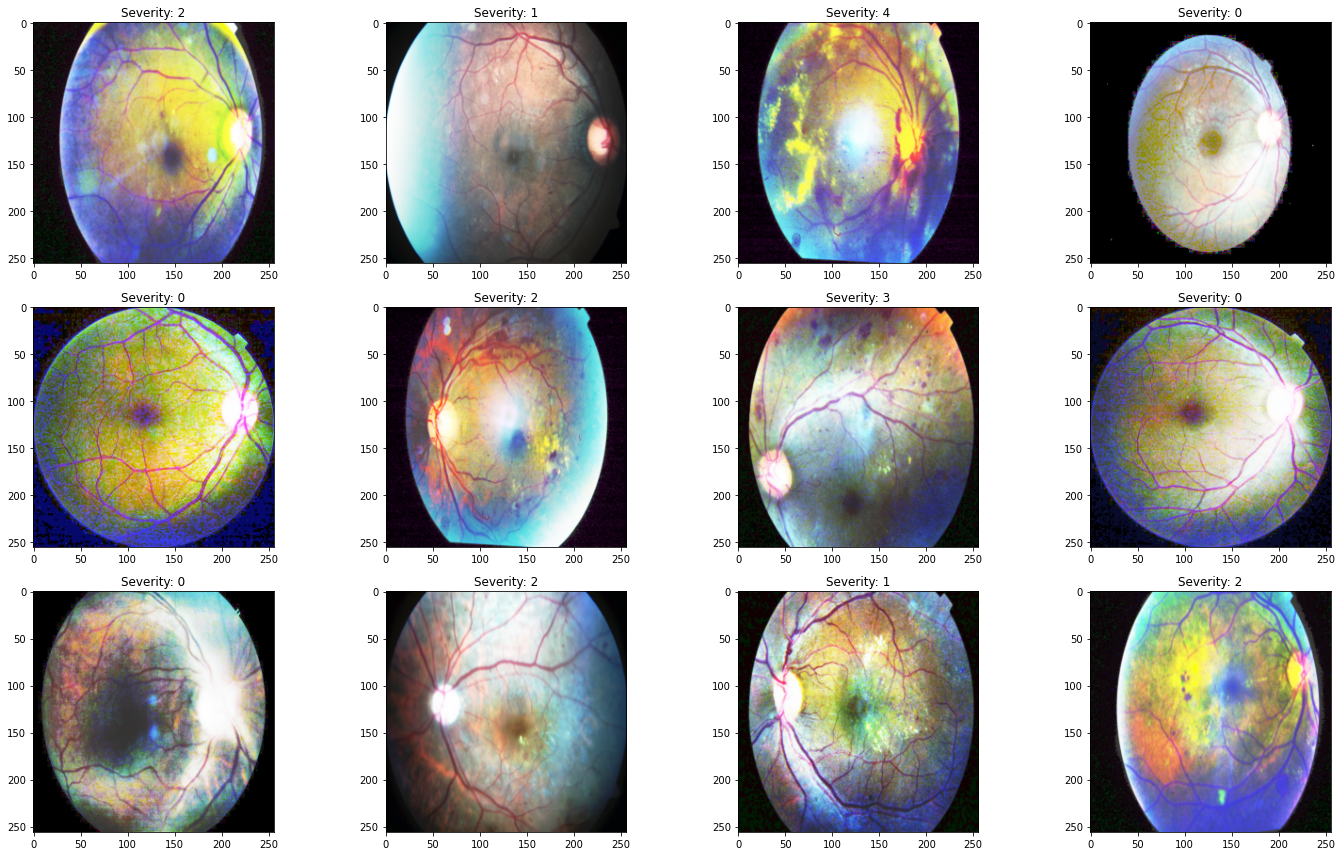

In [ ]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'/content/drive/MyDrive/Aptos 2019/pre_processed/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(f'Severity: {image_id}')
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Aptos 2019/train_1.csv")
test_df = pd.read_csv('/content/drive/MyDrive/Aptos 2019/test.csv')
print(train_df.shape)
print(test_df.shape)

(2930, 2)
(366, 2)


0    1434
1     300
2     808
3     154
4     234
Name: diagnosis, dtype: int64

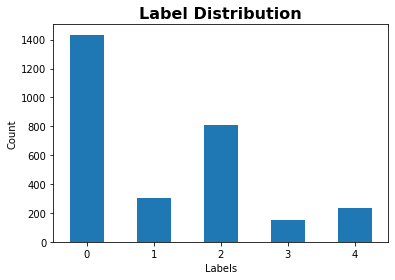

In [ ]:
train_df.diagnosis.value_counts().sort_index().plot(kind="bar", rot=0)
plt.title("Label Distribution", fontsize=16, weight='bold')
plt.xlabel("Labels")
plt.ylabel('Count')
plt.savefig('label_distribution.png')

train_df.diagnosis.value_counts().sort_index()

In [ ]:
image_path='/content/drive/MyDrive/Aptos 2019/pre_processed/'

In [ ]:
def get_image(image_path, size=256):
    im = Image.open(image_path)                                         
   
    im = im.resize((size, )*2)
    return im

In [ ]:
N = train_df.shape[0]
x_train = np.empty((N, 256, 256, 3), dtype=np.uint8)
for i, image_id in enumerate(tqdm(train_df['id_code'])):
    x_train[i, :, :, :] = get_image(f'/content/drive/MyDrive/Aptos 2019/pre_processed/{image_id}.png')

100%|██████████| 2930/2930 [39:43<00:00,  1.23it/s]


In [ ]:
image_path_test="/content/drive/MyDrive/Aptos 2019/test2"

In [ ]:
def get_image_test(image_path_test, size=256):
    im = Image.open(image_path_test)
    

    im = im.resize((size, )*2)
    
    return im

In [ ]:
N=test_df.shape[0]
x_test = np.empty((N, 256, 256, 3), dtype=np.uint8)
for i, image_id in enumerate(tqdm(test_df['id_code'])):
    x_test[i, :, :, :] = get_image_test(f'/content/drive/MyDrive/Aptos 2019/test2/{image_id}.png')

100%|██████████| 366/366 [01:19<00:00,  4.58it/s]


In [ ]:
y_train = pd.get_dummies(train_df['diagnosis']).values
y_test = pd.get_dummies(test_df['diagnosis']).values


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2930, 256, 256, 3)
(2930, 5)
(366, 256, 256, 3)
(366, 5)


In [ ]:
#split  data as  90/10 
x_train, x_val, y_train, y_val = train_test_split(
   x_train, y_train,
    test_size=0.1, random_state=42
)

In [ ]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3),
    classes=5,
    classifier_activation="softmax",
)



29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
def E_densenet():
    model = keras.Sequential()

    model.add(densenet)
    model.add(Conv2D(128, (4,4), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Conv2D(64, (4,4),  activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
    
    model.add(Conv2D(32, (4,4),activation='relu'))
    model.add(layers.GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    
    model.add(layers.Dense(5, activation='softmax'))

    
    return model

In [ ]:
model= E_densenet()

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
      optimizer=Adam(learning_rate=0.0001,weight_decay=1e-6),
      metrics=['accuracy']
    )

In [ ]:
BATCH_SIZE = 18

def create_datagen():
    return ImageDataGenerator(
        rotation_range=270,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

# Using original generator
data_generator = create_datagen().flow(x_train, y_train, batch_size=BATCH_SIZE, seed=42)

In [ ]:
history=model.fit(
 data_generator,
 validation_data=(x_val, y_val),
  epochs=100)

Epoch 1/100
163/163 [==============================] - 144s 393ms/step - loss: 0.9644 - accuracy: 0.6536 - val_loss: 0.7334 - val_accuracy: 0.7338
Epoch 2/100
163/163 [==============================] - 57s 348ms/step - loss: 0.7578 - accuracy: 0.7345 - val_loss: 0.5849 - val_accuracy: 0.7884
Epoch 3/100
163/163 [==============================] - 57s 348ms/step - loss: 0.7028 - accuracy: 0.7464 - val_loss: 0.5788 - val_accuracy: 0.7850
Epoch 4/100
163/163 [==============================] - 59s 360ms/step - loss: 0.6853 - accuracy: 0.7546 - val_loss: 0.5266 - val_accuracy: 0.8055
Epoch 5/100
163/163 [==============================] - 58s 354ms/step - loss: 0.6617 - accuracy: 0.7594 - val_loss: 0.4810 - val_accuracy: 0.8225
Epoch 6/100
163/163 [==============================] - 57s 351ms/step - loss: 0.6355 - accuracy: 0.7696 - val_loss: 0.4905 - val_accuracy: 0.7986
Epoch 7/100
163/163 [==============================] - 57s 352ms/step - loss: 0.6046 - accuracy: 0.7935 - val_loss: 0.4980 

In [ ]:
from keras.models import load_model

model=load_model("/content/drive/MyDrive/Aptos 2019/model.h5")

Text(0, 0.5, '% Accuracy')

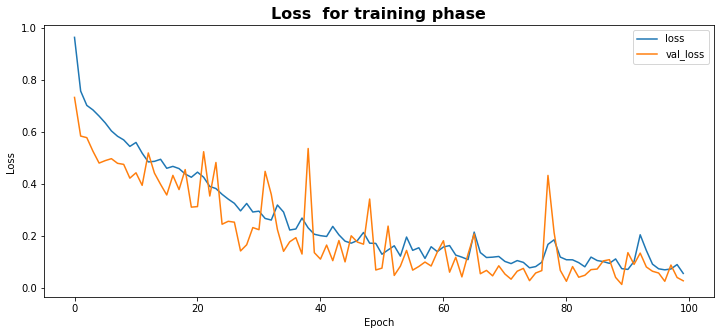

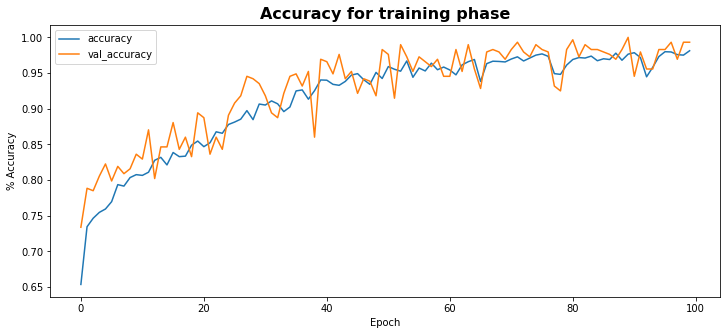

In [ ]:
with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(figsize=(12,5))
plt.title("Loss  for training phase", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss ")


history_df[['accuracy','val_accuracy' ]].plot(figsize=(12,5))
plt.title("Accuracy for training phase", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("% Accuracy")

In [ ]:
y_test_pred = model.predict(x_test)

12/12 [==============================] - 15s 249ms/step


In [ ]:
y_test_pred=np.argmax(y_test_pred, axis=1)

In [ ]:
y_test = pd.get_dummies(test_df['diagnosis']).values

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       0.60      0.50      0.55        30
           2       0.66      0.89      0.76        87
           3       0.54      0.41      0.47        17
           4       0.75      0.27      0.40        33

    accuracy                           0.83       366
   macro avg       0.71      0.61      0.63       366
weighted avg       0.84      0.83      0.82       366



In [ ]:
test_df['diagnosis'] = y_test_pred
test_df.to_csv('submission.csv',index=False)

In [ ]:
test_df.head(10)

id_code  diagnosis
0  e4dcca36ceb4          0
1  e4e343eaae2a          2
2  e4f12411fd85          3
3  e50b0174690d          0
4  e5197d77ec68          0
5  e529c5757d64          0
6  e52ed5c29c5e          4
7  e540d2e35d15          1
8  e55188915f9d          1
9  e580676516b0          2

In [ ]:
test_actual = pd.read_csv('/content/drive/MyDrive/Aptos 2019/test.csv')

In [ ]:
test_actual.head(10)

id_code  diagnosis
0  e4dcca36ceb4          0
1  e4e343eaae2a          2
2  e4f12411fd85          4
3  e50b0174690d          0
4  e5197d77ec68          0
5  e529c5757d64          0
6  e52ed5c29c5e          3
7  e540d2e35d15          2
8  e55188915f9d          1
9  e580676516b0          1

0    200
1     25
2    116
3     13
4     12
Name: diagnosis, dtype: int64


<Axes: >

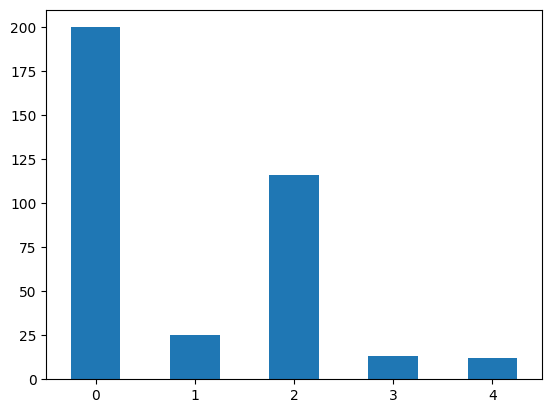

In [ ]:
print(test_df.diagnosis.value_counts().sort_index())
test_df.diagnosis.value_counts().sort_index().plot(kind="bar", rot=0)


0    199
1     30
2     87
3     17
4     33
Name: diagnosis, dtype: int64


<Axes: >

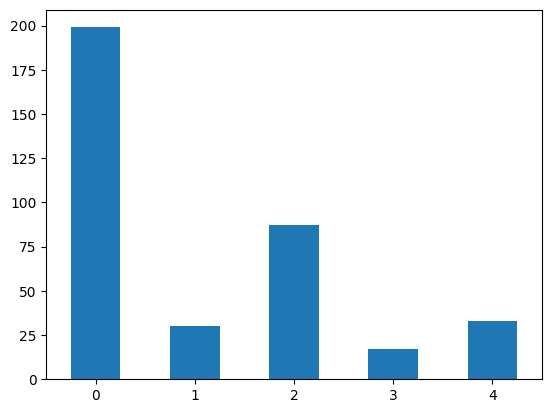

In [ ]:
test_actual=pd.read_csv('/content/drive/MyDrive/Aptos 2019/test.csv')
print(test_actual.diagnosis.value_counts().sort_index())
test_actual.diagnosis.value_counts().sort_index().plot(kind="bar", rot=0)

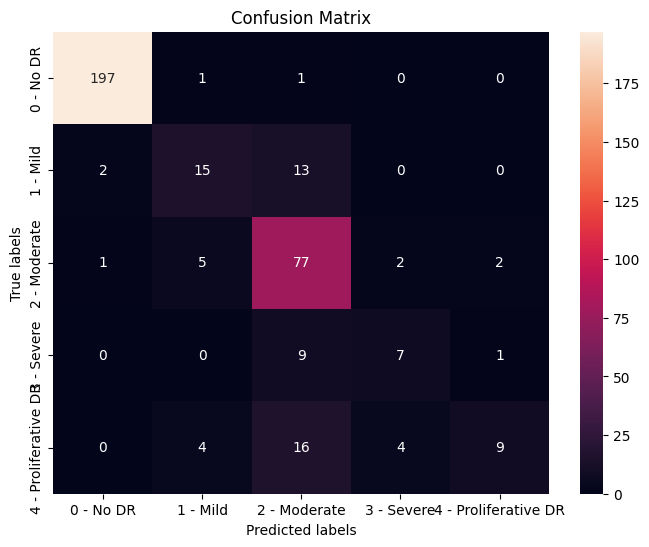

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR'] 

fig = plt.figure(figsize=(8, 6))
ax= fig.add_subplot()


cm = confusion_matrix(test_actual['diagnosis'], test_df['diagnosis'])
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_actual['diagnosis'], test_df['diagnosis']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       0.60      0.50      0.55        30
           2       0.66      0.89      0.76        87
           3       0.54      0.41      0.47        17
           4       0.75      0.27      0.40        33

    accuracy                           0.83       366
   macro avg       0.71      0.61      0.63       366
weighted avg       0.84      0.83      0.82       366

